In [3]:
pip install impyute

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split



from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier




from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from impyute.imputation.cs import fast_knn


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('//content//drive//MyDrive//STRIKE_REPORTS.csv')

<ipython-input-6-1c3f24b316ea>:1: DtypeWarning: Columns (18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('//content//drive//MyDrive//STRIKE_REPORTS.csv')


In [5]:
pd.set_option('display.max_columns',None)
df.head()

INDEX_NR INCIDENT_DATE  INCIDENT_MONTH  INCIDENT_YEAR TIME TIME_OF_DAY  \
0    608242     6/22/1996               6           1996  NaN         NaN   
1    608243     6/26/1996               6           1996  NaN         NaN   
2    608244      7/1/1996               7           1996  NaN         NaN   
3    608245      7/1/1996               7           1996  NaN         NaN   
4    608246      7/1/1996               7           1996  NaN         NaN   

  AIRPORT_ID                      AIRPORT  LATITUDE  LONGITUDE RUNWAY STATE  \
0       KSMF              SACRAMENTO INTL  38.69542 -121.59077    NaN    CA   
1       KDEN          DENVER INTL AIRPORT  39.85841 -104.66700    NaN    CO   
2       KOMA              EPPLEY AIRFIELD  41.30252  -95.89417    NaN    NE   
3       KIAD  WASHINGTON DULLES INTL ARPT  38.94453  -77.45581    NaN    DC   
4       KLGA              LA GUARDIA ARPT  40.77724  -73.87261    NaN    NY   

  FAAREGION LOCATION ENROUTE_STATE OPID         OPERATOR  REG     FLT  \
0       AWP      NaN           NaN  UAL  UNITED AIRLINES  NaN  1768.0   
1       ANM      NaN           NaN  UAL  UNITED AIRLINES  NaN  1845.0   
2       ACE      NaN           NaN  UAL  UNITED AIRLINES  NaN   306.0   
3       AEA      NaN           NaN  UAL  UNITED AIRLINES  NaN   510.0   
4       AEA      NaN           NaN  UAL  UNITED AIRLINES  NaN   677.0   

    AIRCRAFT  AMA AMO   EMA   EMO AC_CLASS  AC_MASS TYPE_ENG  NUM_ENGS  \
0  B-737-300  148  24  10.0   1.0        A      4.0        D       2.0   
1  B-737-300  148  24  10.0   1.0        A      4.0        D       2.0   
2  B-757-200  148  26  34.0  40.0        A      4.0        D       2.0   
3      A-320  04A  03  23.0   1.0        A      4.0        D       2.0   
4      A-320  04A  03  23.0   1.0        A      4.0        D       2.0   

   ENG_1_POS  ENG_2_POS  ENG_3_POS  ENG_4_POS PHASE_OF_FLIGHT  HEIGHT  SPEED  \
0        1.0        1.0        NaN        NaN    Take-off Run     0.0    NaN   
1        1.0        1.0        NaN        NaN    Take-off Run     0.0    NaN   
2        1.0        1.0        NaN        NaN    Take-off Run     0.0    NaN   
3        1.0        1.0        NaN        NaN        Approach  1000.0    NaN   
4        1.0        1.0        NaN        NaN           Climb  5000.0    NaN   

   DISTANCE  SKY PRECIPITATION  AOS COST_REPAIRS COST_OTHER  \
0       0.0  NaN           NaN  NaN          NaN        NaN   
1       0.0  NaN           NaN  NaN          NaN        NaN   
2       0.0  NaN           NaN  NaN          NaN        NaN   
3       NaN  NaN           NaN  NaN          NaN        NaN   
4       NaN  NaN           NaN  NaN          NaN        NaN   

  COST_REPAIRS_INFL_ADJ COST_OTHER_INFL_ADJ  INGESTED_OTHER  INDICATED_DAMAGE  \
0                   NaN                 NaN           False             False   
1                   NaN                 NaN           False             False   
2                   NaN                 NaN           False             False   
3                   NaN                 NaN           False             False   
4                   NaN                 NaN            True              True   

  DAMAGE_LEVEL  STR_RAD  DAM_RAD  STR_WINDSHLD  DAM_WINDSHLD  STR_NOSE  \
0          NaN    False    False         False         False      True   
1          NaN    False    False         False         False     False   
2            N    False    False         False         False     False   
3            N    False    False         False         False     False   
4            M    False    False         False         False     False   

   DAM_NOSE  STR_ENG1  DAM_ENG1  ING_ENG1  STR_ENG2  DAM_ENG2  ING_ENG2  \
0     False     False     False     False     False     False     False   
1     False      True     False     False     False     False     False   
2     False     False     False     False      True     False     False   
3     False     False     False     False     False     False     False   
4     False   

In [6]:
(df.isnull().sum()/df.shape[0] )*100

INDEX_NR           0.000000
INCIDENT_DATE      0.000000
INCIDENT_MONTH     0.000000
INCIDENT_YEAR      0.000000
TIME              43.342336
                    ...    
REPORTED_TITLE     0.000000
SOURCE             0.000000
PERSON             7.317614
LUPDATE            0.000000
TRANSFER           0.000000
Length: 100, dtype: float64

In [7]:
df.dtypes

INDEX_NR           int64
INCIDENT_DATE     object
INCIDENT_MONTH     int64
INCIDENT_YEAR      int64
TIME              object
                   ...  
REPORTED_TITLE    object
SOURCE            object
PERSON            object
LUPDATE           object
TRANSFER            bool
Length: 100, dtype: object

In [8]:
df.shape

(288810, 100)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288810 entries, 0 to 288809
Data columns (total 100 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   INDEX_NR               288810 non-null  int64  
 1   INCIDENT_DATE          288810 non-null  object 
 2   INCIDENT_MONTH         288810 non-null  int64  
 3   INCIDENT_YEAR          288810 non-null  int64  
 4   TIME                   163633 non-null  object 
 5   TIME_OF_DAY            166394 non-null  object 
 6   AIRPORT_ID             288804 non-null  object 
 7   AIRPORT                288810 non-null  object 
 8   LATITUDE               253309 non-null  float64
 9   LONGITUDE              253308 non-null  float64
 10  RUNWAY                 218852 non-null  object 
 11  STATE                  253309 non-null  object 
 12  FAAREGION              253309 non-null  object 
 13  LOCATION               33939 non-null   object 
 14  ENROUTE_STATE          5037 non-nul

## time data types convert to float

In [10]:
df.dtypes

INDEX_NR           int64
INCIDENT_DATE     object
INCIDENT_MONTH     int64
INCIDENT_YEAR      int64
TIME              object
                   ...  
REPORTED_TITLE    object
SOURCE            object
PERSON            object
LUPDATE           object
TRANSFER            bool
Length: 100, dtype: object

In [11]:
df.describe().T

count          mean           std            min  \
INDEX_NR          288810.0  8.736693e+05  2.526448e+05  608242.000000   
INCIDENT_MONTH    288810.0  7.175974e+00  2.765082e+00       1.000000   
INCIDENT_YEAR     288810.0  2.011698e+03  8.432311e+00    1990.000000   
LATITUDE          253309.0  2.012754e+02  8.177522e+04     -37.673333   
LONGITUDE         253308.0 -9.088025e+01  3.272439e+02    -177.381000   
EMA               192151.0  1.975581e+01  1.072428e+01       0.000000   
EMO               186756.0  8.522377e+00  1.286640e+01       0.000000   
AC_MASS           206490.0  3.538312e+00  8.673125e-01       1.000000   
NUM_ENGS          206259.0  2.013929e+00  4.201331e-01       1.000000   
ENG_1_POS         205481.0  2.814956e+00  2.113806e+00       1.000000   
ENG_2_POS         191612.0  2.667536e+00  1.981032e+00       1.000000   
ENG_3_POS          13080.0  2.900306e+00  1.950649e+00       1.000000   
ENG_4_POS           3290.0  2.043161e+00  1.435114e+00       1.000000   
HEIGHT            148807.0  8.659604e+02  1.843099e+03       0.000000   
SPEED              94237.0  1.425851e+02  4.665005e+01       0.000000   
DISTANCE          188234.0  8.144658e-01  3.547950e+00       0.000000   
AOS                14196.0  9.145442e+01  6.610745e+02       0.000000   
BIRD_BAND_NUMBER     390.0  8.811022e+07  9.110186e+07       0.000000   
NR_INJURIES          276.0  1.293478e+00  7.561343e-01       1.000000   
NR_FATALITIES         24.0  2.041667e+00  1.654484e+00       1.000000   

                           25%           50%           75%          max  
INDEX_NR          689320.25000  7.646935e+05  1.064714e+06    1472259.0  
INCIDENT_MONTH         5.00000  7.000000e+00  9.000000e+00         12.0  
INCIDENT_YEAR       2006.00000  2.014000e+03  2.019000e+03       2023.0  
LATITUDE              32.98764  3.880581e+01  4.085010e+01   41154428.0  
LONGITUDE            -98.46978 -8.790446e+01 -8.041794e+01     164140.0  
EMA                   10.00000  2.200000e+01  3.100000e+01         92.0  
EMO                    1.00000  4.000000e+00  1.000000e+01       2301.0  
AC_MASS                3.00000  4.000000e+00  4.000000e+00          5.0  
NUM_ENGS               2.00000  2.000000e+00  2.000000e+00          4.0  
ENG_1_POS              1.00000  1.000000e+00  5.000000e+00          7.0  
ENG_2_POS              1.00000  1.000000e+00  5.000000e+00          7.0  
ENG_3_POS              1.00000  1.000000e+00  5.000000e+00          6.0  
ENG_4_POS              1.00000  1.000000e+00  4.000000e+00          5.0  
HEIGHT                 0.00000  5.000000e+01  9.000000e+02      31300.0  
SPEED                120.00000  1.400000e+02  1.600000e+02       1250.0  
DISTANCE               0.00000  0.000000e+00  0.000000e+00         99.0  
AOS                    1.00000  3.000000e+00  2.400000e+01      62848.0  
BIRD_BAND_NUMBER       0.00000  7.897730e+07  1.893343e+08  282121777.0  
NR_INJURIES            1.00000  1.000000e+00  1.000000e+00          7.0  
NR_FATALITIES          1.00000  1.500000e+00  2.000000e+00          8.0

In [12]:
df.describe(exclude=np.number).T

count unique                top    freq
INCIDENT_DATE   288810  12274         10/12/2018     140
TIME            163633   1563              08:00    1732
TIME_OF_DAY     166394      4                Day  102548
AIRPORT_ID      288804   2609               ZZZZ   35418
AIRPORT         288810   2615            UNKNOWN   35418
...                ...    ...                ...     ...
REPORTED_TITLE  288810      1           REDACTED  288810
SOURCE          288810     16  FAA Form 5200-7-E  172161
PERSON          267676      6      Carcass Found   79670
LUPDATE         288810   4168          6/30/2018    6609
TRANSFER        288810      1              False  288810

[80 rows x 4 columns]

In [13]:
df.isnull().sum()[df.isnull().sum()!=0]/df.shape[0]

TIME                     0.433423
TIME_OF_DAY              0.423863
AIRPORT_ID               0.000021
LATITUDE                 0.122922
LONGITUDE                0.122925
RUNWAY                   0.242228
STATE                    0.122922
FAAREGION                0.122922
LOCATION                 0.882487
ENROUTE_STATE            0.982559
OPID                     0.000090
REG                      0.402573
FLT                      0.552477
AMA                      0.288546
AMO                      0.341578
EMA                      0.334680
EMO                      0.353360
AC_CLASS                 0.283636
AC_MASS                  0.285032
TYPE_ENG                 0.286576
NUM_ENGS                 0.285832
ENG_1_POS                0.288525
ENG_2_POS                0.336547
ENG_3_POS                0.954711
ENG_4_POS                0.988608
PHASE_OF_FLIGHT          0.384221
HEIGHT                   0.484758
SPEED                    0.673706
DISTANCE                 0.348243
SKY           

In [14]:
df_num = df.select_dtypes(np.number)
df_num.head()

INDEX_NR  INCIDENT_MONTH  INCIDENT_YEAR  LATITUDE  LONGITUDE   EMA   EMO  \
0    608242               6           1996  38.69542 -121.59077  10.0   1.0   
1    608243               6           1996  39.85841 -104.66700  10.0   1.0   
2    608244               7           1996  41.30252  -95.89417  34.0  40.0   
3    608245               7           1996  38.94453  -77.45581  23.0   1.0   
4    608246               7           1996  40.77724  -73.87261  23.0   1.0   

   AC_MASS  NUM_ENGS  ENG_1_POS  ENG_2_POS  ENG_3_POS  ENG_4_POS  HEIGHT  \
0      4.0       2.0        1.0        1.0        NaN        NaN     0.0   
1      4.0       2.0        1.0        1.0        NaN        NaN     0.0   
2      4.0       2.0        1.0        1.0        NaN        NaN     0.0   
3      4.0       2.0        1.0        1.0        NaN        NaN  1000.0   
4      4.0       2.0        1.0        1.0        NaN        NaN  5000.0   

   SPEED  DISTANCE  AOS  BIRD_BAND_NUMBER  NR_INJURIES  NR_FATALITIES  
0    NaN       0.0  NaN               NaN          NaN            NaN  
1    NaN       0.0  NaN               NaN          NaN            NaN  
2    NaN       0.0  NaN               NaN          NaN            NaN  
3    NaN       NaN  NaN               NaN          NaN            NaN  
4    NaN       NaN  NaN               NaN          NaN            NaN

In [15]:
df_cat = df.select_dtypes(exclude=np.number)
df_cat.head()

INCIDENT_DATE TIME TIME_OF_DAY AIRPORT_ID                      AIRPORT  \
0     6/22/1996  NaN         NaN       KSMF              SACRAMENTO INTL   
1     6/26/1996  NaN         NaN       KDEN          DENVER INTL AIRPORT   
2      7/1/1996  NaN         NaN       KOMA              EPPLEY AIRFIELD   
3      7/1/1996  NaN         NaN       KIAD  WASHINGTON DULLES INTL ARPT   
4      7/1/1996  NaN         NaN       KLGA              LA GUARDIA ARPT   

  RUNWAY STATE FAAREGION LOCATION ENROUTE_STATE OPID         OPERATOR  REG  \
0    NaN    CA       AWP      NaN           NaN  UAL  UNITED AIRLINES  NaN   
1    NaN    CO       ANM      NaN           NaN  UAL  UNITED AIRLINES  NaN   
2    NaN    NE       ACE      NaN           NaN  UAL  UNITED AIRLINES  NaN   
3    NaN    DC       AEA      NaN           NaN  UAL  UNITED AIRLINES  NaN   
4    NaN    NY       AEA      NaN           NaN  UAL  UNITED AIRLINES  NaN   

      FLT   AIRCRAFT  AMA AMO AC_CLASS TYPE_ENG PHASE_OF_FLIGHT  SKY  \
0  1768.0  B-737-300  148  24        A        D    Take-off Run  NaN   
1  1845.0  B-737-300  148  24        A        D    Take-off Run  NaN   
2   306.0  B-757-200  148  26        A        D    Take-off Run  NaN   
3   510.0      A-320  04A  03        A        D        Approach  NaN   
4   677.0      A-320  04A  03        A        D           Climb  NaN   

  PRECIPITATION COST_REPAIRS COST_OTHER COST_REPAIRS_INFL_ADJ  \
0           NaN          NaN        NaN                   NaN   
1           NaN          NaN        NaN                   NaN   
2           NaN          NaN        NaN                   NaN   
3           NaN          NaN        NaN                   NaN   
4           NaN          NaN        NaN                   NaN   

  COST_OTHER_INFL_ADJ  INGESTED_OTHER  INDICATED_DAMAGE DAMAGE_LEVEL  STR_RAD  \
0                 NaN           False             False          NaN    False   
1                 NaN           False             False          NaN    False   
2                 NaN           False             False            N    False   
3                 NaN           False             False            N    False   
4                 NaN            True              True            M    False   

   DAM_RAD  STR_WINDSHLD  DAM_WINDSHLD  STR_NOSE  DAM_NOSE  STR_ENG1  \
0    False         False         False      True     False     False   
1    False         False         False     False     False      True   
2    False         False         False     False     False     False   
3    False         False         False     False     False     False   
4    False         False         False     False     False      True   

   DAM_ENG1  ING_ENG1  STR_ENG2  DAM_ENG2  ING_ENG2  STR_ENG3  DAM_ENG3  \
0     False     False     False     False     False     False     False   
1     False     False     False     False     False     False     False   
2     False     False      True     False     False     False     False   
3     False     False     False     False     False     False     False   
4     False     False     False     False     False     False     False   

   ING_ENG3  STR_ENG4  DAM_ENG4  ING_ENG4  STR_PROP  DAM_PROP  STR_WING_ROT  \
0     False     False     False     False     False     False         False   
1     False     False     False     False     False     False         False   
2     False     False     False     False     False     False         False   
3     False     False     False     False     False     False         False   
4     False     False     False     False     False     False         False   

   DAM_WING_ROT  STR_FUSE  DAM_FUSE  STR_LG  DAM_LG  STR_TAIL  DAM_TAIL  \
0         False     False     False   False   False     False     False   
1         False     False     False   False   False     False     False   
2         False     False     False   False   False     False     False   
3         False      True     False   False   False     False     False   
4         False      True      

In [16]:
df_num.nunique()

INDEX_NR            288810
INCIDENT_MONTH          12
INCIDENT_YEAR           34
LATITUDE              2599
LONGITUDE             2600
EMA                     37
EMO                     53
AC_MASS                  5
NUM_ENGS                 4
ENG_1_POS                7
ENG_2_POS                7
ENG_3_POS                5
ENG_4_POS                4
HEIGHT                 697
SPEED                  285
DISTANCE               206
AOS                    469
BIRD_BAND_NUMBER       208
NR_INJURIES              6
NR_FATALITIES            6
dtype: int64

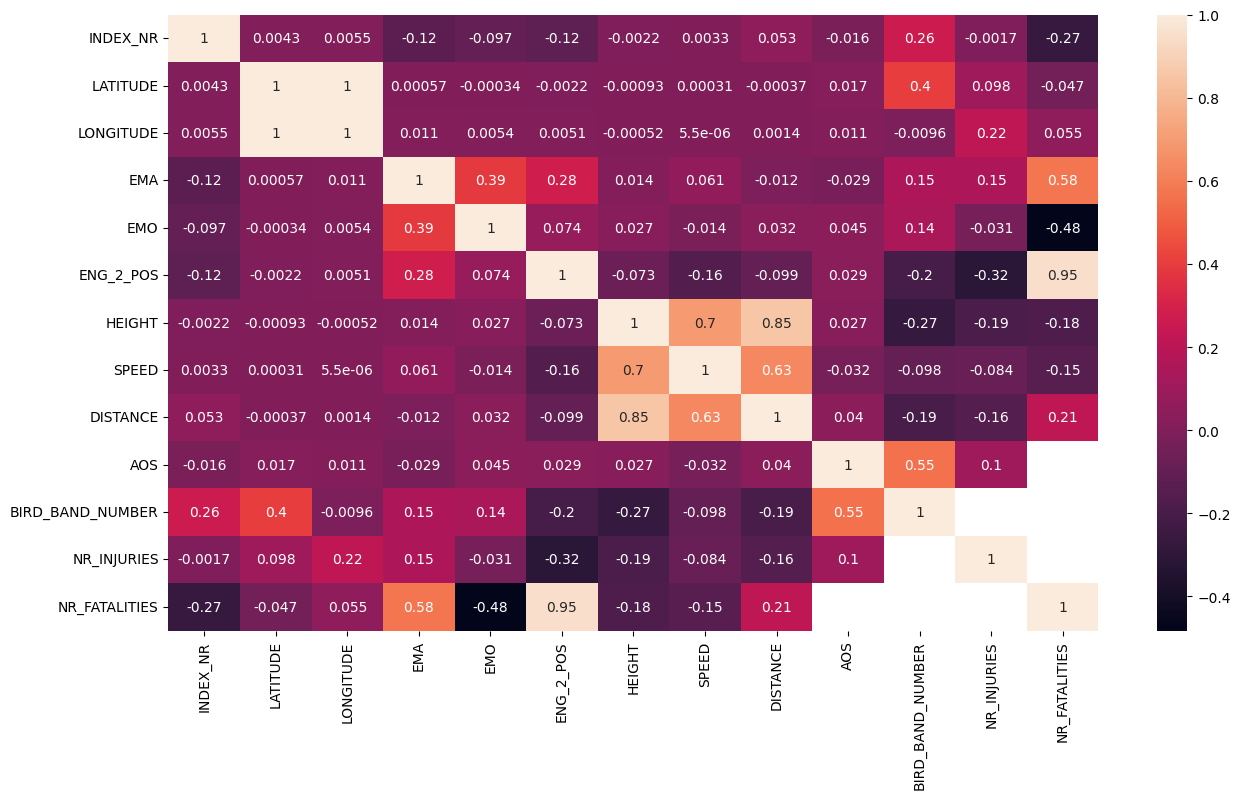

In [17]:
plt.figure(figsize = (15,8))
sns.heatmap(df_num.drop(['INCIDENT_MONTH','INCIDENT_YEAR',\
                         'AC_MASS', 'NUM_ENGS', 'ENG_1_POS', \
                         'ENG_3_POS', 'ENG_4_POS'],axis=1).corr()\
            , annot = True)
plt.show()

In [18]:
df_n1 = df.drop(['AIRPORT_ID','INDEX_NR','OPID','REG','FLT','AMA','AMO','EMA','EMO','DAM_RAD','DAM_WINDSHLD','DAM_NOSE','TIME',\
    'DAM_ENG1','DAM_ENG2','DAM_ENG3','DAM_ENG4','DAM_PROP','DAM_WING_ROT','DAM_FUSE','DAM_LG','DAM_TAIL',\
    'DAM_LGHTS','DAM_OTHER','OTHER_SPECIFY','EFFECT','SPECIES_ID','REMARKS','REMAINS_SENT','NUM_SEEN','COMMENTS',\
    'REPORTED_NAME','REPORTED_TITLE','SOURCE','PERSON','LUPDATE','TRANSFER','ENROUTE_STATE','AOS','COST_REPAIRS','COST_OTHER',\
              'COST_REPAIRS_INFL_ADJ','COST_OTHER_INFL_ADJ','OTHER_SPECIFY','EFFECT_OTHER','BIRD_BAND_NUMBER',\
             'NR_INJURIES','NR_FATALITIES','LATITUDE','LONGITUDE','LOCATION','INCIDENT_DATE','ENROUTE_STATE','AOS','COST_REPAIRS','COST_OTHER',\
              'COST_REPAIRS_INFL_ADJ','COST_OTHER_INFL_ADJ','OTHER_SPECIFY','EFFECT_OTHER','BIRD_BAND_NUMBER',\
             'NR_INJURIES','NR_FATALITIES'], axis = 1)

In [19]:
df_n1.head()

INCIDENT_MONTH  INCIDENT_YEAR TIME_OF_DAY                      AIRPORT  \
0               6           1996         NaN              SACRAMENTO INTL   
1               6           1996         NaN          DENVER INTL AIRPORT   
2               7           1996         NaN              EPPLEY AIRFIELD   
3               7           1996         NaN  WASHINGTON DULLES INTL ARPT   
4               7           1996         NaN              LA GUARDIA ARPT   

  RUNWAY STATE FAAREGION         OPERATOR   AIRCRAFT AC_CLASS  AC_MASS  \
0    NaN    CA       AWP  UNITED AIRLINES  B-737-300        A      4.0   
1    NaN    CO       ANM  UNITED AIRLINES  B-737-300        A      4.0   
2    NaN    NE       ACE  UNITED AIRLINES  B-757-200        A      4.0   
3    NaN    DC       AEA  UNITED AIRLINES      A-320        A      4.0   
4    NaN    NY       AEA  UNITED AIRLINES      A-320        A      4.0   

  TYPE_ENG  NUM_ENGS  ENG_1_POS  ENG_2_POS  ENG_3_POS  ENG_4_POS  \
0        D       2.0        1.0        1.0        NaN        NaN   
1        D       2.0        1.0        1.0        NaN        NaN   
2        D       2.0        1.0        1.0        NaN        NaN   
3        D       2.0        1.0        1.0        NaN        NaN   
4        D       2.0        1.0        1.0        NaN        NaN   

  PHASE_OF_FLIGHT  HEIGHT  SPEED  DISTANCE  SKY PRECIPITATION  INGESTED_OTHER  \
0    Take-off Run     0.0    NaN       0.0  NaN           NaN           False   
1    Take-off Run     0.0    NaN       0.0  NaN           NaN           False   
2    Take-off Run     0.0    NaN       0.0  NaN           NaN           False   
3        Approach  1000.0    NaN       NaN  NaN           NaN           False   
4           Climb  5000.0    NaN       NaN  NaN           NaN            True   

   INDICATED_DAMAGE DAMAGE_LEVEL  STR_RAD  STR_WINDSHLD  STR_NOSE  STR_ENG1  \
0             False          NaN    False         False      True     False   
1             False          NaN    False         False     False      True   
2             False            N    False         False     False     False   
3             False            N    False         False     False     False   
4              True            M    False         False     False      True   

   ING_ENG1  STR_ENG2  ING_ENG2  STR_ENG3  ING_ENG3  STR_ENG4  ING_ENG4  \
0     False     False     False     False     False     False     False   
1     False     False     False     False     False     False     False   
2     False      True     False     False     False     False     False   
3     False     False     False     False     False     False     False   
4     False     False     False     False     False     False     False   

   STR_PROP  STR_WING_ROT  STR_FUSE  STR_LG  STR_TAIL  STR_LGHTS  STR_OTHER  \
0     False         False     False   False     False      False      False   
1     False         False     False   False     False      False      False   
2     False         False     False   False     False      False      False   
3     False         False      True   False     False      False      False   
4     False         False      True   False     False      False      False   

                 SPECIES  REMAINS_COLLECTED   WARNED NUM_STRUCK    SIZE  
0  Unknown bird - medium              False  Unknown          1  Medium  
1  Unknown bird - medium              False  Unknown          1  Medium  
2  Unknown bird - medium              False  Unknown          1  Medium  
3  Unknown bird - medium              False  Unknown          1  Medium  
4  Unknown bird - medium              False  Unknown          1  Medium

In [20]:
df_n1.shape

(288810, 49)

In [21]:
df_n1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288810 entries, 0 to 288809
Data columns (total 49 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   INCIDENT_MONTH     288810 non-null  int64  
 1   INCIDENT_YEAR      288810 non-null  int64  
 2   TIME_OF_DAY        166394 non-null  object 
 3   AIRPORT            288810 non-null  object 
 4   RUNWAY             218852 non-null  object 
 5   STATE              253309 non-null  object 
 6   FAAREGION          253309 non-null  object 
 7   OPERATOR           288810 non-null  object 
 8   AIRCRAFT           288810 non-null  object 
 9   AC_CLASS           206893 non-null  object 
 10  AC_MASS            206490 non-null  float64
 11  TYPE_ENG           206044 non-null  object 
 12  NUM_ENGS           206259 non-null  float64
 13  ENG_1_POS          205481 non-null  float64
 14  ENG_2_POS          191612 non-null  float64
 15  ENG_3_POS          13080 non-null   float64
 16  EN

In [22]:
df_n1.describe().T

count         mean          std     min     25%     50%  \
INCIDENT_MONTH  288810.0     7.175974     2.765082     1.0     5.0     7.0   
INCIDENT_YEAR   288810.0  2011.697798     8.432311  1990.0  2006.0  2014.0   
AC_MASS         206490.0     3.538312     0.867312     1.0     3.0     4.0   
NUM_ENGS        206259.0     2.013929     0.420133     1.0     2.0     2.0   
ENG_1_POS       205481.0     2.814956     2.113806     1.0     1.0     1.0   
ENG_2_POS       191612.0     2.667536     1.981032     1.0     1.0     1.0   
ENG_3_POS        13080.0     2.900306     1.950649     1.0     1.0     1.0   
ENG_4_POS         3290.0     2.043161     1.435114     1.0     1.0     1.0   
HEIGHT          148807.0   865.960358  1843.098801     0.0     0.0    50.0   
SPEED            94237.0   142.585057    46.650050     0.0   120.0   140.0   
DISTANCE        188234.0     0.814466     3.547950     0.0     0.0     0.0   

                   75%      max  
INCIDENT_MONTH     9.0     12.0  
INCIDENT_YEAR   2019.0   2023.0  
AC_MASS            4.0      5.0  
NUM_ENGS           2.0      4.0  
ENG_1_POS          5.0      7.0  
ENG_2_POS          5.0      7.0  
ENG_3_POS          5.0      6.0  
ENG_4_POS          4.0      5.0  
HEIGHT           900.0  31300.0  
SPEED            160.0   1250.0  
DISTANCE           0.0     99.0

In [23]:
df_n1.describe(exclude=np.number).T

count unique                   top    freq
TIME_OF_DAY        166394      4                   Day  102548
AIRPORT            288810   2615               UNKNOWN   35418
RUNWAY             218852   1037                    27    4046
STATE              253309     67                    TX   24794
FAAREGION          253309     10                   ASO   53932
OPERATOR           288810    602               UNKNOWN   81307
AIRCRAFT           288810    603               UNKNOWN   81535
AC_CLASS           206893      5                     A  202514
TYPE_ENG           206044      7                     D  173315
PHASE_OF_FLIGHT    177843     11              Approach   75224
SKY                139382      3              No Cloud   67403
PRECIPITATION      133862     12                  None  122687
INGESTED_OTHER     288810      2                 False  277491
INDICATED_DAMAGE   288810      2                 False  269068
DAMAGE_LEVEL       187315      5                     N  167573
STR_RAD            288810      2                 False  262375
STR_WINDSHLD       288810      2                 False  253588
STR_NOSE           288810      2                 False  255573
STR_ENG1           288810      2                 False  275423
ING_ENG1           288810      2                 False  288053
STR_ENG2           288810      2                 False  277491
ING_ENG2           288810      2                 False  288005
STR_ENG3           288810      2                 False  288327
ING_ENG3           288810      2                 False  288797
STR_ENG4           288810      2                 False  288577
ING_ENG4           288810      2                 False  288808
STR_PROP           288810      2                 False  284000
STR_WING_ROT       288810      2                 False  254920
STR_FUSE           288810      2                 False  263122
STR_LG             288810      2                 False  276658
STR_TAIL           288810      2                 False  285884
STR_LGHTS          288810      2                 False  287378
STR_OTHER          288810      2                 False  250476
SPECIES            288809    912  Unknown bird - small   48901
REMAINS_COLLECTED  288810      2                  True  149419
WARNED             288810      3               Unknown  176227
NUM_STRUCK         288174      4                     1  255434
SIZE               263538      3                 Small  178749

In [24]:
df_n1_num=df_n1.select_dtypes(np.number)
df_n1_num.head()

INCIDENT_MONTH  INCIDENT_YEAR  AC_MASS  NUM_ENGS  ENG_1_POS  ENG_2_POS  \
0               6           1996      4.0       2.0        1.0        1.0   
1               6           1996      4.0       2.0        1.0        1.0   
2               7           1996      4.0       2.0        1.0        1.0   
3               7           1996      4.0       2.0        1.0        1.0   
4               7           1996      4.0       2.0        1.0        1.0   

   ENG_3_POS  ENG_4_POS  HEIGHT  SPEED  DISTANCE  
0        NaN        NaN     0.0    NaN       0.0  
1        NaN        NaN     0.0    NaN       0.0  
2        NaN        NaN     0.0    NaN       0.0  
3        NaN        NaN  1000.0    NaN       NaN  
4        NaN        NaN  5000.0    NaN       NaN

In [25]:
df_n1_cat=df_n1.select_dtypes(exclude=np.number)
df_n1_cat.head()

TIME_OF_DAY                      AIRPORT RUNWAY STATE FAAREGION  \
0         NaN              SACRAMENTO INTL    NaN    CA       AWP   
1         NaN          DENVER INTL AIRPORT    NaN    CO       ANM   
2         NaN              EPPLEY AIRFIELD    NaN    NE       ACE   
3         NaN  WASHINGTON DULLES INTL ARPT    NaN    DC       AEA   
4         NaN              LA GUARDIA ARPT    NaN    NY       AEA   

          OPERATOR   AIRCRAFT AC_CLASS TYPE_ENG PHASE_OF_FLIGHT  SKY  \
0  UNITED AIRLINES  B-737-300        A        D    Take-off Run  NaN   
1  UNITED AIRLINES  B-737-300        A        D    Take-off Run  NaN   
2  UNITED AIRLINES  B-757-200        A        D    Take-off Run  NaN   
3  UNITED AIRLINES      A-320        A        D        Approach  NaN   
4  UNITED AIRLINES      A-320        A        D           Climb  NaN   

  PRECIPITATION  INGESTED_OTHER  INDICATED_DAMAGE DAMAGE_LEVEL  STR_RAD  \
0           NaN           False             False          NaN    False   
1           NaN           False             False          NaN    False   
2           NaN           False             False            N    False   
3           NaN           False             False            N    False   
4           NaN            True              True            M    False   

   STR_WINDSHLD  STR_NOSE  STR_ENG1  ING_ENG1  STR_ENG2  ING_ENG2  STR_ENG3  \
0         False      True     False     False     False     False     False   
1         False     False      True     False     False     False     False   
2         False     False     False     False      True     False     False   
3         False     False     False     False     False     False     False   
4         False     False      True     False     False     False     False   

   ING_ENG3  STR_ENG4  ING_ENG4  STR_PROP  STR_WING_ROT  STR_FUSE  STR_LG  \
0     False     False     False     False         False     False   False   
1     False     False     False     False         False     False   False   
2     False     False     False     False         False     False   False   
3     False     False     False     False         False      True   False   
4     False     False     False     False         False      True   False   

   STR_TAIL  STR_LGHTS  STR_OTHER                SPECIES  REMAINS_COLLECTED  \
0     False      False      False  Unknown bird - medium              False   
1     False      False      False  Unknown bird - medium              False   
2     False      False      False  Unknown bird - medium              False   
3     False      False      False  Unknown bird - medium              False   
4     False      False      False  Unknown bird - medium              False   

    WARNED NUM_STRUCK    SIZE  
0  Unknown          1  Medium  
1  Unknown          1  Medium  
2  Unknown          1  Medium  
3  Unknown          1  Medium  
4  Unknown          1  Medium

In [26]:

df_n1_cat.nunique()>10

TIME_OF_DAY          False
AIRPORT               True
RUNWAY                True
STATE                 True
FAAREGION            False
OPERATOR              True
AIRCRAFT              True
AC_CLASS             False
TYPE_ENG             False
PHASE_OF_FLIGHT       True
SKY                  False
PRECIPITATION         True
INGESTED_OTHER       False
INDICATED_DAMAGE     False
DAMAGE_LEVEL         False
STR_RAD              False
STR_WINDSHLD         False
STR_NOSE             False
STR_ENG1             False
ING_ENG1             False
STR_ENG2             False
ING_ENG2             False
STR_ENG3             False
ING_ENG3             False
STR_ENG4             False
ING_ENG4             False
STR_PROP             False
STR_WING_ROT         False
STR_FUSE             False
STR_LG               False
STR_TAIL             False
STR_LGHTS            False
STR_OTHER            False
SPECIES               True
REMAINS_COLLECTED    False
WARNED               False
NUM_STRUCK           False
S

# Grouping Subcategories

In [27]:
df_n1_cat[['AIRPORT','RUNWAY','STATE','OPERATOR','AIRCRAFT','PHASE_OF_FLIGHT','PRECIPITATION','SPECIES']].nunique()

AIRPORT            2615
RUNWAY             1037
STATE                67
OPERATOR            602
AIRCRAFT            603
PHASE_OF_FLIGHT      11
PRECIPITATION        12
SPECIES             912
dtype: int64

### Grouping Airport column

In [28]:
df_n1_cat['AIRPORT'].value_counts()

UNKNOWN                                35418
DENVER INTL AIRPORT                     9620
DALLAS/FORT WORTH INTL ARPT             7759
CHICAGO O'HARE INTL ARPT                6239
JOHN F KENNEDY INTL                     5984
                                       ...  
BRIGHAM & WOMEN'S HOSPITAL HELIPORT        1
BANGALORE INTL ARPT                        1
LOGAN COUNTY ARPT                          1
DEMOPOLIS MUNICIPAL ARPT                   1
MONROE COUNTY ARPT                         1
Name: AIRPORT, Length: 2615, dtype: int64

In [29]:
df_n1_cat['AIRPORT'].value_counts().nunique()

334

In [30]:
subcategory_counts = df_n1_cat['AIRPORT'].value_counts()
single_value_subcategories = subcategory_counts[subcategory_counts == 1].index.tolist()
single_rows = df_n1_cat[df_n1_cat['AIRPORT'].isin(single_value_subcategories)]
single_rows.head()

TIME_OF_DAY                   AIRPORT RUNWAY STATE FAAREGION  \
124        Night      BILL PUGH FIELD ARPT      9    AL       ASO   
193          Day       RICHARDS-GEBAUR AFB    NaN    MO       ACE   
451        Night  BEAUREGARD REGIONAL ARPT     18    LA       ASW   
2302       Night             ESSEX SKYPARK     33    MD       AEA   
2491         Day       GRIFFIN-SPALDING CO    NaN    GA       ASO   

             OPERATOR         AIRCRAFT AC_CLASS TYPE_ENG PHASE_OF_FLIGHT  \
124   PRIVATELY OWNED  C-210 CENTURION        A        A    Landing Roll   
193          BUSINESS            C-500        A        D    Take-off Run   
451   PRIVATELY OWNED      BE-58 BARON        A        A        Approach   
2302  RAM AIR FREIGHT  BE-23 SUNDOWNER        A        A        Approach   
2491          UNKNOWN            C-172        A        A        Approach   

             SKY PRECIPITATION  INGESTED_OTHER  INDICATED_DAMAGE DAMAGE_LEVEL  \
124     No Cloud          None           False              True            S   
193     No Cloud          None           False              True            M   
451   Some Cloud          None           False              True            S   
2302    Overcast           NaN           False              True            S   
2491    Overcast           NaN           False             False            N   

      STR_RAD  STR_WINDSHLD  STR_NOSE  STR_ENG1  ING_ENG1  STR_ENG2  ING_ENG2  \
124     False         False     False     False     False     False     False   
193     False          True     False     False     False     False     False   
451     False         False     False     False     False     False     False   
2302    False         False     False     False     False     False     False   
2491    False          True     False     False     False     False     False   

      STR_ENG3  ING_ENG3  STR_ENG4  ING_ENG4  STR_PROP  STR_WING_ROT  \
124      False     False     False     False     False         False   
193      False     False     False     False     False         False   
451      False     False     False     False     False          True   
2302     False     False     False     False     False         False   
2491     False     False     False     False     False         False   

      STR_FUSE  STR_LG  STR_TAIL  STR_LGHTS  STR_OTHER            SPECIES  \
124      False   False     False      False       True  White-tailed deer   
193      False   False     False      False      False              Hawks   
451      False   False     False      False      False               Owls   
2302     False   False     False      False      False  White-tailed deer   
2491     False   False     False      False      False         Blackbirds   

      REMAINS_COLLECTED   WARNED NUM_STRUCK    SIZE  
124               False  Unknown          1   Large  
193               False       No          1  Medium  
451               False       No          1  Medium  
2302              False  Unknown        NaN   Large  
2491              False      Yes          1   Small

In [31]:
df_n1_cat['AIRPORT'].value_counts().values

array([35418,  9620,  7759, ...,     1,     1,     1])

In [32]:
dict_rows = {}
for i in df_n1_cat['AIRPORT'].value_counts().values:
  subcategory_counts = df_n1_cat['AIRPORT'].value_counts()
  single_value_subcategories = subcategory_counts[subcategory_counts == i].index.tolist()
  variable_name = f'rows_{i}'
  dict_rows[variable_name] = df_n1_cat[df_n1_cat['AIRPORT'].isin(single_value_subcategories)]

In [33]:
for i,j in dict_rows.items():
  if dict_rows[f'{i}']['AIRPORT'].nunique()>1:
    stat, pvalue, dof, exp_freq = \
    stats.chi2_contingency(pd.crosstab(dict_rows[f'{i}']['AIRPORT'],dict_rows[f'{i}']['INDICATED_DAMAGE']))
    if pvalue>0.05:
      print(i)
      print('Pvalue: ', pvalue)
      print('Class Imbalance: \n',dict_rows[f'{i}']['INDICATED_DAMAGE'].value_counts())


rows_534
Pvalue:  0.8616333226752377
Class Imbalance: 
 False    1034
True       34
Name: INDICATED_DAMAGE, dtype: int64
rows_432
Pvalue:  0.07095920805836052
Class Imbalance: 
 False    799
True      65
Name: INDICATED_DAMAGE, dtype: int64
rows_399
Pvalue:  0.2563811595086767
Class Imbalance: 
 False    769
True      29
Name: INDICATED_DAMAGE, dtype: int64
rows_338
Pvalue:  1.0
Class Imbalance: 
 False    653
True      23
Name: INDICATED_DAMAGE, dtype: int64
rows_333
Pvalue:  0.20292385638396407
Class Imbalance: 
 False    643
True      23
Name: INDICATED_DAMAGE, dtype: int64
rows_309
Pvalue:  0.7931335988969856
Class Imbalance: 
 False    553
True      65
Name: INDICATED_DAMAGE, dtype: int64
rows_293
Pvalue:  0.19513628555619084
Class Imbalance: 
 False    545
True      41
Name: INDICATED_DAMAGE, dtype: int64
rows_272
Pvalue:  0.6700098639526098
Class Imbalance: 
 False    521
True      23
Name: INDICATED_DAMAGE, dtype: int64
rows_211
Pvalue:  0.6419291684318262
Class Imbalance: 
 Fa

In [34]:
df_n1_cat['AIRPORT'].value_counts().values

array([35418,  9620,  7759, ...,     1,     1,     1])

In [35]:
chi2_values = {}
for i,j in dict_rows.items():
  if dict_rows[f'{i}']['AIRPORT'].nunique()>1:
    stat, pvalue, dof, exp_freq = \
    stats.chi2_contingency(pd.crosstab(dict_rows[f'{i}']['AIRPORT'],dict_rows[f'{i}']['INDICATED_DAMAGE']))
    if pvalue>0.05:
      chi2_values[i] = stat
sorted_subcategories = sorted(chi2_values, key=chi2_values.get)
map_sub_cat = np.empty(0)
for i in sorted_subcategories:
  map_sub_cat = np.concatenate((map_sub_cat, dict_rows[i]['AIRPORT'].unique()))
map_sub_cat
df_n1_cat['GROUPED_AIRPORT'] = df_n1_cat['AIRPORT'].map(lambda x : 'AIRPORT_GROUPED' if x in map_sub_cat else x)
df_n1_cat['GROUPED_AIRPORT'].nunique()

1529

In [36]:
len(dict_rows)

334

In [37]:
df_n1_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288810 entries, 0 to 288809
Data columns (total 39 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   TIME_OF_DAY        166394 non-null  object
 1   AIRPORT            288810 non-null  object
 2   RUNWAY             218852 non-null  object
 3   STATE              253309 non-null  object
 4   FAAREGION          253309 non-null  object
 5   OPERATOR           288810 non-null  object
 6   AIRCRAFT           288810 non-null  object
 7   AC_CLASS           206893 non-null  object
 8   TYPE_ENG           206044 non-null  object
 9   PHASE_OF_FLIGHT    177843 non-null  object
 10  SKY                139382 non-null  object
 11  PRECIPITATION      133862 non-null  object
 12  INGESTED_OTHER     288810 non-null  bool  
 13  INDICATED_DAMAGE   288810 non-null  bool  
 14  DAMAGE_LEVEL       187315 non-null  object
 15  STR_RAD            288810 non-null  bool  
 16  STR_WINDSHLD       2

### Grouping Runway Columns

In [38]:
stats.chi2_contingency(pd.crosstab(df_n1_cat['RUNWAY'],df_n1_cat['INDICATED_DAMAGE']))

Chi2ContingencyResult(statistic=2933.221396288596, pvalue=1.3554881416169985e-180, dof=1036, expected_freq=array([[46.27966845,  2.72033155],
       [ 0.94448303,  0.05551697],
       [ 6.61138121,  0.38861879],
       ...,
       [ 0.94448303,  0.05551697],
       [ 0.94448303,  0.05551697],
       [ 0.94448303,  0.05551697]]))

In [39]:
df_n1_cat['RUNWAY'].value_counts().nunique()

216

In [40]:
dict_rows_1 = {}
for i in df_n1_cat['RUNWAY'].value_counts().values:
  subcategory_counts = df_n1_cat['RUNWAY'].value_counts()
  single_value_subcategories = subcategory_counts[subcategory_counts == i].index.tolist()
  variable_name = f'rows_{i}'
  dict_rows_1[variable_name] = df_n1_cat[df_n1_cat['RUNWAY'].isin(single_value_subcategories)]


In [41]:
for i,j in dict_rows_1.items():
  if dict_rows_1[f'{i}']['RUNWAY'].nunique()>1:
    stat, pvalue, dof, exp_freq = \
    stats.chi2_contingency(pd.crosstab(dict_rows_1[f'{i}']['RUNWAY'],dict_rows_1[f'{i}']['INDICATED_DAMAGE']))
    if pvalue>0.05:
      print(i)
      print('Pvalue: ', pvalue)
      print('Class Imbalance: \n',dict_rows_1[f'{i}']['INDICATED_DAMAGE'].value_counts())

rows_854
Pvalue:  0.7718904535042833
Class Imbalance: 
 False    1659
True       49
Name: INDICATED_DAMAGE, dtype: int64
rows_206
Pvalue:  0.47843039201375903
Class Imbalance: 
 False    410
True       2
Name: INDICATED_DAMAGE, dtype: int64
rows_64
Pvalue:  1.0
Class Imbalance: 
 False    127
True       1
Name: INDICATED_DAMAGE, dtype: int64
rows_60
Pvalue:  1.0
Class Imbalance: 
 False    119
True       1
Name: INDICATED_DAMAGE, dtype: int64
rows_59
Pvalue:  0.0675491854626122
Class Imbalance: 
 False    113
True       5
Name: INDICATED_DAMAGE, dtype: int64
rows_57
Pvalue:  1.0
Class Imbalance: 
 False    114
Name: INDICATED_DAMAGE, dtype: int64
rows_51
Pvalue:  0.1259409811100395
Class Imbalance: 
 False    98
True      4
Name: INDICATED_DAMAGE, dtype: int64
rows_49
Pvalue:  1.0
Class Imbalance: 
 False    97
True      1
Name: INDICATED_DAMAGE, dtype: int64
rows_41
Pvalue:  1.0
Class Imbalance: 
 False    164
Name: INDICATED_DAMAGE, dtype: int64
rows_37
Pvalue:  1.0
Class Imbalance: 

In [42]:
chi2_values = {}
for i,j in dict_rows_1.items():
  if dict_rows_1[f'{i}']['RUNWAY'].nunique()>1:
    stat, pvalue, dof, exp_freq = \
    stats.chi2_contingency(pd.crosstab(dict_rows_1[f'{i}']['RUNWAY'],dict_rows_1[f'{i}']['INDICATED_DAMAGE']))
    if pvalue>0.05:
      chi2_values[i] = stat
sorted_subcategories = sorted(chi2_values, key=chi2_values.get)
map_sub_cat = np.empty(0)
for i in sorted_subcategories:
  map_sub_cat = np.concatenate((map_sub_cat, dict_rows_1[i]['RUNWAY'].unique()))
map_sub_cat
df_n1_cat['GROUPED_RUNWAY'] = df_n1_cat['RUNWAY'].map(lambda x : 'RUNWAY_GROUPED' if x in map_sub_cat else x)
df_n1_cat['GROUPED_RUNWAY'].nunique()

197

### Grouping State

In [43]:
df_n1_cat['STATE'].value_counts().nunique()

66

In [44]:
df_n1_cat[['AIRPORT','RUNWAY','STATE','OPERATOR','AIRCRAFT','PHASE_OF_FLIGHT','PRECIPITATION','SPECIES']].nunique()

AIRPORT            2615
RUNWAY             1037
STATE                67
OPERATOR            602
AIRCRAFT            603
PHASE_OF_FLIGHT      11
PRECIPITATION        12
SPECIES             912
dtype: int64

In [45]:
dict_rows_2 = {}
for i in df_n1_cat['STATE'].value_counts().values:
  subcategory_counts = df_n1_cat['STATE'].value_counts()
  single_value_subcategories = subcategory_counts[subcategory_counts == i].index.tolist()
  variable_name = f'rows_{i}'
  dict_rows_2[variable_name] = df_n1_cat[df_n1_cat['STATE'].isin(single_value_subcategories)]

In [46]:
for i,j in dict_rows_2.items():
  if dict_rows_2[f'{i}']['STATE'].nunique()>1:
    stat, pvalue, dof, exp_freq = \
    stats.chi2_contingency(pd.crosstab(dict_rows_2[f'{i}']['STATE'],dict_rows_2[f'{i}']['INDICATED_DAMAGE']))
    if pvalue>0.05:
      print(i)
      print('Pvalue: ', pvalue)
      print('Class Imbalance: \n',dict_rows_2[f'{i}']['INDICATED_DAMAGE'].value_counts())

rows_5
Pvalue:  0.42919530044034926
Class Imbalance: 
 False    8
True     2
Name: INDICATED_DAMAGE, dtype: int64


### Grouped AIRCRAFT

In [47]:
df_n1_cat['AIRCRAFT'].value_counts().nunique()

222

In [48]:
df_n1_cat[['AIRPORT','RUNWAY','STATE','OPERATOR','AIRCRAFT','PHASE_OF_FLIGHT','PRECIPITATION','SPECIES']].nunique()

AIRPORT            2615
RUNWAY             1037
STATE                67
OPERATOR            602
AIRCRAFT            603
PHASE_OF_FLIGHT      11
PRECIPITATION        12
SPECIES             912
dtype: int64

In [49]:
dict_rows_4 = {}
for i in df_n1_cat['AIRCRAFT'].value_counts().values:
  subcategory_counts = df_n1_cat['AIRCRAFT'].value_counts()
  single_value_subcategories = subcategory_counts[subcategory_counts == i].index.tolist()
  variable_name = f'rows_{i}'
  dict_rows_4[variable_name] = df_n1_cat[df_n1_cat['AIRCRAFT'].isin(single_value_subcategories)]

In [50]:
for i,j in dict_rows_4.items():
  if dict_rows_4[f'{i}']['AIRCRAFT'].nunique()>1:
    stat, pvalue, dof, exp_freq = \
    stats.chi2_contingency(pd.crosstab(dict_rows_4[f'{i}']['AIRCRAFT'],dict_rows_4[f'{i}']['INDICATED_DAMAGE']))
    if pvalue>0.05:
      print(i)
      print('Pvalue: ', pvalue)
      print('Class Imbalance: \n',dict_rows_4[f'{i}']['INDICATED_DAMAGE'].value_counts())

rows_212
Pvalue:  0.4095522053206151
Class Imbalance: 
 False    399
True      25
Name: INDICATED_DAMAGE, dtype: int64
rows_191
Pvalue:  0.06160348083495371
Class Imbalance: 
 False    335
True      47
Name: INDICATED_DAMAGE, dtype: int64
rows_106
Pvalue:  0.5620935653703067
Class Imbalance: 
 False    276
True      42
Name: INDICATED_DAMAGE, dtype: int64
rows_104
Pvalue:  1.0
Class Imbalance: 
 False    204
True       4
Name: INDICATED_DAMAGE, dtype: int64
rows_101
Pvalue:  0.15384934836306766
Class Imbalance: 
 False    163
True      39
Name: INDICATED_DAMAGE, dtype: int64
rows_51
Pvalue:  0.3565523377672605
Class Imbalance: 
 False    90
True     12
Name: INDICATED_DAMAGE, dtype: int64
rows_44
Pvalue:  0.9567882653616929
Class Imbalance: 
 False    192
True      28
Name: INDICATED_DAMAGE, dtype: int64
rows_42
Pvalue:  0.06162220443340848
Class Imbalance: 
 False    57
True     27
Name: INDICATED_DAMAGE, dtype: int64
rows_39
Pvalue:  0.9593877508784521
Class Imbalance: 
 False    83


In [51]:
chi2_values = {}
for i,j in dict_rows_4.items():
  if dict_rows_4[f'{i}']['AIRCRAFT'].nunique()>1:
    stat, pvalue, dof, exp_freq = \
    stats.chi2_contingency(pd.crosstab(dict_rows_4[f'{i}']['AIRCRAFT'],dict_rows_4[f'{i}']['INDICATED_DAMAGE']))
    if pvalue>0.05:
      chi2_values[i] = stat
sorted_subcategories = sorted(chi2_values, key=chi2_values.get)
map_sub_cat = np.empty(0)
for i in sorted_subcategories:
  map_sub_cat = np.concatenate((map_sub_cat, dict_rows_4[i]['AIRCRAFT'].unique()))
map_sub_cat
df_n1_cat['GROUPED_AIRCRAFT'] = df_n1_cat['AIRCRAFT'].map(lambda x : 'AIRCRAFT_GROUPED' if x in map_sub_cat else x)
df_n1_cat['GROUPED_AIRCRAFT'].nunique()

356

### Grouped PHASE_OF_FLIGHT

In [52]:
df_n1_cat['PHASE_OF_FLIGHT'].value_counts().nunique()

11

In [53]:
df_n1_cat[['AIRPORT','RUNWAY','STATE','OPERATOR','AIRCRAFT','PHASE_OF_FLIGHT','PRECIPITATION','SPECIES']].nunique()

AIRPORT            2615
RUNWAY             1037
STATE                67
OPERATOR            602
AIRCRAFT            603
PHASE_OF_FLIGHT      11
PRECIPITATION        12
SPECIES             912
dtype: int64

In [54]:
dict_rows_5 = {}
for i in df_n1_cat['PHASE_OF_FLIGHT'].value_counts().values:
  subcategory_counts = df_n1_cat['PHASE_OF_FLIGHT'].value_counts()
  single_value_subcategories = subcategory_counts[subcategory_counts == i].index.tolist()
  variable_name = f'rows_{i}'
  dict_rows_5[variable_name] = df_n1_cat[df_n1_cat['PHASE_OF_FLIGHT'].isin(single_value_subcategories)]

In [55]:
for i,j in dict_rows_5.items():
  if dict_rows_5[f'{i}']['PHASE_OF_FLIGHT'].nunique()>1:
    stat, pvalue, dof, exp_freq = \
    stats.chi2_contingency(pd.crosstab(dict_rows_5[f'{i}']['PHASE_OF_FLIGHT'],dict_rows_5[f'{i}']['INDICATED_DAMAGE']))
    if pvalue>0.05:
      print(i)
      print('Pvalue: ', pvalue)
      print('Class Imbalance: \n',dict_rows_5[f'{i}']['INDICATED_DAMAGE'].value_counts())
    else:
      print('No statistically insignificant groups.')

### Grouped PRECIPITATION

In [56]:
df_n1_cat['PRECIPITATION'].value_counts().nunique()

12

In [57]:
df_n1_cat[['AIRPORT','RUNWAY','STATE','OPERATOR','AIRCRAFT','PHASE_OF_FLIGHT','PRECIPITATION','SPECIES']].nunique()

AIRPORT            2615
RUNWAY             1037
STATE                67
OPERATOR            602
AIRCRAFT            603
PHASE_OF_FLIGHT      11
PRECIPITATION        12
SPECIES             912
dtype: int64

In [58]:
dict_rows_6 = {}
for i in df_n1_cat['PRECIPITATION'].value_counts().values:
  subcategory_counts = df_n1_cat['PRECIPITATION'].value_counts()
  single_value_subcategories = subcategory_counts[subcategory_counts == i].index.tolist()
  variable_name = f'rows_{i}'
  dict_rows_6[variable_name] = df_n1_cat[df_n1_cat['PRECIPITATION'].isin(single_value_subcategories)]

In [59]:
for i,j in dict_rows_6.items():
  if dict_rows_6[f'{i}']['PRECIPITATION'].nunique()>1:
    stat, pvalue, dof, exp_freq = \
    stats.chi2_contingency(pd.crosstab(dict_rows_6[f'{i}']['PRECIPITATION'],dict_rows_6[f'{i}']['INDICATED_DAMAGE']))
    if pvalue>0.05:
      print(i)
      print('Pvalue: ', pvalue)
      print('Class Imbalance: \n',dict_rows_6[f'{i}']['INDICATED_DAMAGE'].value_counts())

### Grouped SPECIES

In [60]:
df_n1_cat['SPECIES'].value_counts().nunique()

242

In [61]:
df_n1_cat[['AIRPORT','RUNWAY','STATE','OPERATOR','AIRCRAFT','PHASE_OF_FLIGHT','PRECIPITATION','SPECIES']].nunique()

AIRPORT            2615
RUNWAY             1037
STATE                67
OPERATOR            602
AIRCRAFT            603
PHASE_OF_FLIGHT      11
PRECIPITATION        12
SPECIES             912
dtype: int64

In [62]:
dict_rows_7 = {}
for i in df_n1_cat['SPECIES'].value_counts().values:
  subcategory_counts = df_n1_cat['SPECIES'].value_counts()
  single_value_subcategories = subcategory_counts[subcategory_counts == i].index.tolist()
  variable_name = f'rows_{i}'
  dict_rows_7[variable_name] = df_n1_cat[df_n1_cat['SPECIES'].isin(single_value_subcategories)]

In [63]:
for i,j in dict_rows_7.items():
  if dict_rows_7[f'{i}']['SPECIES'].nunique()>1:
    stat, pvalue, dof, exp_freq = \
    stats.chi2_contingency(pd.crosstab(dict_rows_7[f'{i}']['SPECIES'],dict_rows_7[f'{i}']['INDICATED_DAMAGE']))
    if pvalue>0.05:
      print(i)
      print('Pvalue: ', pvalue)
      print('Class Imbalance: \n',dict_rows_7[f'{i}']['INDICATED_DAMAGE'].value_counts())

rows_558
Pvalue:  0.34060909620582247
Class Imbalance: 
 False    1106
True       10
Name: INDICATED_DAMAGE, dtype: int64
rows_389
Pvalue:  1.0
Class Imbalance: 
 False    777
True       1
Name: INDICATED_DAMAGE, dtype: int64
rows_207
Pvalue:  0.6798606176059026
Class Imbalance: 
 False    389
True      25
Name: INDICATED_DAMAGE, dtype: int64
rows_203
Pvalue:  1.0
Class Imbalance: 
 False    400
True       6
Name: INDICATED_DAMAGE, dtype: int64
rows_172
Pvalue:  0.24614297310801705
Class Imbalance: 
 False    341
True       3
Name: INDICATED_DAMAGE, dtype: int64
rows_162
Pvalue:  0.47813872202175
Class Imbalance: 
 False    322
True       2
Name: INDICATED_DAMAGE, dtype: int64
rows_153
Pvalue:  0.256901710076388
Class Imbalance: 
 False    293
True      13
Name: INDICATED_DAMAGE, dtype: int64
rows_95
Pvalue:  0.06985234871449317
Class Imbalance: 
 False    185
True       5
Name: INDICATED_DAMAGE, dtype: int64
rows_81
Pvalue:  0.6126533941111298
Class Imbalance: 
 False    158
True     

In [64]:
chi2_values = {}
for i,j in dict_rows_4.items():
  if dict_rows_4[f'{i}']['SPECIES'].nunique()>1:
    stat, pvalue, dof, exp_freq = \
    stats.chi2_contingency(pd.crosstab(dict_rows_4[f'{i}']['SPECIES'],dict_rows_4[f'{i}']['INDICATED_DAMAGE']))
    if pvalue>0.05:
      chi2_values[i] = stat
sorted_subcategories = sorted(chi2_values, key=chi2_values.get)
map_sub_cat = np.empty(0)
for i in sorted_subcategories:
  map_sub_cat = np.concatenate((map_sub_cat, dict_rows_4[i]['SPECIES'].unique()))
map_sub_cat
df_n1_cat['GROUPED_SPECIES'] = df_n1_cat['SPECIES'].map(lambda x : 'SPECIES_GROUPED' if x in map_sub_cat else x)
df_n1_cat['GROUPED_SPECIES'].nunique()

585

In [65]:
df_n1_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288810 entries, 0 to 288809
Data columns (total 42 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   TIME_OF_DAY        166394 non-null  object
 1   AIRPORT            288810 non-null  object
 2   RUNWAY             218852 non-null  object
 3   STATE              253309 non-null  object
 4   FAAREGION          253309 non-null  object
 5   OPERATOR           288810 non-null  object
 6   AIRCRAFT           288810 non-null  object
 7   AC_CLASS           206893 non-null  object
 8   TYPE_ENG           206044 non-null  object
 9   PHASE_OF_FLIGHT    177843 non-null  object
 10  SKY                139382 non-null  object
 11  PRECIPITATION      133862 non-null  object
 12  INGESTED_OTHER     288810 non-null  bool  
 13  INDICATED_DAMAGE   288810 non-null  bool  
 14  DAMAGE_LEVEL       187315 non-null  object
 15  STR_RAD            288810 non-null  bool  
 16  STR_WINDSHLD       2

In [66]:
df_n1_cat.drop(['AIRPORT','RUNWAY','OPERATOR','AIRCRAFT','SPECIES'], axis = 1, inplace = True)

In [107]:
df_n1_cat['INDICATED_DAMAGE'].value_counts(normalize=True)

False    0.931644
True     0.068356
Name: INDICATED_DAMAGE, dtype: float64

False    0.931644
True     0.068356
Name: INDICATED_DAMAGE, dtype: float64

# EDA-Data Visualization

In [67]:
df_n1.dtypes

INCIDENT_MONTH         int64
INCIDENT_YEAR          int64
TIME_OF_DAY           object
AIRPORT               object
RUNWAY                object
STATE                 object
FAAREGION             object
OPERATOR              object
AIRCRAFT              object
AC_CLASS              object
AC_MASS              float64
TYPE_ENG              object
NUM_ENGS             float64
ENG_1_POS            float64
ENG_2_POS            float64
ENG_3_POS            float64
ENG_4_POS            float64
PHASE_OF_FLIGHT       object
HEIGHT               float64
SPEED                float64
DISTANCE             float64
SKY                   object
PRECIPITATION         object
INGESTED_OTHER          bool
INDICATED_DAMAGE        bool
DAMAGE_LEVEL          object
STR_RAD                 bool
STR_WINDSHLD            bool
STR_NOSE                bool
STR_ENG1                bool
ING_ENG1                bool
STR_ENG2                bool
ING_ENG2                bool
STR_ENG3                bool
ING_ENG3      

 ***Univariate Analysis***
- **Categorical**

In [68]:
# Creating categorical dataframe
df1_cat = df_n1_cat.copy()
df1_cat[['INCIDENT_MONTH','INCIDENT_YEAR','AC_MASS','NUM_ENGS','ENG_1_POS','ENG_2_POS','ENG_3_POS','ENG_4_POS']] =\
df[['INCIDENT_MONTH','INCIDENT_YEAR','AC_MASS','NUM_ENGS','ENG_1_POS','ENG_2_POS','ENG_3_POS','ENG_4_POS']]

df1_cat.head()

TIME_OF_DAY STATE FAAREGION AC_CLASS TYPE_ENG PHASE_OF_FLIGHT  SKY  \
0         NaN    CA       AWP        A        D    Take-off Run  NaN   
1         NaN    CO       ANM        A        D    Take-off Run  NaN   
2         NaN    NE       ACE        A        D    Take-off Run  NaN   
3         NaN    DC       AEA        A        D        Approach  NaN   
4         NaN    NY       AEA        A        D           Climb  NaN   

  PRECIPITATION  INGESTED_OTHER  INDICATED_DAMAGE DAMAGE_LEVEL  STR_RAD  \
0           NaN           False             False          NaN    False   
1           NaN           False             False          NaN    False   
2           NaN           False             False            N    False   
3           NaN           False             False            N    False   
4           NaN            True              True            M    False   

   STR_WINDSHLD  STR_NOSE  STR_ENG1  ING_ENG1  STR_ENG2  ING_ENG2  STR_ENG3  \
0         False      True     False     False     False     False     False   
1         False     False      True     False     False     False     False   
2         False     False     False     False      True     False     False   
3         False     False     False     False     False     False     False   
4         False     False      True     False     False     False     False   

   ING_ENG3  STR_ENG4  ING_ENG4  STR_PROP  STR_WING_ROT  STR_FUSE  STR_LG  \
0     False     False     False     False         False     False   False   
1     False     False     False     False         False     False   False   
2     False     False     False     False         False     False   False   
3     False     False     False     False         False      True   False   
4     False     False     False     False         False      True   False   

   STR_TAIL  STR_LGHTS  STR_OTHER  REMAINS_COLLECTED   WARNED NUM_STRUCK  \
0     False      False      False              False  Unknown          1   
1     False      False      False              False  Unknown          1   
2     False      False      False              False  Unknown          1   
3     False      False      False              False  Unknown          1   
4     False      False      False              False  Unknown          1   

     SIZE              GROUPED_AIRPORT GROUPED_RUNWAY GROUPED_AIRCRAFT  \
0  Medium              SACRAMENTO INTL            NaN        B-737-300   
1  Medium          DENVER INTL AIRPORT            NaN        B-737-300   
2  Medium              EPPLEY AIRFIELD            NaN        B-757-200   
3  Medium  WASHINGTON DULLES INTL ARPT            NaN            A-320   
4  Medium              LA GUARDIA ARPT            NaN            A-320   

   GROUPED_SPECIES  INCIDENT_MONTH  INCIDENT_YEAR  AC_MASS  NUM_ENGS  \
0  SPECIES_GROUPED               6           1996      4.0       2.0   
1  SPECIES_GROUPED               6           1996      4.0       2.0   
2  SPECIES_GROUPED               7           1996      4.0       2.0   
3  SPECIES_GROUPED               7           1996      4.0       2.0   
4  SPECIES_GROUPED               7           1996      4.0       2.0   

   ENG_1_POS  ENG_2_POS  ENG_3_POS  ENG_4_POS  
0        1.0        1.0        NaN        NaN  
1        1.0        1.0        NaN        NaN  
2        1.0        1.0        NaN        NaN  
3        1.0        1.0        NaN        NaN  
4        1.0        1.0        NaN        NaN

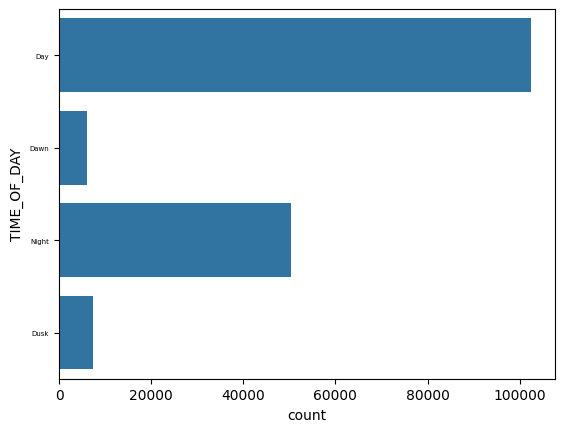

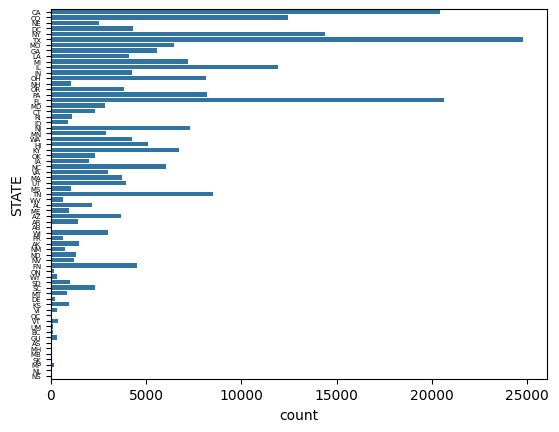

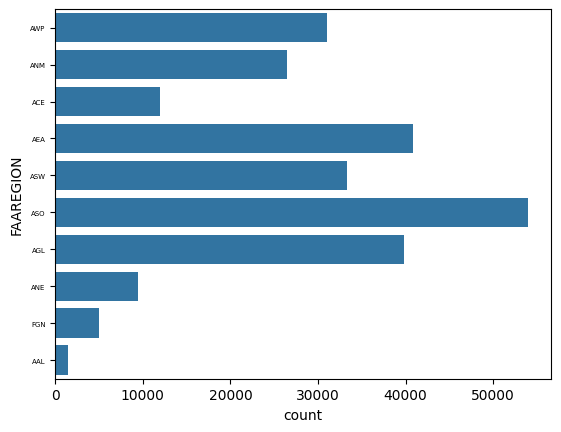

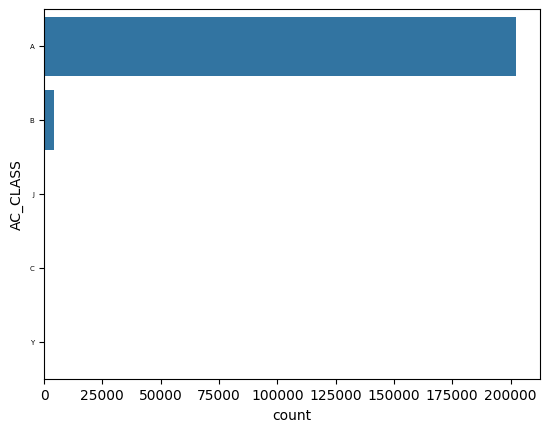

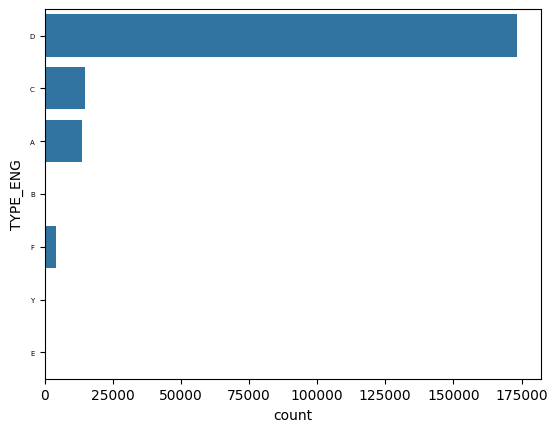

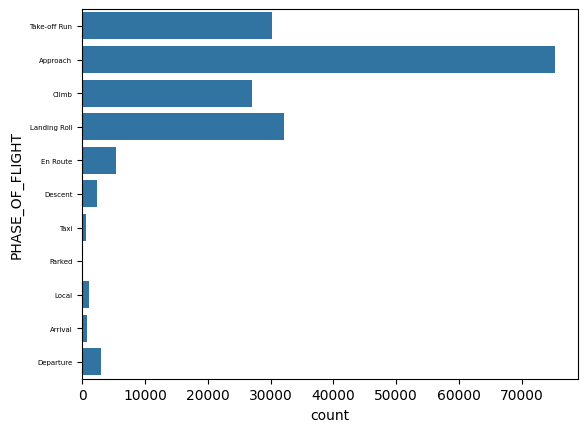

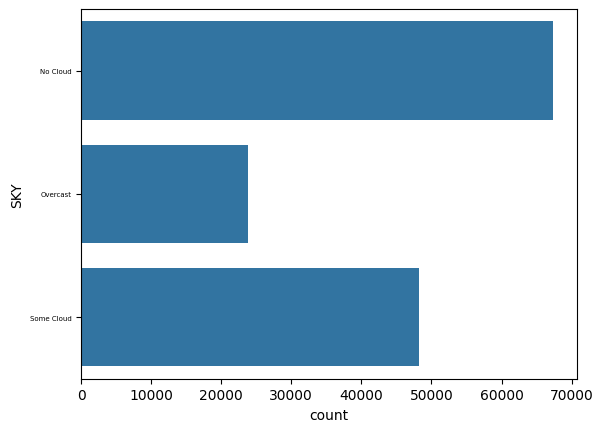

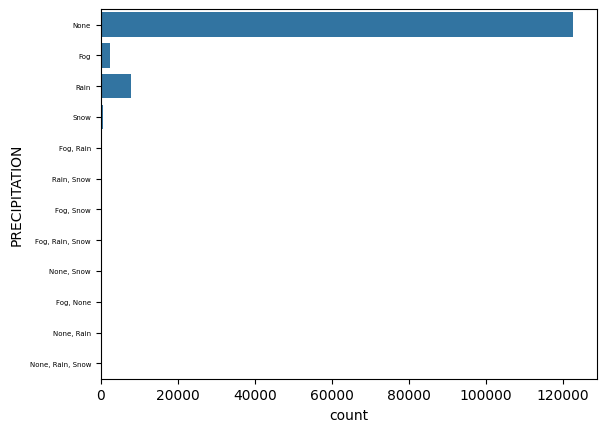

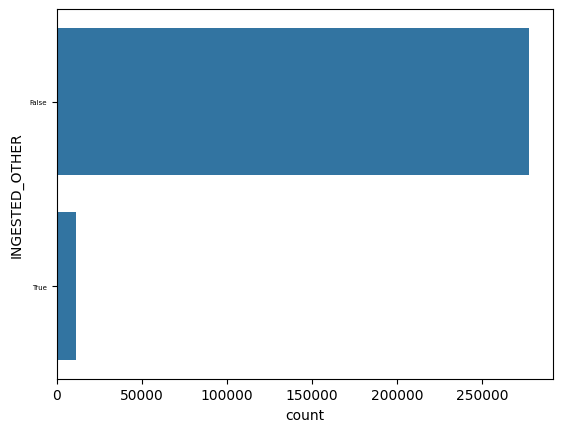

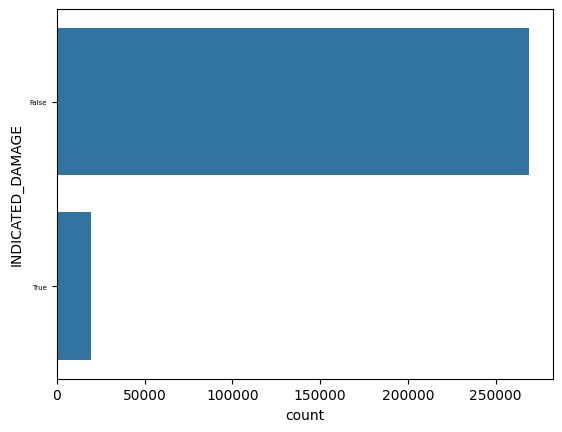

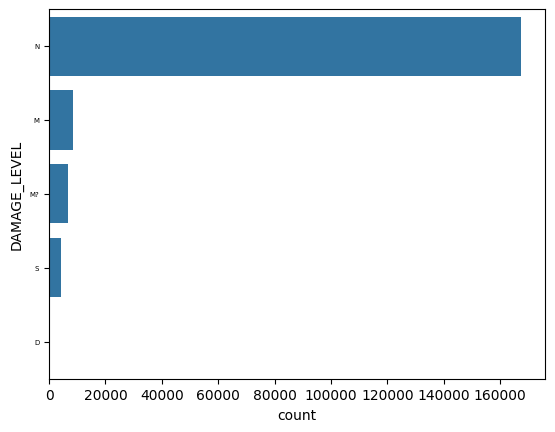

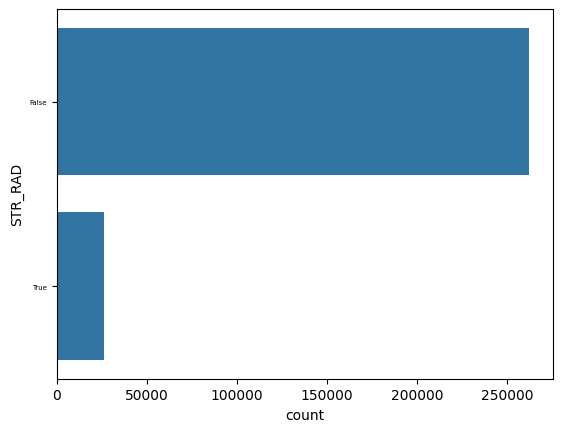

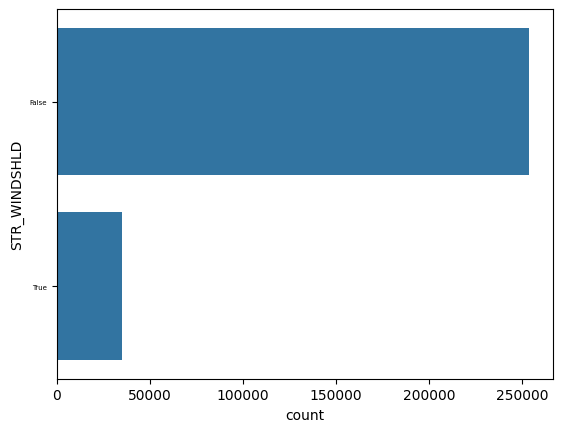

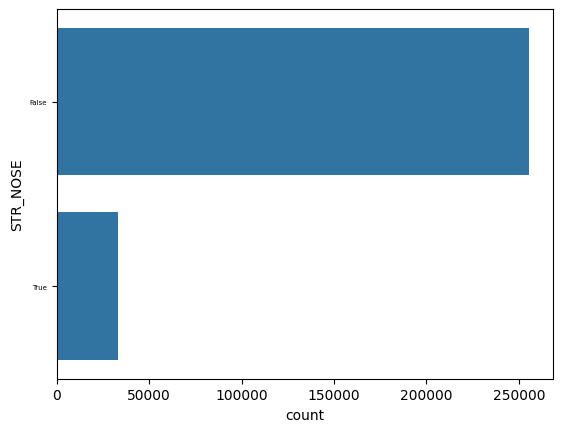

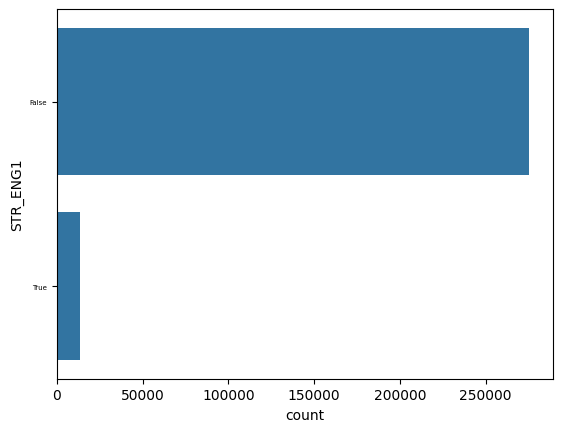

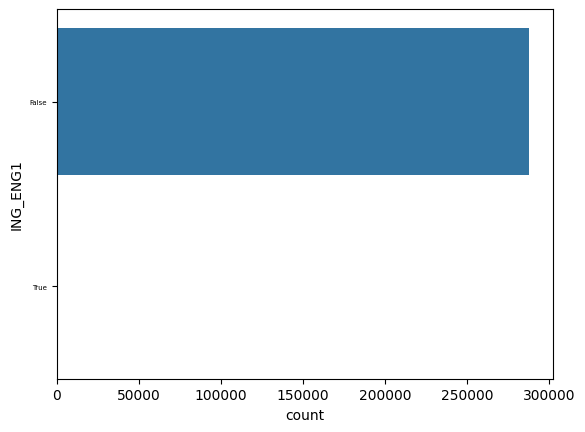

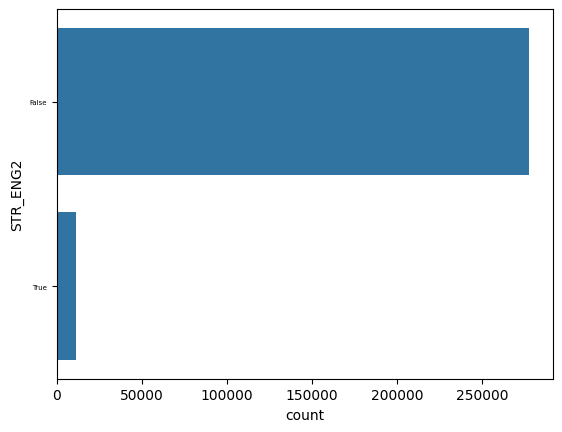

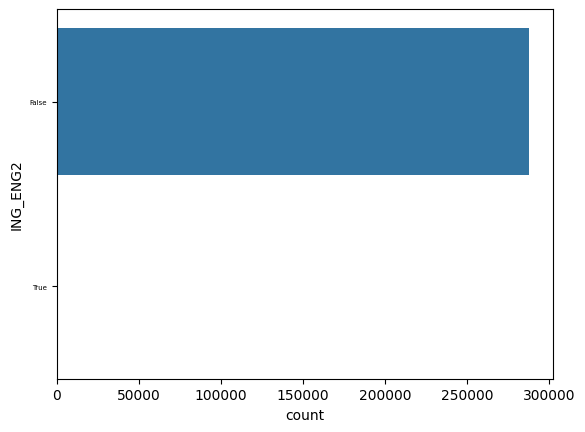

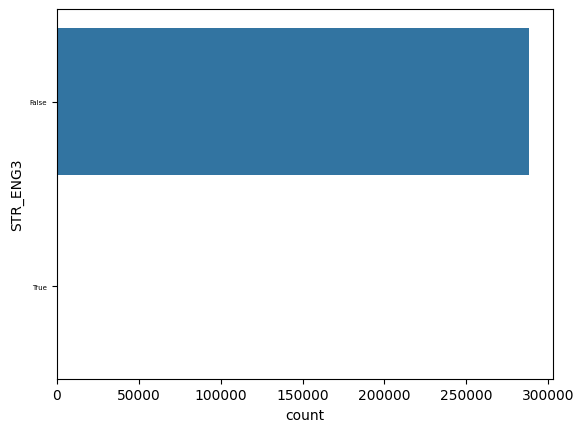

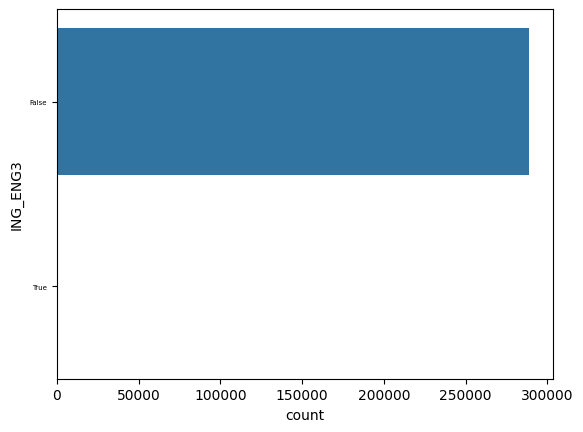

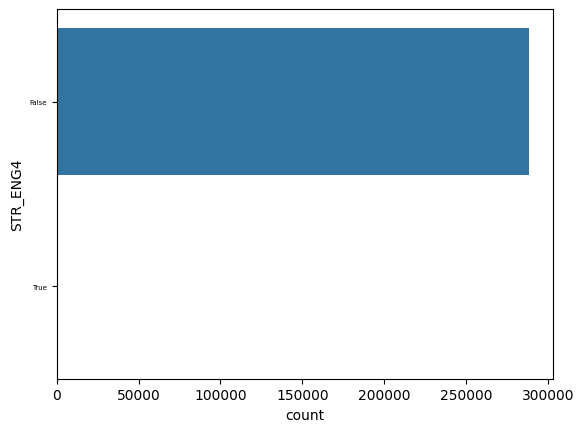

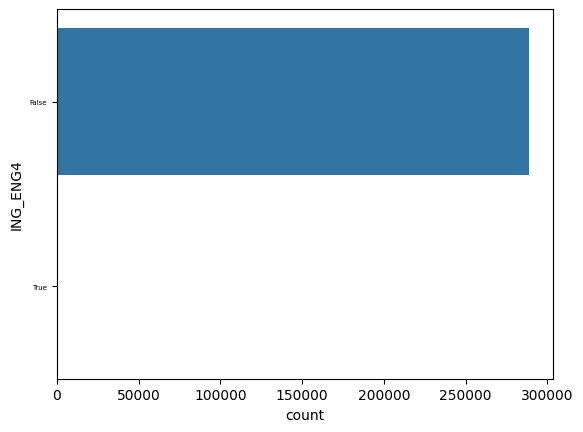

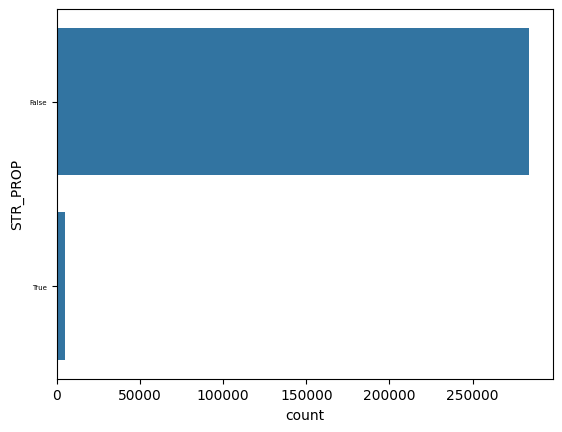

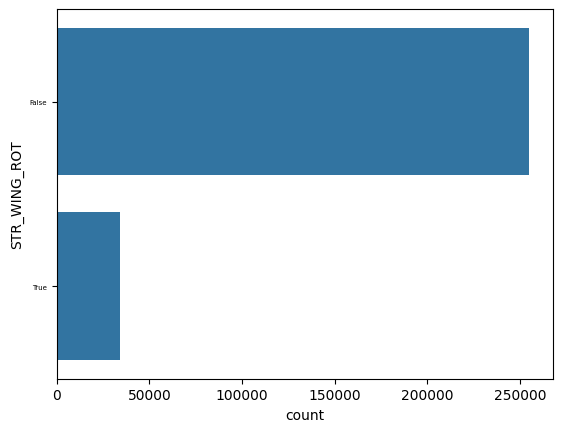

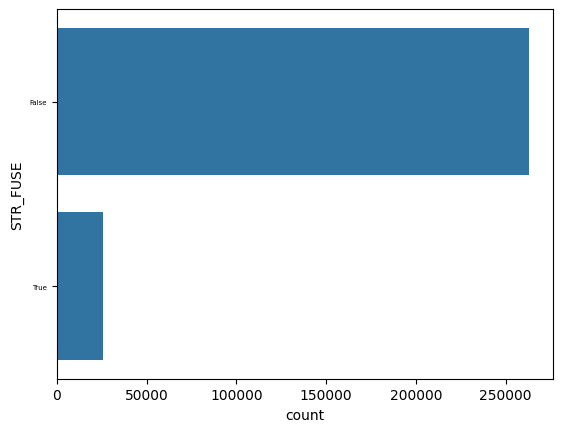

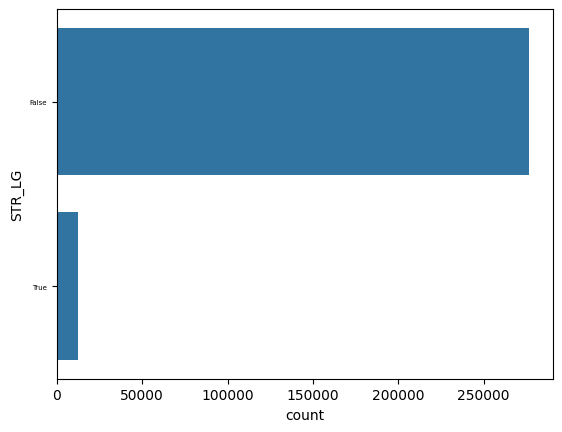

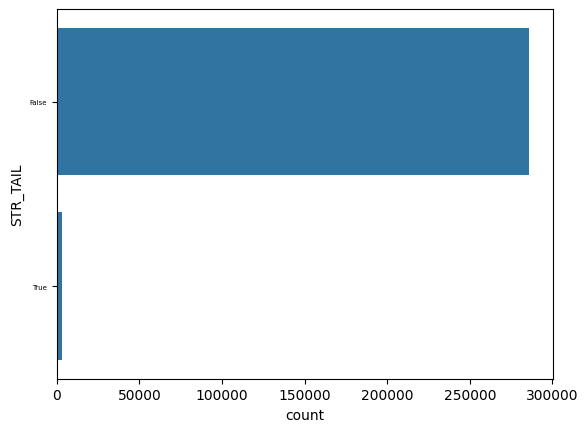

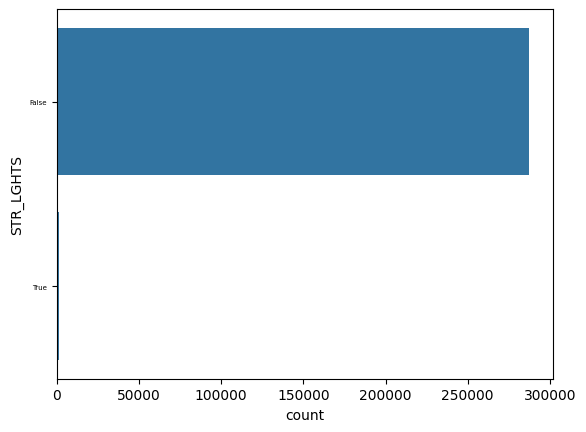

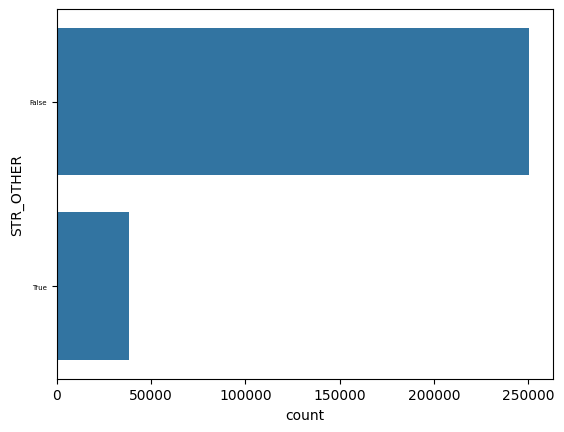

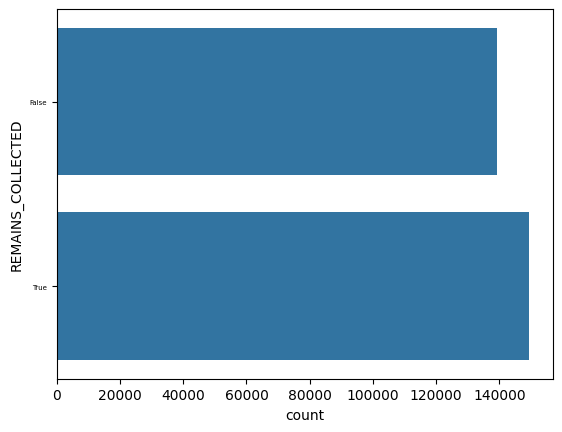

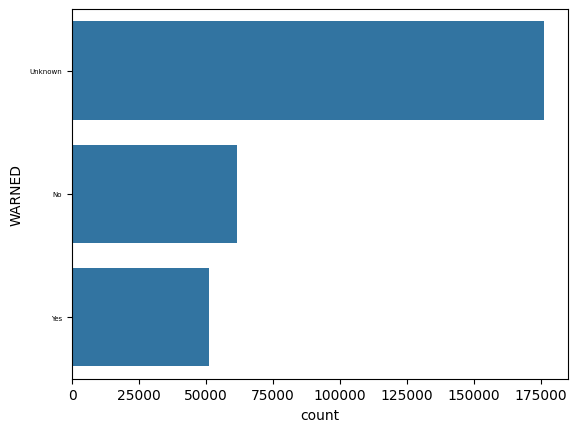

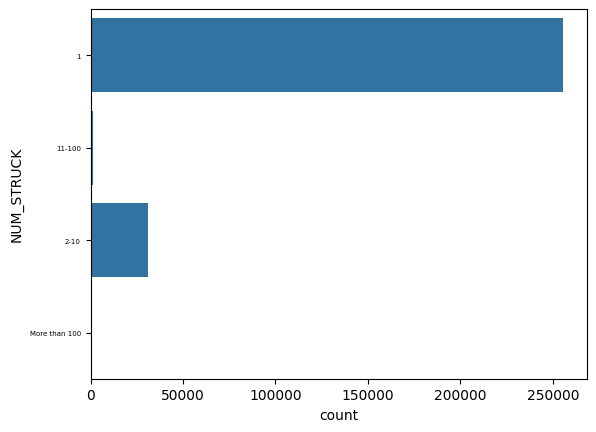

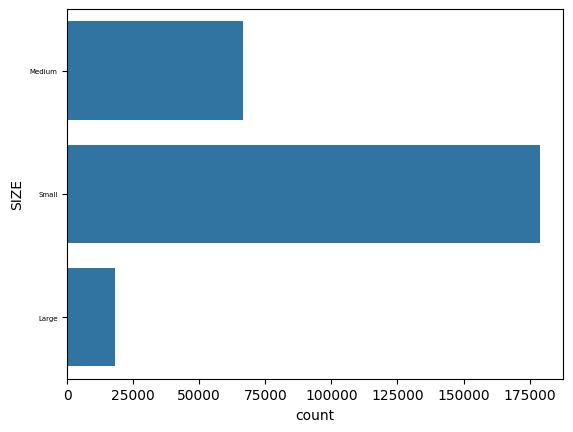

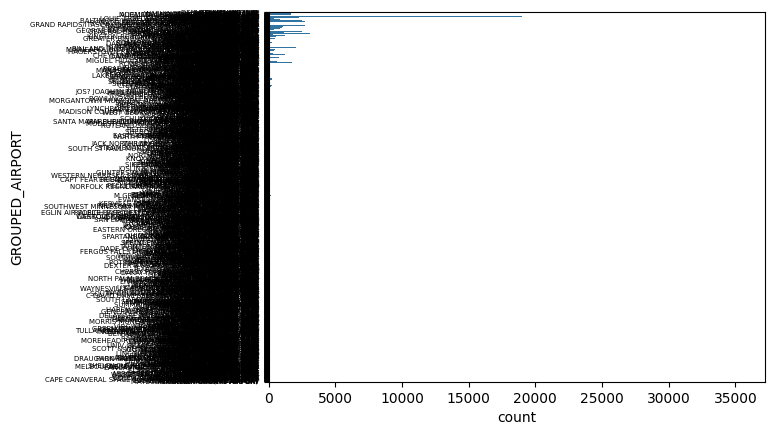

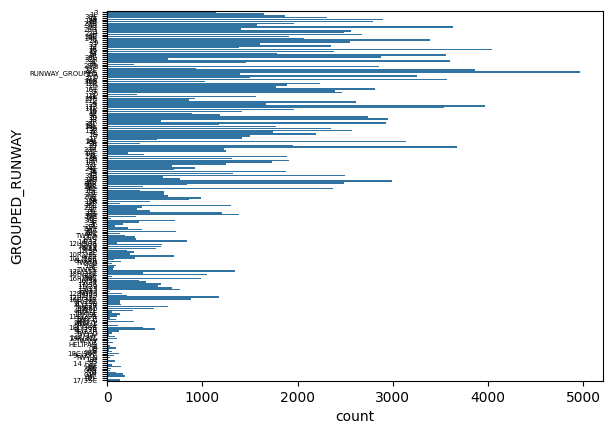

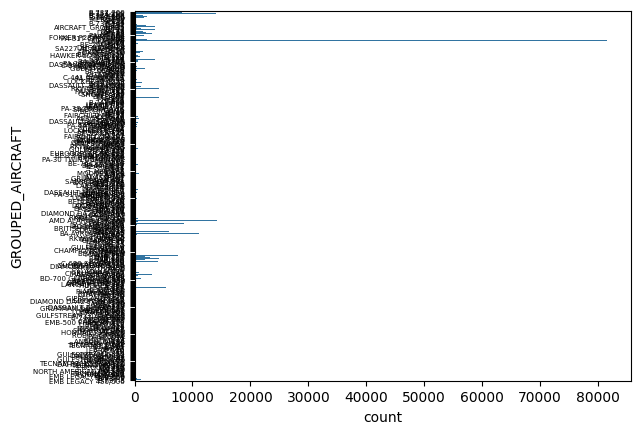

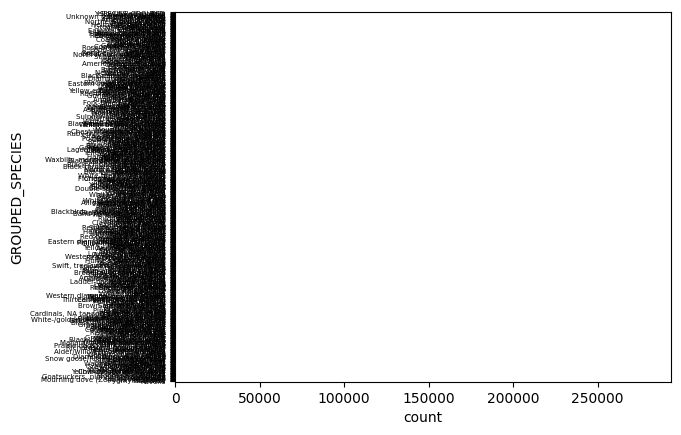

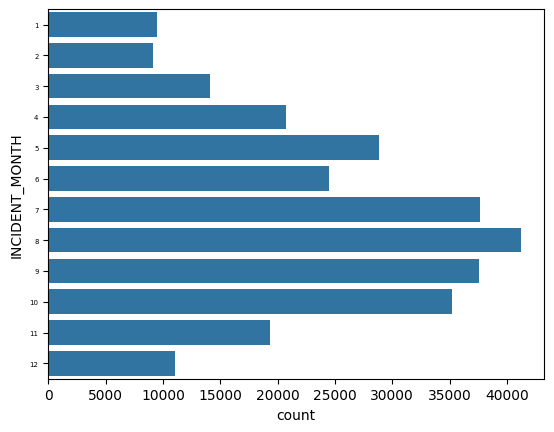

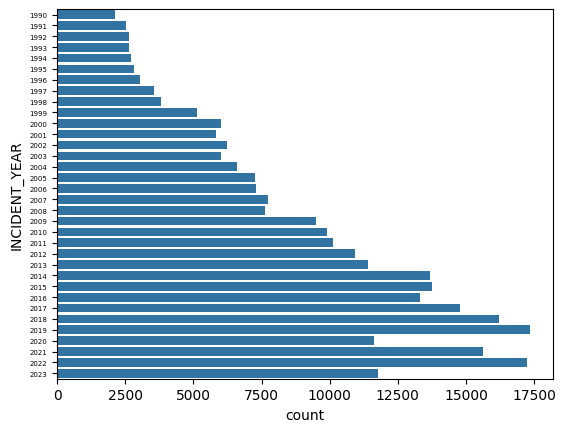

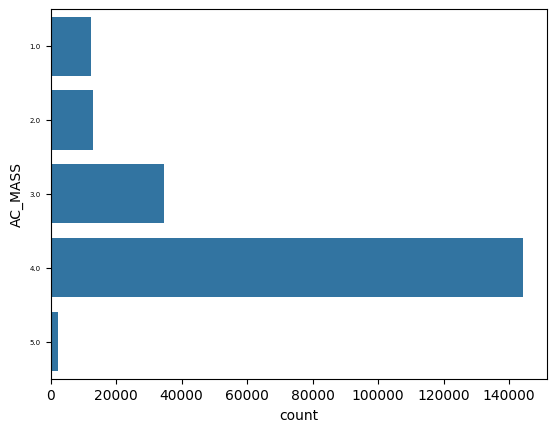

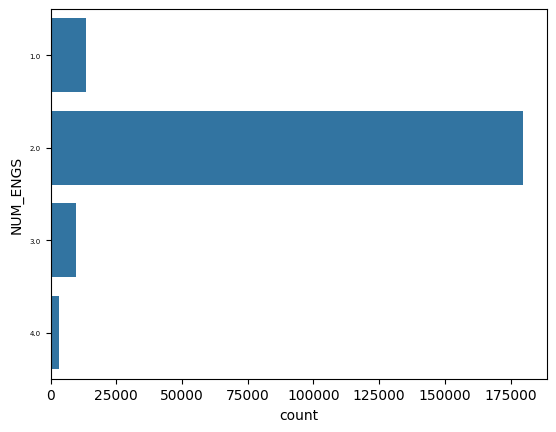

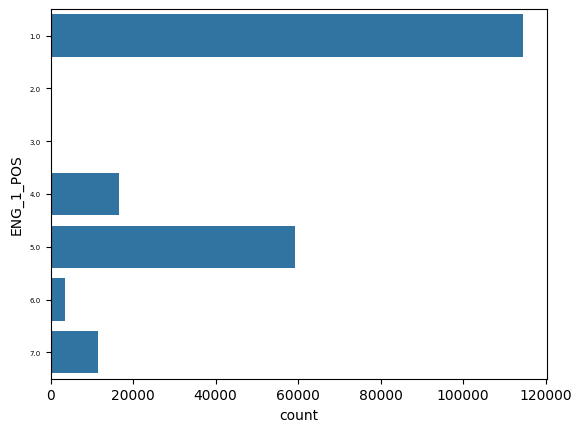

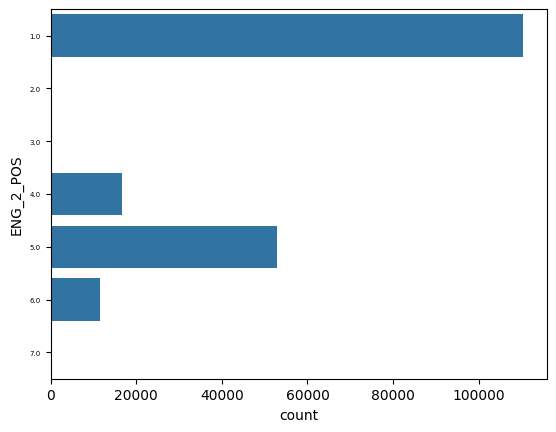

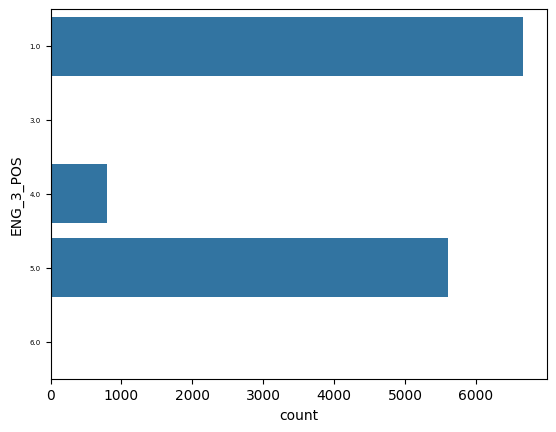

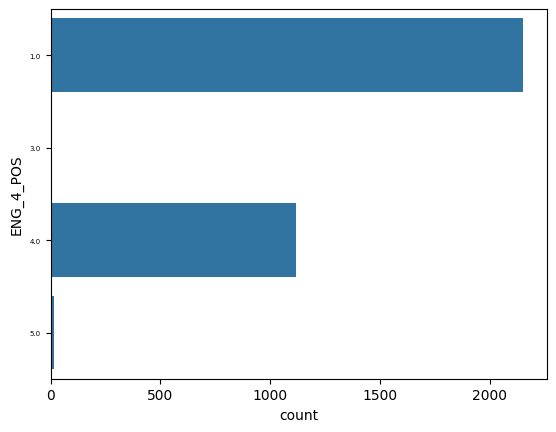

In [69]:
# Countplot for all the categorical variables
for i in df1_cat.columns:
    sns.countplot(y= df1_cat[i])
    plt.yticks(fontsize = 5)
    plt.show()

In [70]:
# Creating numerical dataframe
df1_num = df_n1_num.copy()
df1_num.drop(['INCIDENT_MONTH','INCIDENT_YEAR','AC_MASS','NUM_ENGS','ENG_1_POS','ENG_2_POS','ENG_3_POS','ENG_4_POS'],\
             axis = 1, inplace=True)

In [71]:
df1_num.head()

HEIGHT  SPEED  DISTANCE
0     0.0    NaN       0.0
1     0.0    NaN       0.0
2     0.0    NaN       0.0
3  1000.0    NaN       NaN
4  5000.0    NaN       NaN

<ipython-input-72-7ea5f3f39636>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_num[i])


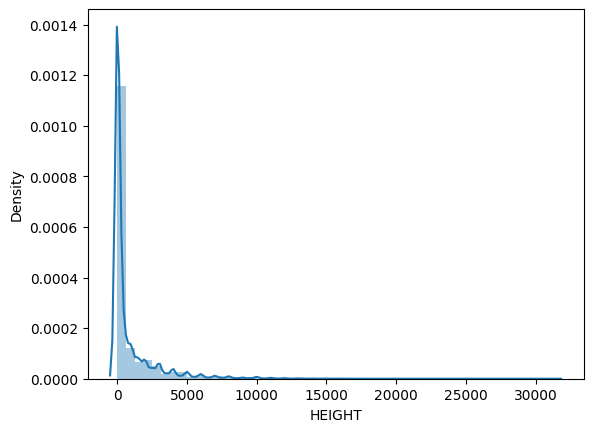

<ipython-input-72-7ea5f3f39636>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_num[i])


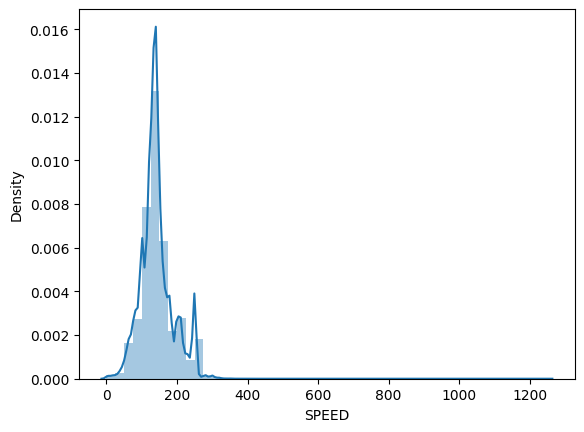

<ipython-input-72-7ea5f3f39636>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_num[i])


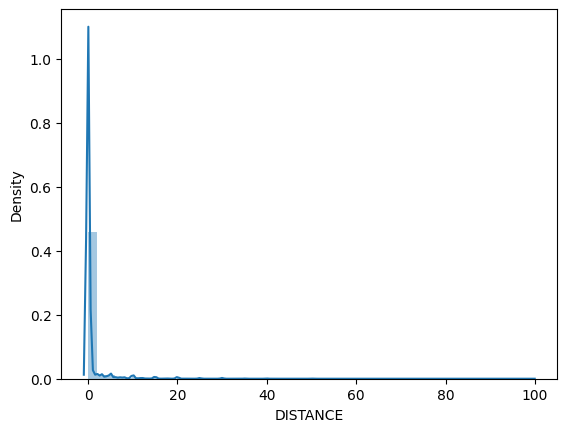

In [72]:
# Distribution of all the numerical variables
for i in df1_num:
    sns.distplot(df1_num[i])
    plt.show()

***Bi-Variate Analysis***
- Categorical varibles with target varibale

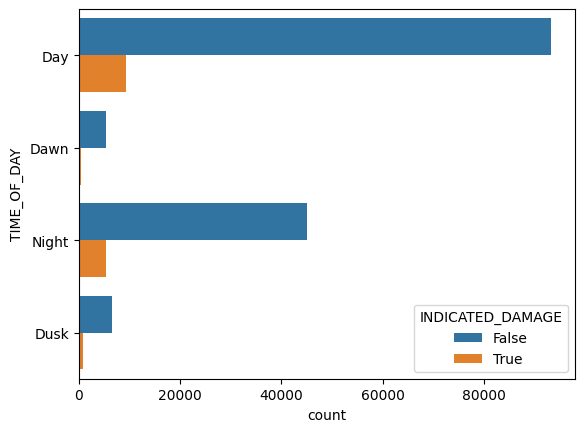

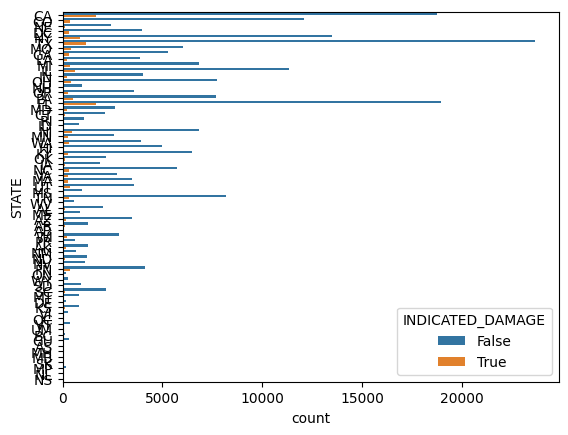

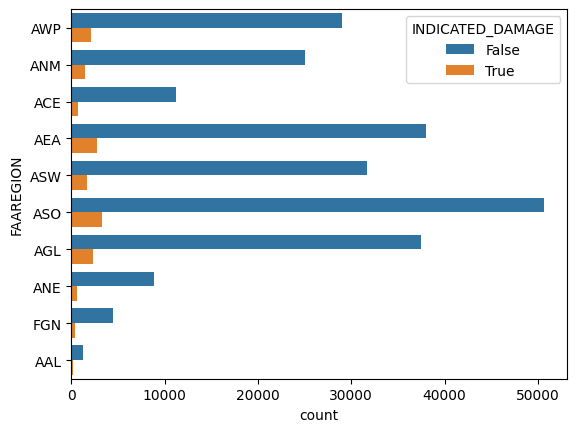

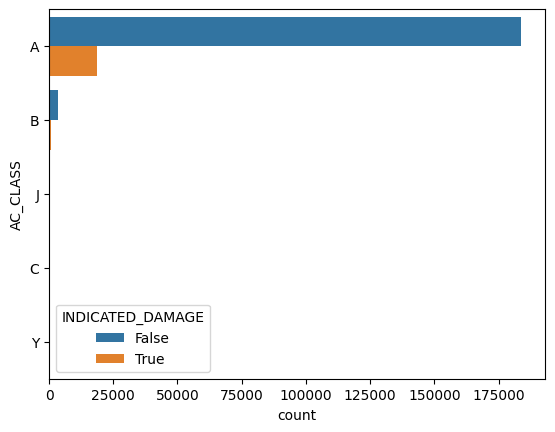

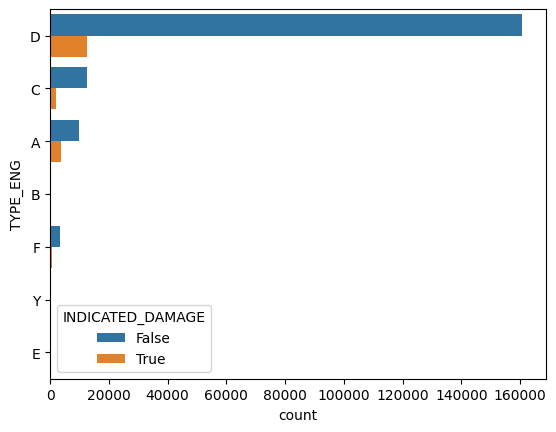

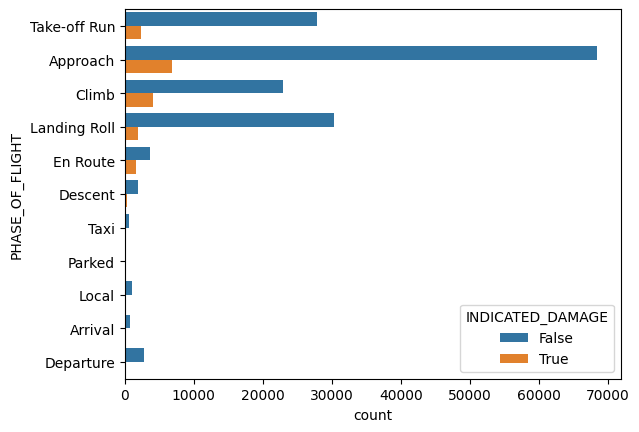

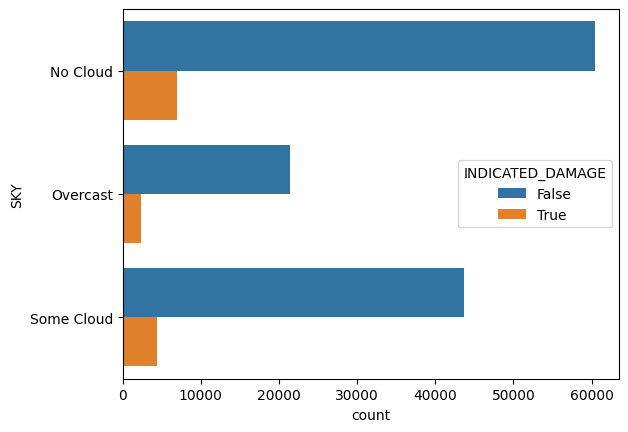

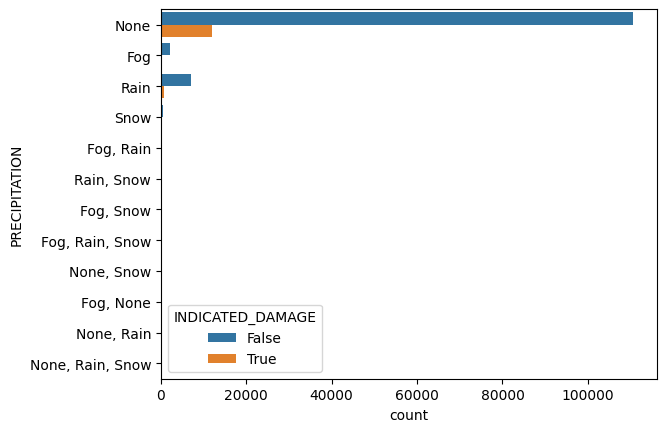

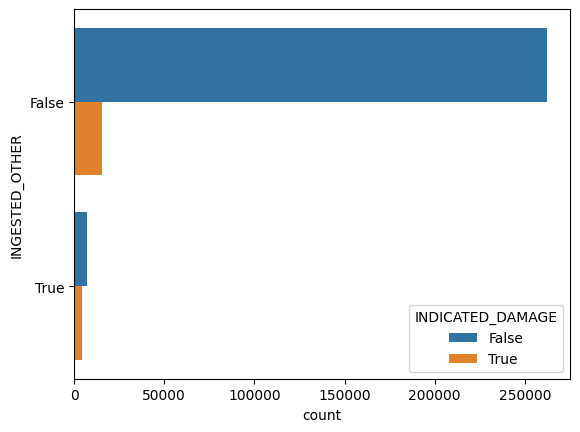

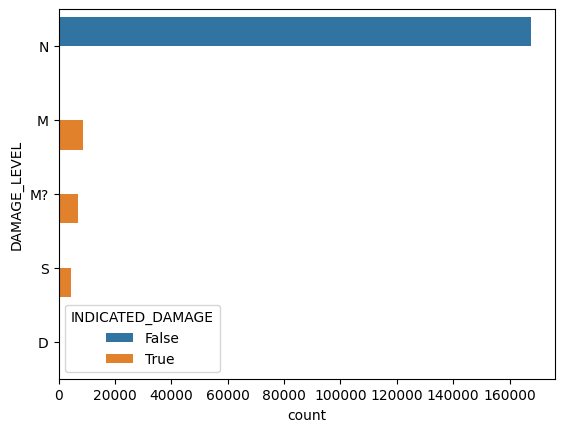

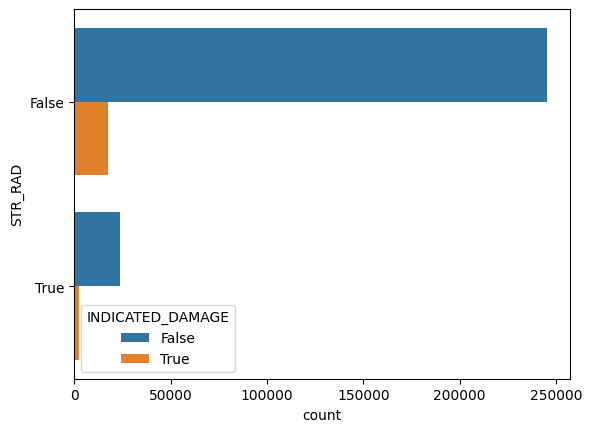

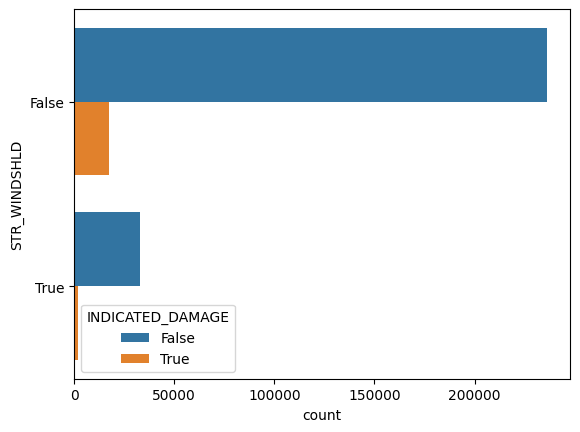

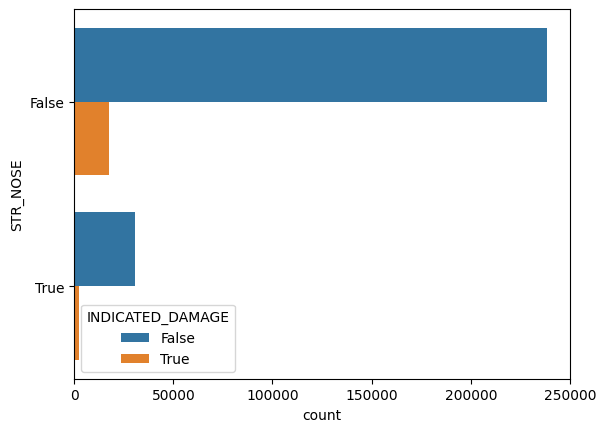

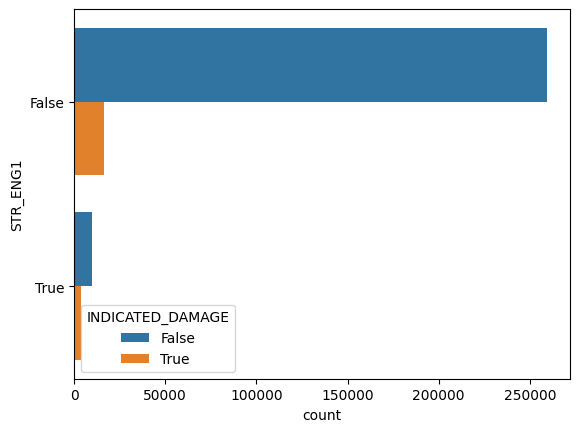

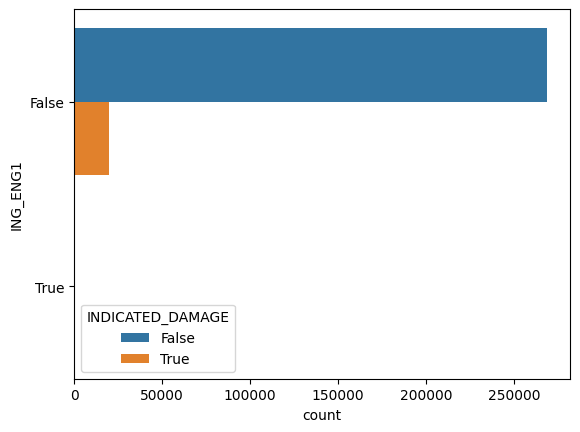

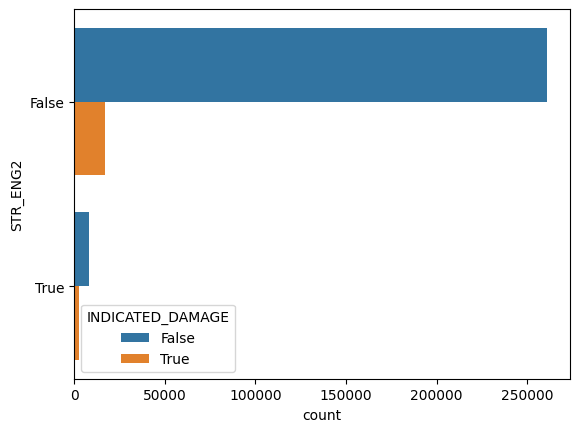

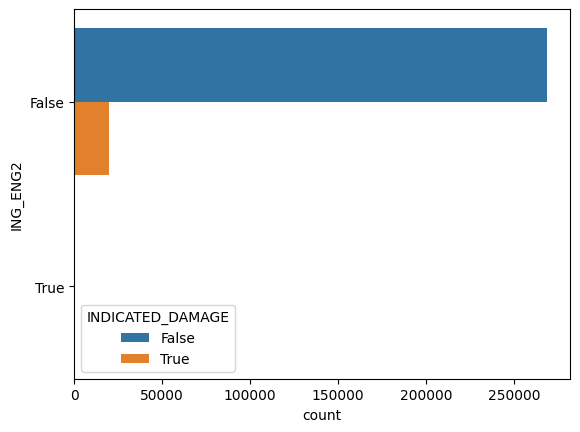

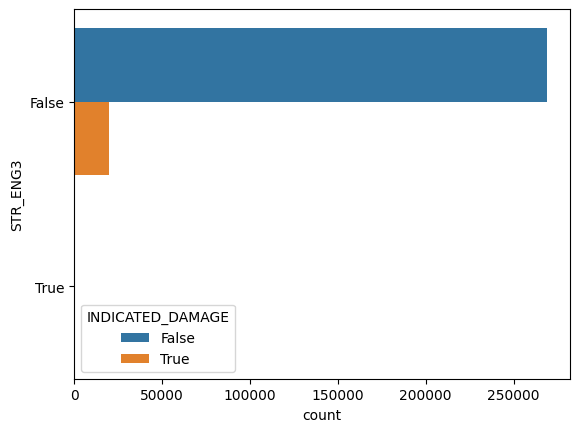

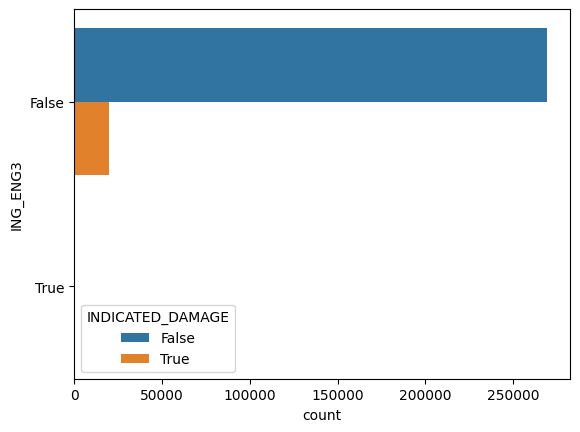

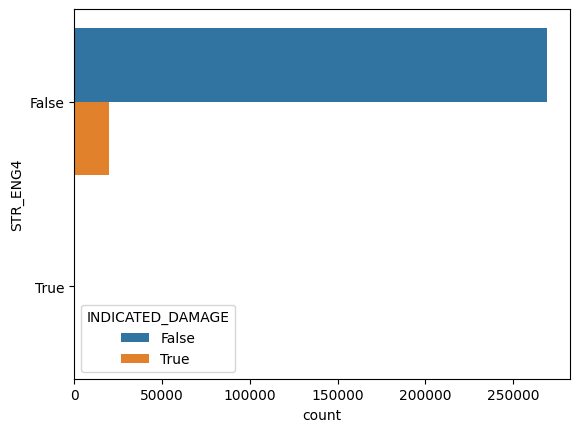

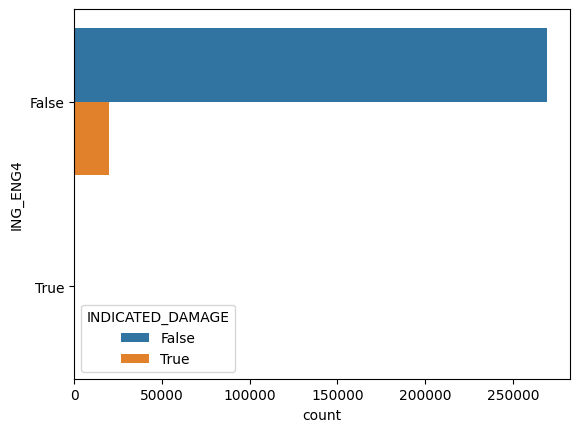

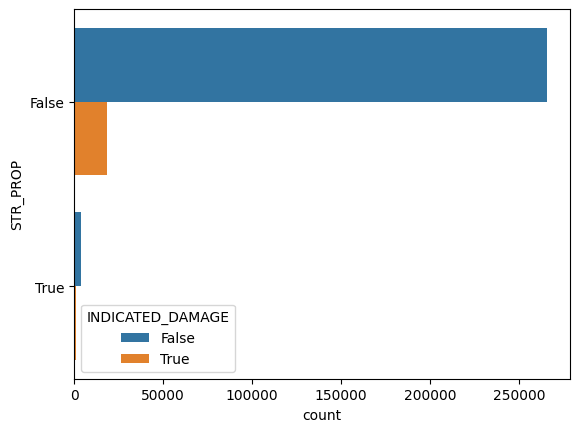

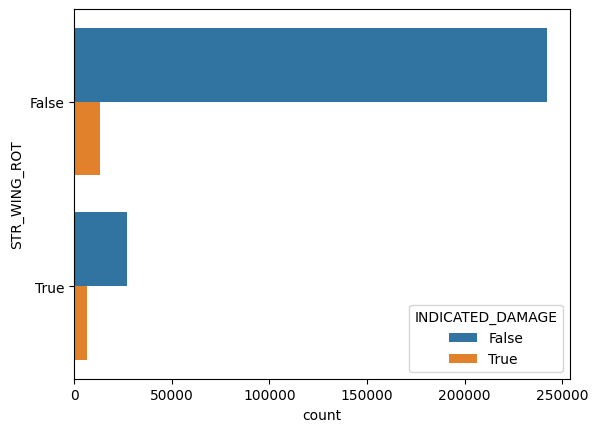

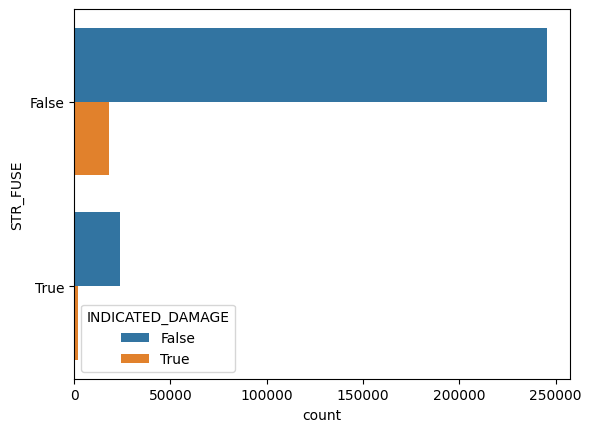

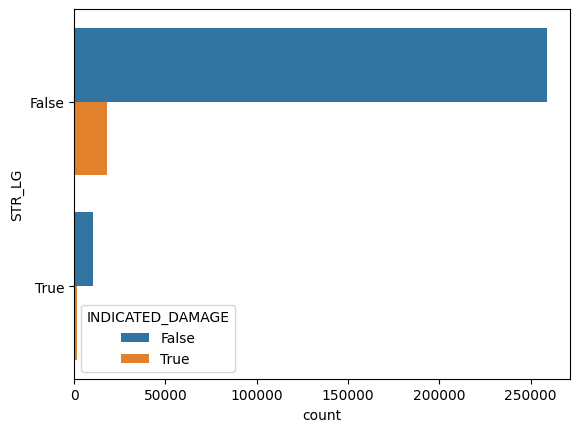

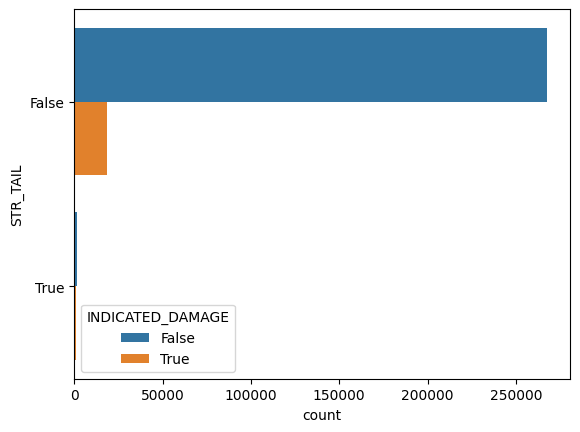

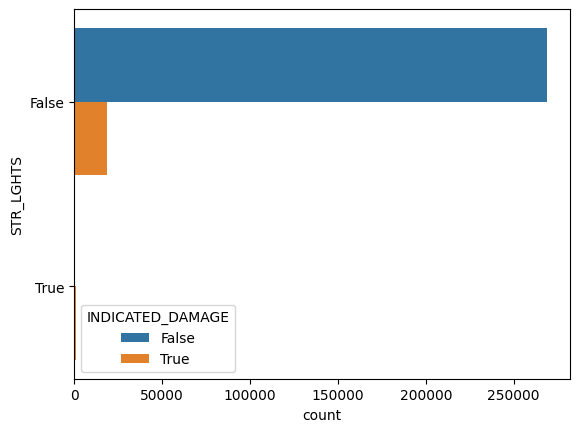

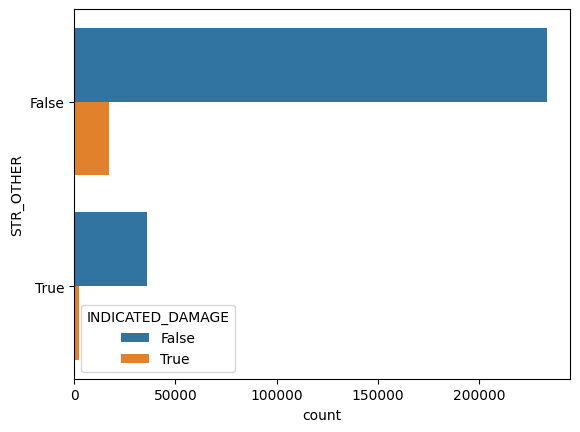

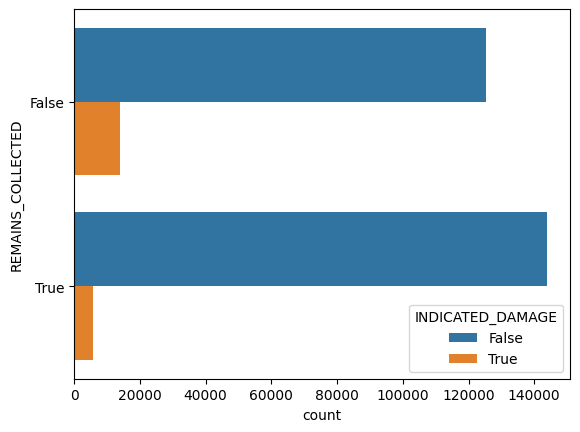

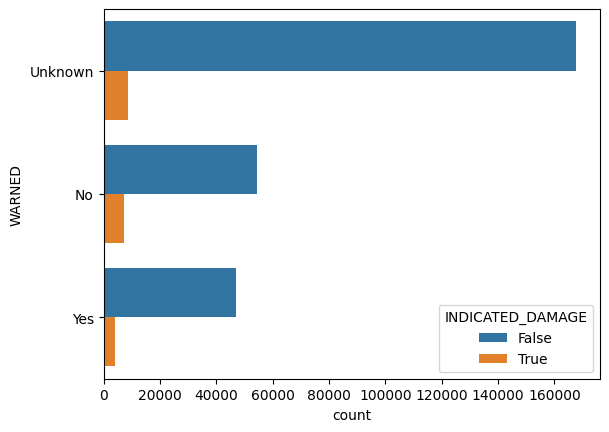

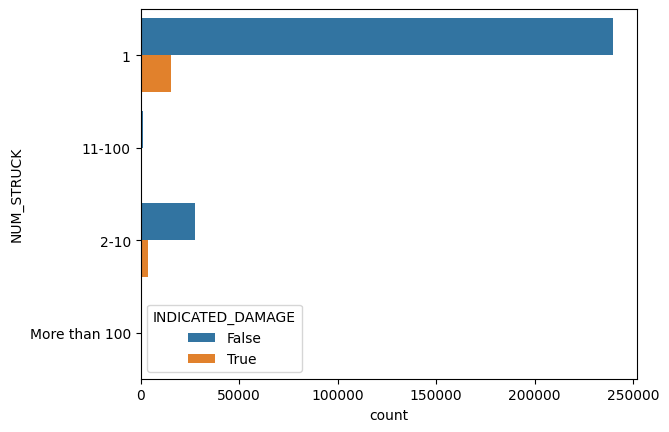

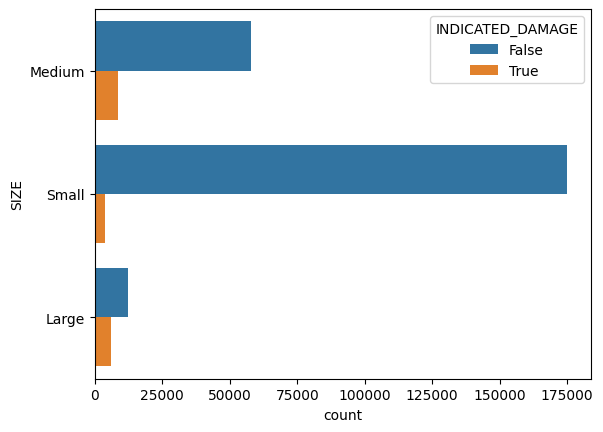

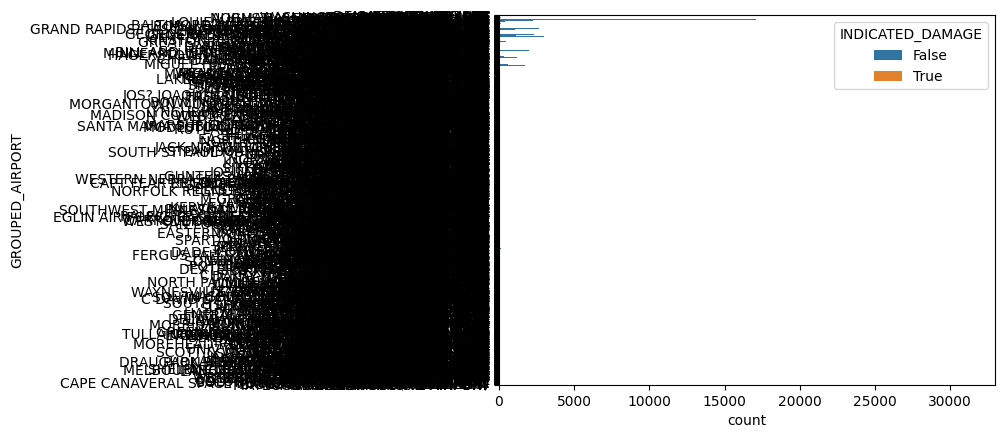

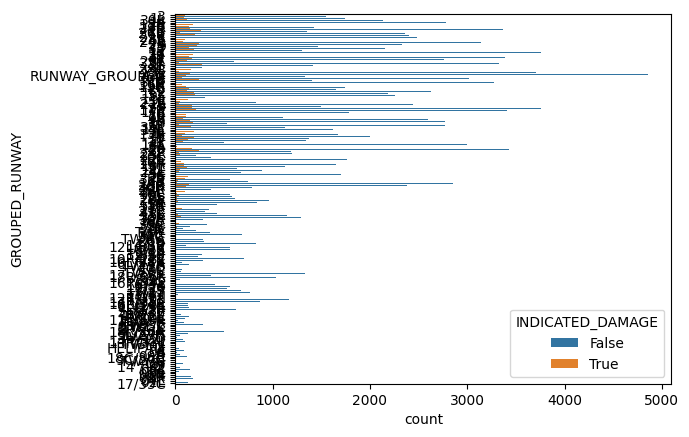

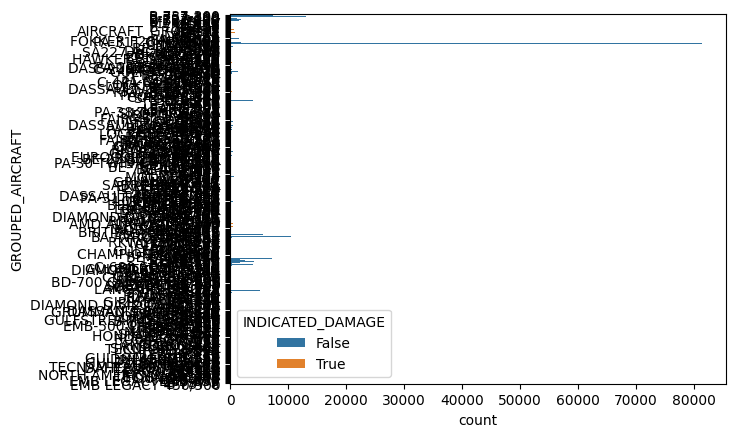

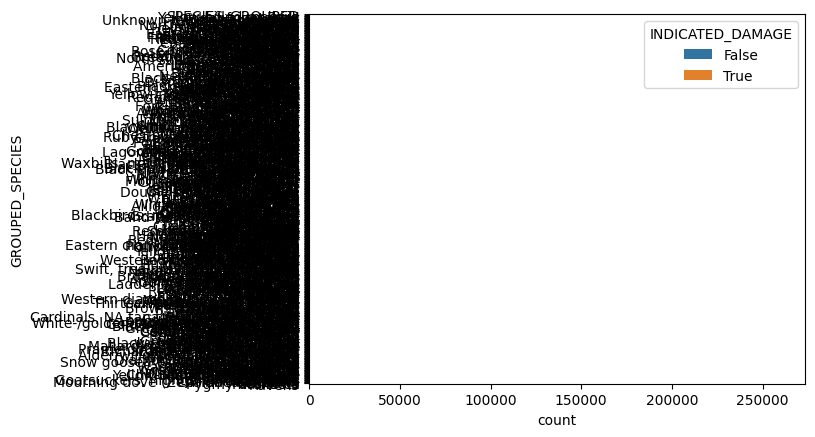

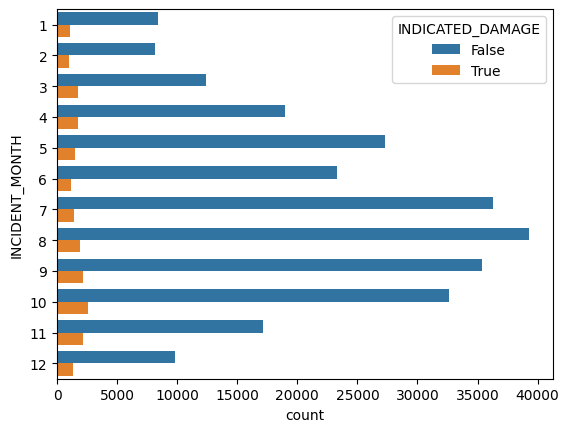

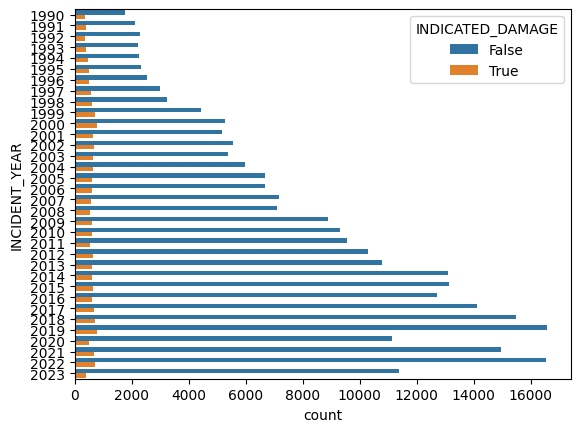

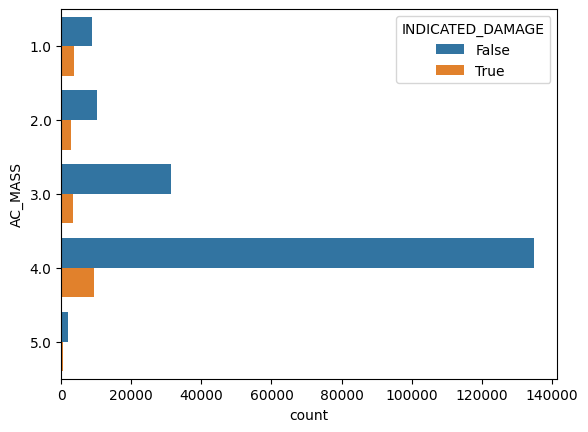

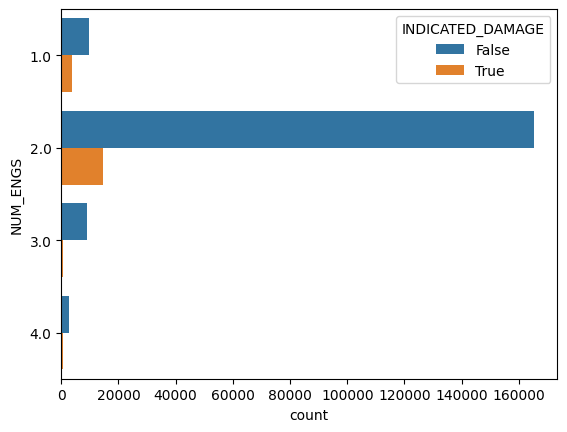

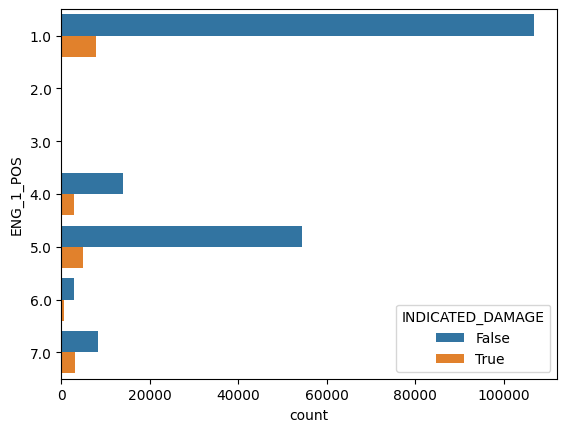

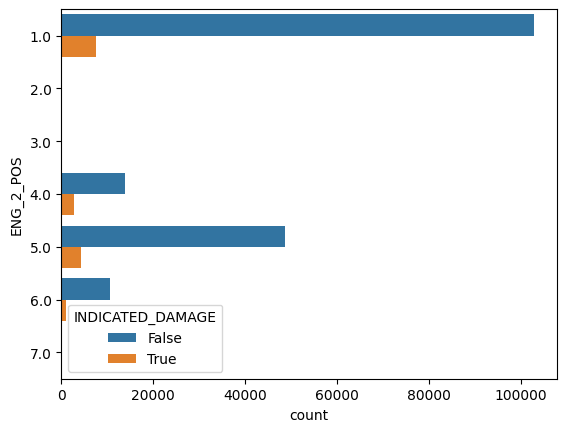

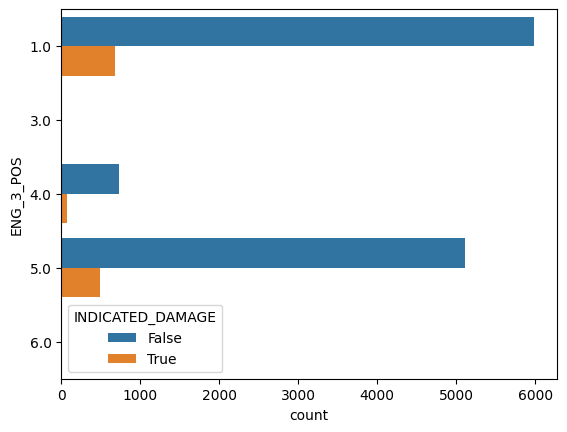

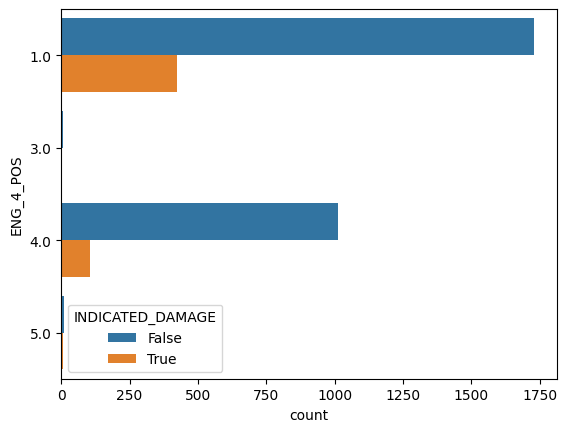

In [73]:
for i in df1_cat.drop('INDICATED_DAMAGE', axis = 1).columns:
    sns.countplot(y = df1_cat[i], hue = df1_cat['INDICATED_DAMAGE'])
    plt.show()

***Bi-Variate Analysis on numerical columns against target variable***


<ipython-input-74-f02429fccad7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_num[df1_cat['INDICATED_DAMAGE']==False][i])
<ipython-input-74-f02429fccad7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_num[df1_cat['INDICATED_DAMAGE']==True][i])


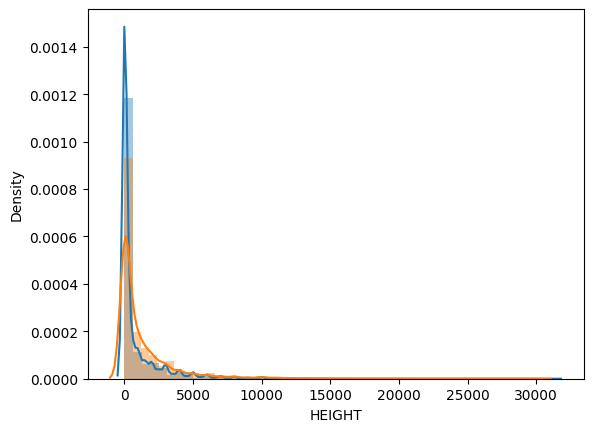

<ipython-input-74-f02429fccad7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_num[df1_cat['INDICATED_DAMAGE']==False][i])
<ipython-input-74-f02429fccad7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_num[df1_cat['INDICATED_DAMAGE']==True][i])


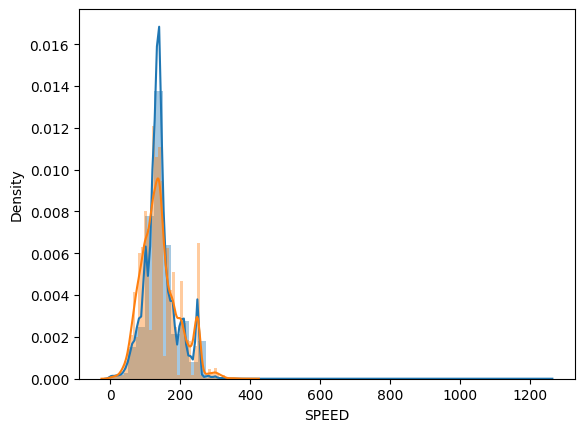

<ipython-input-74-f02429fccad7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_num[df1_cat['INDICATED_DAMAGE']==False][i])
<ipython-input-74-f02429fccad7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_num[df1_cat['INDICATED_DAMAGE']==True][i])


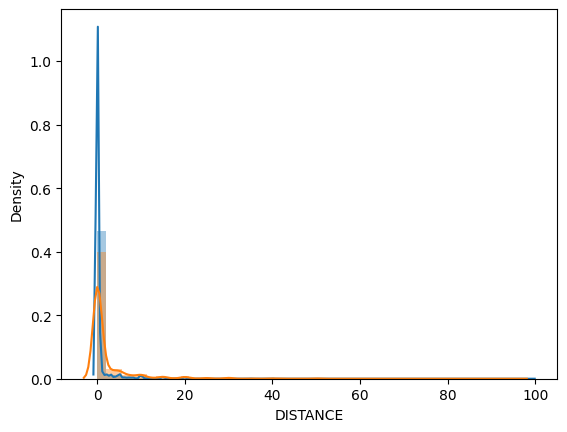

In [74]:
for i in df1_num.columns:
    sns.distplot(df1_num[df1_cat['INDICATED_DAMAGE']==False][i])
    sns.distplot(df1_num[df1_cat['INDICATED_DAMAGE']==True][i])
    plt.show()

***Multi-Variate analysis on Numerical variables***


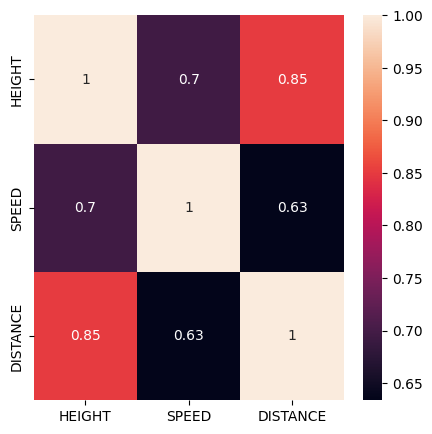

In [75]:
plt.figure(figsize=(5,5))
sns.heatmap(df1_num.corr(), annot=True)
plt.show()

In [76]:
df_n1_cat.head()

TIME_OF_DAY STATE FAAREGION AC_CLASS TYPE_ENG PHASE_OF_FLIGHT  SKY  \
0         NaN    CA       AWP        A        D    Take-off Run  NaN   
1         NaN    CO       ANM        A        D    Take-off Run  NaN   
2         NaN    NE       ACE        A        D    Take-off Run  NaN   
3         NaN    DC       AEA        A        D        Approach  NaN   
4         NaN    NY       AEA        A        D           Climb  NaN   

  PRECIPITATION  INGESTED_OTHER  INDICATED_DAMAGE DAMAGE_LEVEL  STR_RAD  \
0           NaN           False             False          NaN    False   
1           NaN           False             False          NaN    False   
2           NaN           False             False            N    False   
3           NaN           False             False            N    False   
4           NaN            True              True            M    False   

   STR_WINDSHLD  STR_NOSE  STR_ENG1  ING_ENG1  STR_ENG2  ING_ENG2  STR_ENG3  \
0         False      True     False     False     False     False     False   
1         False     False      True     False     False     False     False   
2         False     False     False     False      True     False     False   
3         False     False     False     False     False     False     False   
4         False     False      True     False     False     False     False   

   ING_ENG3  STR_ENG4  ING_ENG4  STR_PROP  STR_WING_ROT  STR_FUSE  STR_LG  \
0     False     False     False     False         False     False   False   
1     False     False     False     False         False     False   False   
2     False     False     False     False         False     False   False   
3     False     False     False     False         False      True   False   
4     False     False     False     False         False      True   False   

   STR_TAIL  STR_LGHTS  STR_OTHER  REMAINS_COLLECTED   WARNED NUM_STRUCK  \
0     False      False      False              False  Unknown          1   
1     False      False      False              False  Unknown          1   
2     False      False      False              False  Unknown          1   
3     False      False      False              False  Unknown          1   
4     False      False      False              False  Unknown          1   

     SIZE              GROUPED_AIRPORT GROUPED_RUNWAY GROUPED_AIRCRAFT  \
0  Medium              SACRAMENTO INTL            NaN        B-737-300   
1  Medium          DENVER INTL AIRPORT            NaN        B-737-300   
2  Medium              EPPLEY AIRFIELD            NaN        B-757-200   
3  Medium  WASHINGTON DULLES INTL ARPT            NaN            A-320   
4  Medium              LA GUARDIA ARPT            NaN            A-320   

   GROUPED_SPECIES  
0  SPECIES_GROUPED  
1  SPECIES_GROUPED  
2  SPECIES_GROUPED  
3  SPECIES_GROUPED  
4  SPECIES_GROUPED

In [77]:
pd.set_option('display.max_rows', None)
(df.select_dtypes(exclude= np.number).isnull().sum()/df.shape[0])*100

INCIDENT_DATE             0.000000
TIME                     43.342336
TIME_OF_DAY              42.386344
AIRPORT_ID                0.002077
AIRPORT                   0.000000
RUNWAY                   24.222845
STATE                    12.292164
FAAREGION                12.292164
LOCATION                 88.248676
ENROUTE_STATE            98.255947
OPID                      0.009002
OPERATOR                  0.000000
REG                      40.257263
FLT                      55.247741
AIRCRAFT                  0.000000
AMA                      28.854610
AMO                      34.157751
AC_CLASS                 28.363630
TYPE_ENG                 28.657595
PHASE_OF_FLIGHT          38.422146
SKY                      51.739206
PRECIPITATION            53.650497
COST_REPAIRS             98.254908
COST_OTHER               98.351858
COST_REPAIRS_INFL_ADJ    98.254908
COST_OTHER_INFL_ADJ      98.351858
INGESTED_OTHER            0.000000
INDICATED_DAMAGE          0.000000
DAMAGE_LEVEL        

In [78]:
df_n1_num.isnull().sum()

INCIDENT_MONTH         0
INCIDENT_YEAR          0
AC_MASS            82320
NUM_ENGS           82551
ENG_1_POS          83329
ENG_2_POS          97198
ENG_3_POS         275730
ENG_4_POS         285520
HEIGHT            140003
SPEED             194573
DISTANCE          100576
dtype: int64

In [79]:
df_n1_cat.isnull().sum()

TIME_OF_DAY          122416
STATE                 35501
FAAREGION             35501
AC_CLASS              81917
TYPE_ENG              82766
PHASE_OF_FLIGHT      110967
SKY                  149428
PRECIPITATION        154948
INGESTED_OTHER            0
INDICATED_DAMAGE          0
DAMAGE_LEVEL         101495
STR_RAD                   0
STR_WINDSHLD              0
STR_NOSE                  0
STR_ENG1                  0
ING_ENG1                  0
STR_ENG2                  0
ING_ENG2                  0
STR_ENG3                  0
ING_ENG3                  0
STR_ENG4                  0
ING_ENG4                  0
STR_PROP                  0
STR_WING_ROT              0
STR_FUSE                  0
STR_LG                    0
STR_TAIL                  0
STR_LGHTS                 0
STR_OTHER                 0
REMAINS_COLLECTED         0
WARNED                    0
NUM_STRUCK              636
SIZE                  25272
GROUPED_AIRPORT           0
GROUPED_RUNWAY        69958
GROUPED_AIRCRAFT    

## categorical columns - value counts,unique

In [80]:
for column in df_n1_cat.columns:
    print(f"\nColumn: {column}")
    print(f"Unique values: {df_n1_cat[column].unique()}")
    print(f"Value counts:\n{df_n1_cat[column].value_counts()}")


Column: TIME_OF_DAY
Unique values: [nan 'Day' 'Dawn' 'Night' 'Dusk']
Value counts:
Day      102548
Night     50446
Dusk       7428
Dawn       5972
Name: TIME_OF_DAY, dtype: int64

Column: STATE
Unique values: ['CA' 'CO' 'NE' 'DC' 'NY' 'TX' 'MO' 'GA' 'LA' 'MI' 'IL' 'IN' 'OH' 'NH'
 'OR' nan 'PA' 'FL' 'MD' 'CT' 'RI' 'ID' 'NJ' 'MN' 'WA' 'HI' 'KY' 'OK' 'IA'
 'NC' 'VA' 'MA' 'UT' 'MS' 'TN' 'WV' 'AL' 'ME' 'AZ' 'AR' 'AB' 'WI' 'PR'
 'AK' 'NM' 'ND' 'NV' 'FN' 'ON' 'WY' 'SD' 'SC' 'MT' 'DE' 'KS' 'VI' 'QC'
 'VT' 'UM' 'BC' 'GU' 'AS' 'MH' 'MB' 'SK' 'MP' 'NL' 'NS']
Value counts:
TX    24794
FL    20616
CA    20431
NY    14371
CO    12420
IL    11942
TN     8503
PA     8190
OH     8133
NJ     7282
MI     7213
KY     6743
MO     6444
NC     6057
GA     5574
HI     5078
FN     4509
DC     4307
IN     4242
WA     4233
LA     4113
UT     3948
OR     3838
MA     3740
AZ     3675
VA     3014
WI     3011
MN     2887
MD     2843
NE     2550
OK     2308
SC     2297
CT     2293
AL     2164
IA     2011
AK     1453

In [81]:
df_n1_cat.isnull().sum()

TIME_OF_DAY          122416
STATE                 35501
FAAREGION             35501
AC_CLASS              81917
TYPE_ENG              82766
PHASE_OF_FLIGHT      110967
SKY                  149428
PRECIPITATION        154948
INGESTED_OTHER            0
INDICATED_DAMAGE          0
DAMAGE_LEVEL         101495
STR_RAD                   0
STR_WINDSHLD              0
STR_NOSE                  0
STR_ENG1                  0
ING_ENG1                  0
STR_ENG2                  0
ING_ENG2                  0
STR_ENG3                  0
ING_ENG3                  0
STR_ENG4                  0
ING_ENG4                  0
STR_PROP                  0
STR_WING_ROT              0
STR_FUSE                  0
STR_LG                    0
STR_TAIL                  0
STR_LGHTS                 0
STR_OTHER                 0
REMAINS_COLLECTED         0
WARNED                    0
NUM_STRUCK              636
SIZE                  25272
GROUPED_AIRPORT           0
GROUPED_RUNWAY        69958
GROUPED_AIRCRAFT    

## Label encoding for object

In [82]:
df1_n1_cat = df_n1_cat.copy()
df1_n1_cat.head()

TIME_OF_DAY STATE FAAREGION AC_CLASS TYPE_ENG PHASE_OF_FLIGHT  SKY  \
0         NaN    CA       AWP        A        D    Take-off Run  NaN   
1         NaN    CO       ANM        A        D    Take-off Run  NaN   
2         NaN    NE       ACE        A        D    Take-off Run  NaN   
3         NaN    DC       AEA        A        D        Approach  NaN   
4         NaN    NY       AEA        A        D           Climb  NaN   

  PRECIPITATION  INGESTED_OTHER  INDICATED_DAMAGE DAMAGE_LEVEL  STR_RAD  \
0           NaN           False             False          NaN    False   
1           NaN           False             False          NaN    False   
2           NaN           False             False            N    False   
3           NaN           False             False            N    False   
4           NaN            True              True            M    False   

   STR_WINDSHLD  STR_NOSE  STR_ENG1  ING_ENG1  STR_ENG2  ING_ENG2  STR_ENG3  \
0         False      True     False     False     False     False     False   
1         False     False      True     False     False     False     False   
2         False     False     False     False      True     False     False   
3         False     False     False     False     False     False     False   
4         False     False      True     False     False     False     False   

   ING_ENG3  STR_ENG4  ING_ENG4  STR_PROP  STR_WING_ROT  STR_FUSE  STR_LG  \
0     False     False     False     False         False     False   False   
1     False     False     False     False         False     False   False   
2     False     False     False     False         False     False   False   
3     False     False     False     False         False      True   False   
4     False     False     False     False         False      True   False   

   STR_TAIL  STR_LGHTS  STR_OTHER  REMAINS_COLLECTED   WARNED NUM_STRUCK  \
0     False      False      False              False  Unknown          1   
1     False      False      False              False  Unknown          1   
2     False      False      False              False  Unknown          1   
3     False      False      False              False  Unknown          1   
4     False      False      False              False  Unknown          1   

     SIZE              GROUPED_AIRPORT GROUPED_RUNWAY GROUPED_AIRCRAFT  \
0  Medium              SACRAMENTO INTL            NaN        B-737-300   
1  Medium          DENVER INTL AIRPORT            NaN        B-737-300   
2  Medium              EPPLEY AIRFIELD            NaN        B-757-200   
3  Medium  WASHINGTON DULLES INTL ARPT            NaN            A-320   
4  Medium              LA GUARDIA ARPT            NaN            A-320   

   GROUPED_SPECIES  
0  SPECIES_GROUPED  
1  SPECIES_GROUPED  
2  SPECIES_GROUPED  
3  SPECIES_GROUPED  
4  SPECIES_GROUPED

In [83]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in df_n1_cat.columns:
  if df1_n1_cat[column].dtype == 'O':
    df1_n1_cat[column] = label_encoder.fit_transform(df_n1_cat[column])

# Display the updated DataFrame
df1_n1_cat.head()

TIME_OF_DAY  STATE  FAAREGION  AC_CLASS  TYPE_ENG  PHASE_OF_FLIGHT  SKY  \
0            4      7          8         0         3                9    3   
1            4      8          5         0         3                9    3   
2            4     37          1         0         3                9    3   
3            4     10          2         0         3                0    3   
4            4     44          2         0         3                2    3   

   PRECIPITATION  INGESTED_OTHER  INDICATED_DAMAGE  DAMAGE_LEVEL  STR_RAD  \
0             12           False             False             5    False   
1             12           False             False             5    False   
2             12           False             False             3    False   
3             12           False             False             3    False   
4             12            True              True             1    False   

   STR_WINDSHLD  STR_NOSE  STR_ENG1  ING_ENG1  STR_ENG2  ING_ENG2  STR_ENG3  \
0         False      True     False     False     False     False     False   
1         False     False      True     False     False     False     False   
2         False     False     False     False      True     False     False   
3         False     False     False     False     False     False     False   
4         False     False      True     False     False     False     False   

   ING_ENG3  STR_ENG4  ING_ENG4  STR_PROP  STR_WING_ROT  STR_FUSE  STR_LG  \
0     False     False     False     False         False     False   False   
1     False     False     False     False         False     False   False   
2     False     False     False     False         False     False   False   
3     False     False     False     False         False      True   False   
4     False     False     False     False         False      True   False   

   STR_TAIL  STR_LGHTS  STR_OTHER  REMAINS_COLLECTED  WARNED  NUM_STRUCK  \
0     False      False      False              False       1           0   
1     False      False      False              False       1           0   
2     False      False      False              False       1           0   
3     False      False      False              False       1           0   
4     False      False      False              False       1           0   

   SIZE  GROUPED_AIRPORT  GROUPED_RUNWAY  GROUPED_AIRCRAFT  GROUPED_SPECIES  
0     1             1190             197                39              456  
1     1              325             197                39              456  
2     1              393             197                53              456  
3     1             1451             197                 5              456  
4     1              716             197                 5              456

## Label encoding for bool

In [84]:
label_encoder = LabelEncoder()

# Iterate through each column in the DataFrame
for column in df_n1_cat.columns:
  if df1_n1_cat[column].dtype == 'bool':
    df1_n1_cat[column] = label_encoder.fit_transform(df_n1_cat[column])

# Display the updated DataFrame
df1_n1_cat.head()

TIME_OF_DAY  STATE  FAAREGION  AC_CLASS  TYPE_ENG  PHASE_OF_FLIGHT  SKY  \
0            4      7          8         0         3                9    3   
1            4      8          5         0         3                9    3   
2            4     37          1         0         3                9    3   
3            4     10          2         0         3                0    3   
4            4     44          2         0         3                2    3   

   PRECIPITATION  INGESTED_OTHER  INDICATED_DAMAGE  DAMAGE_LEVEL  STR_RAD  \
0             12               0                 0             5        0   
1             12               0                 0             5        0   
2             12               0                 0             3        0   
3             12               0                 0             3        0   
4             12               1                 1             1        0   

   STR_WINDSHLD  STR_NOSE  STR_ENG1  ING_ENG1  STR_ENG2  ING_ENG2  STR_ENG3  \
0             0         1         0         0         0         0         0   
1             0         0         1         0         0         0         0   
2             0         0         0         0         1         0         0   
3             0         0         0         0         0         0         0   
4             0         0         1         0         0         0         0   

   ING_ENG3  STR_ENG4  ING_ENG4  STR_PROP  STR_WING_ROT  STR_FUSE  STR_LG  \
0         0         0         0         0             0         0       0   
1         0         0         0         0             0         0       0   
2         0         0         0         0             0         0       0   
3         0         0         0         0             0         1       0   
4         0         0         0         0             0         1       0   

   STR_TAIL  STR_LGHTS  STR_OTHER  REMAINS_COLLECTED  WARNED  NUM_STRUCK  \
0         0          0          0                  0       1           0   
1         0          0          0                  0       1           0   
2         0          0          0                  0       1           0   
3         0          0          0                  0       1           0   
4         0          0          0                  0       1           0   

   SIZE  GROUPED_AIRPORT  GROUPED_RUNWAY  GROUPED_AIRCRAFT  GROUPED_SPECIES  
0     1             1190             197                39              456  
1     1              325             197                39              456  
2     1              393             197                53              456  
3     1             1451             197                 5              456  
4     1              716             197                 5              456

In [85]:
df1_n1_cat.isnull().sum()

TIME_OF_DAY          0
STATE                0
FAAREGION            0
AC_CLASS             0
TYPE_ENG             0
PHASE_OF_FLIGHT      0
SKY                  0
PRECIPITATION        0
INGESTED_OTHER       0
INDICATED_DAMAGE     0
DAMAGE_LEVEL         0
STR_RAD              0
STR_WINDSHLD         0
STR_NOSE             0
STR_ENG1             0
ING_ENG1             0
STR_ENG2             0
ING_ENG2             0
STR_ENG3             0
ING_ENG3             0
STR_ENG4             0
ING_ENG4             0
STR_PROP             0
STR_WING_ROT         0
STR_FUSE             0
STR_LG               0
STR_TAIL             0
STR_LGHTS            0
STR_OTHER            0
REMAINS_COLLECTED    0
WARNED               0
NUM_STRUCK           0
SIZE                 0
GROUPED_AIRPORT      0
GROUPED_RUNWAY       0
GROUPED_AIRCRAFT     0
GROUPED_SPECIES      0
dtype: int64

In [86]:
k =[('GROUPED_RUNWAY', 197),('STATE', 67),('FAAREGION', 10),('AC_CLASS', 5),('TYPE_ENG', 7),\
('PHASE_OF_FLIGHT', 11),('SKY', 3),('DAMAGE_LEVEL',5),('NUM_STRUCK',4),('SIZE', 3),('TIME_OF_DAY',4)\
,('PRECIPITATION',12)]
for i,j in k:
    df1_n1_cat[i]=df1_n1_cat[i].replace({j:np.nan})
df1_n1_cat.isnull().sum()

TIME_OF_DAY          122416
STATE                 35501
FAAREGION             35501
AC_CLASS              81917
TYPE_ENG              82766
PHASE_OF_FLIGHT      110967
SKY                  149428
PRECIPITATION        154948
INGESTED_OTHER            0
INDICATED_DAMAGE          0
DAMAGE_LEVEL         101495
STR_RAD                   0
STR_WINDSHLD              0
STR_NOSE                  0
STR_ENG1                  0
ING_ENG1                  0
STR_ENG2                  0
ING_ENG2                  0
STR_ENG3                  0
ING_ENG3                  0
STR_ENG4                  0
ING_ENG4                  0
STR_PROP                  0
STR_WING_ROT              0
STR_FUSE                  0
STR_LG                    0
STR_TAIL                  0
STR_LGHTS                 0
STR_OTHER                 0
REMAINS_COLLECTED         0
WARNED                    0
NUM_STRUCK              636
SIZE                  25272
GROUPED_AIRPORT           0
GROUPED_RUNWAY        69958
GROUPED_AIRCRAFT    

In [87]:
df1_n1_cat.head()

TIME_OF_DAY  STATE  FAAREGION  AC_CLASS  TYPE_ENG  PHASE_OF_FLIGHT  SKY  \
0          NaN    7.0        8.0       0.0       3.0              9.0  NaN   
1          NaN    8.0        5.0       0.0       3.0              9.0  NaN   
2          NaN   37.0        1.0       0.0       3.0              9.0  NaN   
3          NaN   10.0        2.0       0.0       3.0              0.0  NaN   
4          NaN   44.0        2.0       0.0       3.0              2.0  NaN   

   PRECIPITATION  INGESTED_OTHER  INDICATED_DAMAGE  DAMAGE_LEVEL  STR_RAD  \
0            NaN               0                 0           NaN        0   
1            NaN               0                 0           NaN        0   
2            NaN               0                 0           3.0        0   
3            NaN               0                 0           3.0        0   
4            NaN               1                 1           1.0        0   

   STR_WINDSHLD  STR_NOSE  STR_ENG1  ING_ENG1  STR_ENG2  ING_ENG2  STR_ENG3  \
0             0         1         0         0         0         0         0   
1             0         0         1         0         0         0         0   
2             0         0         0         0         1         0         0   
3             0         0         0         0         0         0         0   
4             0         0         1         0         0         0         0   

   ING_ENG3  STR_ENG4  ING_ENG4  STR_PROP  STR_WING_ROT  STR_FUSE  STR_LG  \
0         0         0         0         0             0         0       0   
1         0         0         0         0             0         0       0   
2         0         0         0         0             0         0       0   
3         0         0         0         0             0         1       0   
4         0         0         0         0             0         1       0   

   STR_TAIL  STR_LGHTS  STR_OTHER  REMAINS_COLLECTED  WARNED  NUM_STRUCK  \
0         0          0          0                  0       1         0.0   
1         0          0          0                  0       1         0.0   
2         0          0          0                  0       1         0.0   
3         0          0          0                  0       1         0.0   
4         0          0          0                  0       1         0.0   

   SIZE  GROUPED_AIRPORT  GROUPED_RUNWAY  GROUPED_AIRCRAFT  GROUPED_SPECIES  
0   1.0             1190             NaN                39              456  
1   1.0              325             NaN                39              456  
2   1.0              393             NaN                53              456  
3   1.0             1451             NaN                 5              456  
4   1.0              716             NaN                 5              456

## Concat Numerical and Categorical

In [88]:
df1_n1_num = df_n1_num.copy()
df1= pd.concat([df1_n1_num,df1_n1_cat],axis=1)
df1.head()

INCIDENT_MONTH  INCIDENT_YEAR  AC_MASS  NUM_ENGS  ENG_1_POS  ENG_2_POS  \
0               6           1996      4.0       2.0        1.0        1.0   
1               6           1996      4.0       2.0        1.0        1.0   
2               7           1996      4.0       2.0        1.0        1.0   
3               7           1996      4.0       2.0        1.0        1.0   
4               7           1996      4.0       2.0        1.0        1.0   

   ENG_3_POS  ENG_4_POS  HEIGHT  SPEED  DISTANCE  TIME_OF_DAY  STATE  \
0        NaN        NaN     0.0    NaN       0.0          NaN    7.0   
1        NaN        NaN     0.0    NaN       0.0          NaN    8.0   
2        NaN        NaN     0.0    NaN       0.0          NaN   37.0   
3        NaN        NaN  1000.0    NaN       NaN          NaN   10.0   
4        NaN        NaN  5000.0    NaN       NaN          NaN   44.0   

   FAAREGION  AC_CLASS  TYPE_ENG  PHASE_OF_FLIGHT  SKY  PRECIPITATION  \
0        8.0       0.0       3.0              9.0  NaN            NaN   
1        5.0       0.0       3.0              9.0  NaN            NaN   
2        1.0       0.0       3.0              9.0  NaN            NaN   
3        2.0       0.0       3.0              0.0  NaN            NaN   
4        2.0       0.0       3.0              2.0  NaN            NaN   

   INGESTED_OTHER  INDICATED_DAMAGE  DAMAGE_LEVEL  STR_RAD  STR_WINDSHLD  \
0               0                 0           NaN        0             0   
1               0                 0           NaN        0             0   
2               0                 0           3.0        0             0   
3               0                 0           3.0        0             0   
4               1                 1           1.0        0             0   

   STR_NOSE  STR_ENG1  ING_ENG1  STR_ENG2  ING_ENG2  STR_ENG3  ING_ENG3  \
0         1         0         0         0         0         0         0   
1         0         1         0         0         0         0         0   
2         0         0         0         1         0         0         0   
3         0         0         0         0         0         0         0   
4         0         1         0         0         0         0         0   

   STR_ENG4  ING_ENG4  STR_PROP  STR_WING_ROT  STR_FUSE  STR_LG  STR_TAIL  \
0         0         0         0             0         0       0         0   
1         0         0         0             0         0       0         0   
2         0         0         0             0         0       0         0   
3         0         0         0             0         1       0         0   
4         0         0         0             0         1       0         0   

   STR_LGHTS  STR_OTHER  REMAINS_COLLECTED  WARNED  NUM_STRUCK  SIZE  \
0          0          0                  0       1         0.0   1.0   
1          0          0                  0       1         0.0   1.0   
2          0          0                  0       1         0.0   1.0   
3          0          0                  0       1         0.0   1.0   
4          0          0                  0       1         0.0   1.0   

   GROUPED_AIRPORT  GROUPED_RUNWAY  GROUPED_AIRCRAFT  GROUPED_SPECIES  
0             1190             NaN                39              456  
1              325             NaN                39              456  
2              393             NaN                53              456  
3             1451             NaN                 5              456  
4              716             NaN                 5              456

In [89]:
(df1.isnull().sum()/df1.shape[0])*100

INCIDENT_MONTH        0.000000
INCIDENT_YEAR         0.000000
AC_MASS              28.503168
NUM_ENGS             28.583152
ENG_1_POS            28.852533
ENG_2_POS            33.654652
ENG_3_POS            95.471071
ENG_4_POS            98.860843
HEIGHT               48.475815
SPEED                67.370590
DISTANCE             34.824279
TIME_OF_DAY          42.386344
STATE                12.292164
FAAREGION            12.292164
AC_CLASS             28.363630
TYPE_ENG             28.657595
PHASE_OF_FLIGHT      38.422146
SKY                  51.739206
PRECIPITATION        53.650497
INGESTED_OTHER        0.000000
INDICATED_DAMAGE      0.000000
DAMAGE_LEVEL         35.142481
STR_RAD               0.000000
STR_WINDSHLD          0.000000
STR_NOSE              0.000000
STR_ENG1              0.000000
ING_ENG1              0.000000
STR_ENG2              0.000000
ING_ENG2              0.000000
STR_ENG3              0.000000
ING_ENG3              0.000000
STR_ENG4              0.000000
ING_ENG4

# Statistical Analysis

In [90]:
# Separating numerical and categorical columnns into two different dataframe df2_cat and df2_num.
df1_cat = df1_n1_cat.copy()
df1_cat[['INCIDENT_MONTH','INCIDENT_YEAR','AC_MASS','NUM_ENGS','ENG_1_POS','ENG_2_POS','ENG_3_POS','ENG_4_POS']] = \
df1[['INCIDENT_MONTH','INCIDENT_YEAR','AC_MASS','NUM_ENGS','ENG_1_POS','ENG_2_POS','ENG_3_POS','ENG_4_POS']]

df1_cat.head()

TIME_OF_DAY  STATE  FAAREGION  AC_CLASS  TYPE_ENG  PHASE_OF_FLIGHT  SKY  \
0          NaN    7.0        8.0       0.0       3.0              9.0  NaN   
1          NaN    8.0        5.0       0.0       3.0              9.0  NaN   
2          NaN   37.0        1.0       0.0       3.0              9.0  NaN   
3          NaN   10.0        2.0       0.0       3.0              0.0  NaN   
4          NaN   44.0        2.0       0.0       3.0              2.0  NaN   

   PRECIPITATION  INGESTED_OTHER  INDICATED_DAMAGE  DAMAGE_LEVEL  STR_RAD  \
0            NaN               0                 0           NaN        0   
1            NaN               0                 0           NaN        0   
2            NaN               0                 0           3.0        0   
3            NaN               0                 0           3.0        0   
4            NaN               1                 1           1.0        0   

   STR_WINDSHLD  STR_NOSE  STR_ENG1  ING_ENG1  STR_ENG2  ING_ENG2  STR_ENG3  \
0             0         1         0         0         0         0         0   
1             0         0         1         0         0         0         0   
2             0         0         0         0         1         0         0   
3             0         0         0         0         0         0         0   
4             0         0         1         0         0         0         0   

   ING_ENG3  STR_ENG4  ING_ENG4  STR_PROP  STR_WING_ROT  STR_FUSE  STR_LG  \
0         0         0         0         0             0         0       0   
1         0         0         0         0             0         0       0   
2         0         0         0         0             0         0       0   
3         0         0         0         0             0         1       0   
4         0         0         0         0             0         1       0   

   STR_TAIL  STR_LGHTS  STR_OTHER  REMAINS_COLLECTED  WARNED  NUM_STRUCK  \
0         0          0          0                  0       1         0.0   
1         0          0          0                  0       1         0.0   
2         0          0          0                  0       1         0.0   
3         0          0          0                  0       1         0.0   
4         0          0          0                  0       1         0.0   

   SIZE  GROUPED_AIRPORT  GROUPED_RUNWAY  GROUPED_AIRCRAFT  GROUPED_SPECIES  \
0   1.0             1190             NaN                39              456   
1   1.0              325             NaN                39              456   
2   1.0              393             NaN                53              456   
3   1.0             1451             NaN                 5              456   
4   1.0              716             NaN                 5              456   

   INCIDENT_MONTH  INCIDENT_YEAR  AC_MASS  NUM_ENGS  ENG_1_POS  ENG_2_POS  \
0               6           1996      4.0       2.0        1.0        1.0   
1               6           1996      4.0       2.0        1.0        1.0   
2               7           1996      4.0       2.0        1.0        1.0   
3               7           1996      4.0       2.0        1.0        1.0   
4               7           1996      4.0       2.0        1.0        1.0   

   ENG_3_POS  ENG_4_POS  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [91]:
df1_num = df1[['HEIGHT','SPEED','DISTANCE']]
df1_num.head()

HEIGHT  SPEED  DISTANCE
0     0.0    NaN       0.0
1     0.0    NaN       0.0
2     0.0    NaN       0.0
3  1000.0    NaN       NaN
4  5000.0    NaN       NaN

In [92]:
# Running statistical tests on categorical varibles to find varible significance using chi2 contingency test.

for i in df1_cat.columns:
    s,p,d,e = stats.chi2_contingency(pd.crosstab(df1_cat[i],df1['INDICATED_DAMAGE']))
    if p>0.05:
      print('Column: ', i)
      print('Pvalue: ', p ,'\n')

Column:  STR_NOSE
Pvalue:  0.19938834978517833 

Column:  ENG_3_POS
Pvalue:  0.08387314565474376 



***Hypothesis test for categorical columns***

- Ho: The sample is not statistically significant.

- Ha: The sample is statistically significant.

- From the above chi2 contingency results it is found that columns 'STR_NOSE','ENG_3_POS' are having Pvalue > 0.05, i.e we reject the null Hypothesis.

In [93]:
# Running Statistical tests for Numerical columns.
# Firstly we check the normality of the columns
# We use Jarque-Bera test for checking the normaility since there are > 5000 values for each columns.

for i in df1_num.columns:
    print('Column: ', i)
    s,p = stats.jarque_bera(df1_num[i].dropna())
    print('Pvalue: ',p,'\n')

Column:  HEIGHT
Pvalue:  0.0 

Column:  SPEED
Pvalue:  0.0 

Column:  DISTANCE
Pvalue:  0.0 



- Since the Pvalue < 0.05 for all the numerical columns, they are not normal.
- Since the numerical columns are not normal, we run non parametric 2 sample statistic test (MannwhitneyU).

In [94]:
#Non-parametric 2 sample test(MannWhitneyU)

for i in df1_num.columns:
    print('Column: ', i)
    x = df1_num[df1['INDICATED_DAMAGE']==0][i].dropna()
    y = df1_num[df1['INDICATED_DAMAGE']==1][i].dropna()
    s,p = stats.mannwhitneyu(x,y)
    print('Pvalue: ', p,'\n')

Column:  HEIGHT
Pvalue:  0.0 

Column:  SPEED
Pvalue:  6.096557581921279e-15 

Column:  DISTANCE
Pvalue:  0.0 



***Hypothesis test for Numerical columns***

- Ho: The sample is not statistically significant.

- Ha: The sample is statistically significant.

- From the above results Pvalue of all the numerical columns are < 0.05, therefore they are statistically significant.

In [95]:
stats.chi2_contingency(pd.crosstab(df_n1_cat['SKY'],df_n1_cat['PRECIPITATION']))

Chi2ContingencyResult(statistic=34138.64840385727, pvalue=0.0, dof=22, expected_freq=array([[1.17429607e+03, 3.39251856e+00, 1.51694044e+02, 2.90787305e+00,
        7.75432814e+00, 5.87758687e+04, 6.30039161e+00, 4.84645509e-01,
        1.21161377e+01, 3.72547002e+03, 1.30854287e+01, 2.32629844e+02],
       [4.10488887e+02, 1.18589443e+00, 5.30264224e+01, 1.01648094e+00,
        2.71061584e+00, 2.05457904e+04, 2.20237537e+00, 1.69413490e-01,
        4.23533725e+00, 1.30228150e+03, 4.57416423e+00, 8.13184753e+01],
       [8.38215046e+02, 2.42158701e+00, 1.08279533e+02, 2.07564601e+00,
        5.53505602e+00, 4.19543409e+04, 4.49723302e+00, 3.45941001e-01,
        8.64852503e+00, 2.65924848e+03, 9.34040703e+00, 1.66051681e+02]]))

In [96]:
stats.chi2_contingency(pd.crosstab(df_n1_cat['GROUPED_AIRPORT'],df_n1_cat['FAAREGION']))

Chi2ContingencyResult(statistic=1979068.959160472, pvalue=0.0, dof=13725, expected_freq=array([[1.14721546e-02, 9.43985409e-02, 3.22491502e-01, ...,
        2.63346348e-01, 2.45265664e-01, 3.92248203e-02],
       [1.14721546e-02, 9.43985409e-02, 3.22491502e-01, ...,
        2.63346348e-01, 2.45265664e-01, 3.92248203e-02],
       [1.25620092e+00, 1.03366402e+01, 3.53128195e+01, ...,
        2.88364251e+01, 2.68565902e+01, 4.29511782e+00],
       ...,
       [2.29443091e-02, 1.88797082e-01, 6.44983005e-01, ...,
        5.26692695e-01, 4.90531327e-01, 7.84496406e-02],
       [1.14721546e-02, 9.43985409e-02, 3.22491502e-01, ...,
        2.63346348e-01, 2.45265664e-01, 3.92248203e-02],
       [8.60411592e-02, 7.07989057e-01, 2.41868627e+00, ...,
        1.97509761e+00, 1.83949248e+00, 2.94186152e-01]]))

In [97]:
stats.chi2_contingency(pd.crosstab(df_n1_cat['GROUPED_AIRPORT'],df_n1_cat['STATE']))

Chi2ContingencyResult(statistic=14020761.53329236, pvalue=0.0, dof=100650, expected_freq=array([[4.18461247e-04, 1.14721546e-02, 1.70858517e-02, ...,
        2.37733361e-02, 5.09259442e-03, 2.42391703e-03],
       [4.18461247e-04, 1.14721546e-02, 1.70858517e-02, ...,
        2.37733361e-02, 5.09259442e-03, 2.42391703e-03],
       [4.58215065e-02, 1.25620092e+00, 1.87090076e+00, ...,
        2.60318031e+00, 5.57639089e-01, 2.65418915e-01],
       ...,
       [8.36922494e-04, 2.29443091e-02, 3.41717033e-02, ...,
        4.75466722e-02, 1.01851888e-02, 4.84783407e-03],
       [4.18461247e-04, 1.14721546e-02, 1.70858517e-02, ...,
        2.37733361e-02, 5.09259442e-03, 2.42391703e-03],
       [3.13845935e-03, 8.60411592e-02, 1.28143888e-01, ...,
        1.78300021e-01, 3.81944582e-02, 1.81793778e-02]]))

In [98]:
for i in df_n1_cat.drop('INDICATED_DAMAGE', axis = 1).columns:
  for j in df_n1_cat.drop('INDICATED_DAMAGE', axis = 1).columns:
    if i!=j:
      stat, pvalue, dof, exp = stats.chi2_contingency(pd.crosstab(df_n1_cat[i],df_n1_cat[j]))
      if pvalue > 0.9:
        print(f'{i}, {j} : {pvalue}')

STATE, ING_ENG3 : 0.9999999998798295
STATE, ING_ENG4 : 0.9999999999998531
AC_CLASS, ING_ENG3 : 0.9922767267808721
AC_CLASS, ING_ENG4 : 0.9997695571612033
AC_CLASS, GROUPED_SPECIES : 1.0
TYPE_ENG, GROUPED_SPECIES : 0.9999999999999412
SKY, ING_ENG3 : 0.9324051196513081
PRECIPITATION, ING_ENG3 : 0.9999991624248061
PRECIPITATION, STR_ENG4 : 0.978028520020831
PRECIPITATION, ING_ENG4 : 0.9999999939138241
PRECIPITATION, GROUPED_SPECIES : 1.0
INGESTED_OTHER, ING_ENG3 : 0.9891731080953164
INGESTED_OTHER, ING_ENG4 : 1.0
STR_RAD, ING_ENG3 : 1.0
STR_RAD, ING_ENG4 : 1.0
STR_WINDSHLD, ING_ENG4 : 1.0
STR_NOSE, ING_ENG4 : 1.0
STR_ENG1, ING_ENG4 : 1.0
ING_ENG1, STR_ENG3 : 1.0
ING_ENG1, ING_ENG4 : 1.0
STR_ENG2, ING_ENG4 : 1.0
ING_ENG2, STR_ENG3 : 1.0
ING_ENG2, ING_ENG4 : 1.0
ING_ENG2, STR_TAIL : 0.9033998938319842
ING_ENG2, GROUPED_AIRPORT : 0.970084114246917
STR_ENG3, ING_ENG1 : 1.0
STR_ENG3, ING_ENG2 : 1.0
STR_ENG3, ING_ENG4 : 1.0
ING_ENG3, STATE : 0.9999999998798295
ING_ENG3, AC_CLASS : 0.99227672678

In [99]:
for i in df_n1_cat.drop('INDICATED_DAMAGE', axis = 1).columns:
  stat, pvalue, dof, exp = stats.chi2_contingency(pd.crosstab(df_n1_cat[i],df_n1_cat['INDICATED_DAMAGE']))
  print(i)
  print(f'Pvalue: ', pvalue)

TIME_OF_DAY
Pvalue:  3.598470738254895e-30
STATE
Pvalue:  9.617182980668246e-307
FAAREGION
Pvalue:  3.865839362215695e-65
AC_CLASS
Pvalue:  7.804912050322826e-130
TYPE_ENG
Pvalue:  0.0
PHASE_OF_FLIGHT
Pvalue:  0.0
SKY
Pvalue:  3.097394327751937e-09
PRECIPITATION
Pvalue:  6.971176726989415e-11
INGESTED_OTHER
Pvalue:  0.0
DAMAGE_LEVEL
Pvalue:  0.0
STR_RAD
Pvalue:  1.3674031906133878e-54
STR_WINDSHLD
Pvalue:  8.44141362197221e-12
STR_NOSE
Pvalue:  0.19938834978517833
STR_ENG1
Pvalue:  0.0
ING_ENG1
Pvalue:  1.3991981481498003e-86
STR_ENG2
Pvalue:  0.0
ING_ENG2
Pvalue:  2.5312870890217694e-98
STR_ENG3
Pvalue:  7.513784069205324e-169
ING_ENG3
Pvalue:  0.004103877664022489
STR_ENG4
Pvalue:  5.6369412735978497e-73
ING_ENG4
Pvalue:  0.00013346997954145174
STR_PROP
Pvalue:  0.0
STR_WING_ROT
Pvalue:  0.0
STR_FUSE
Pvalue:  0.013311423334809704
STR_LG
Pvalue:  1.32463314057296e-283
STR_TAIL
Pvalue:  0.0
STR_LGHTS
Pvalue:  0.0
STR_OTHER
Pvalue:  0.00028715773138489
REMAINS_COLLECTED
Pvalue:  0.0
WAR

# Missing Value Treatments

***Treatment 1: Mode imputation for Categorical variables and median imputation for Numerical variables***

In [100]:
df1.isnull().sum()

INCIDENT_MONTH            0
INCIDENT_YEAR             0
AC_MASS               82320
NUM_ENGS              82551
ENG_1_POS             83329
ENG_2_POS             97198
ENG_3_POS            275730
ENG_4_POS            285520
HEIGHT               140003
SPEED                194573
DISTANCE             100576
TIME_OF_DAY          122416
STATE                 35501
FAAREGION             35501
AC_CLASS              81917
TYPE_ENG              82766
PHASE_OF_FLIGHT      110967
SKY                  149428
PRECIPITATION        154948
INGESTED_OTHER            0
INDICATED_DAMAGE          0
DAMAGE_LEVEL         101495
STR_RAD                   0
STR_WINDSHLD              0
STR_NOSE                  0
STR_ENG1                  0
ING_ENG1                  0
STR_ENG2                  0
ING_ENG2                  0
STR_ENG3                  0
ING_ENG3                  0
STR_ENG4                  0
ING_ENG4                  0
STR_PROP                  0
STR_WING_ROT              0
STR_FUSE            

In [101]:
# Imputing mode for categorical varibles
df1_mm_cat = pd.DataFrame()


In [102]:
df1_mm_cat[['GROUPED_RUNWAY','STATE','FAAREGION','AC_CLASS','TYPE_ENG'\
,'PHASE_OF_FLIGHT','SKY','DAMAGE_LEVEL','NUM_STRUCK','SIZE','TIME_OF_DAY'\
,'PRECIPITATION','AC_MASS','NUM_ENGS','ENG_1_POS','ENG_2_POS','ENG_3_POS','ENG_4_POS']] = df1[['GROUPED_RUNWAY','STATE','FAAREGION','AC_CLASS','TYPE_ENG'\
,'PHASE_OF_FLIGHT','SKY','DAMAGE_LEVEL','NUM_STRUCK','SIZE','TIME_OF_DAY'\
,'PRECIPITATION','AC_MASS','NUM_ENGS','ENG_1_POS','ENG_2_POS','ENG_3_POS','ENG_4_POS']]


In [103]:
df1_mm_cat.head()

GROUPED_RUNWAY  STATE  FAAREGION  AC_CLASS  TYPE_ENG  PHASE_OF_FLIGHT  SKY  \
0             NaN    7.0        8.0       0.0       3.0              9.0  NaN   
1             NaN    8.0        5.0       0.0       3.0              9.0  NaN   
2             NaN   37.0        1.0       0.0       3.0              9.0  NaN   
3             NaN   10.0        2.0       0.0       3.0              0.0  NaN   
4             NaN   44.0        2.0       0.0       3.0              2.0  NaN   

   DAMAGE_LEVEL  NUM_STRUCK  SIZE  TIME_OF_DAY  PRECIPITATION  AC_MASS  \
0           NaN         0.0   1.0          NaN            NaN      4.0   
1           NaN         0.0   1.0          NaN            NaN      4.0   
2           3.0         0.0   1.0          NaN            NaN      4.0   
3           3.0         0.0   1.0          NaN            NaN      4.0   
4           1.0         0.0   1.0          NaN            NaN      4.0   

   NUM_ENGS  ENG_1_POS  ENG_2_POS  ENG_3_POS  ENG_4_POS  
0       2.0        1.0        1.0        NaN        NaN  
1       2.0        1.0        1.0        NaN        NaN  
2       2.0        1.0        1.0        NaN        NaN  
3       2.0        1.0        1.0        NaN        NaN  
4       2.0        1.0        1.0        NaN        NaN

In [104]:
df1_mm_num = pd.DataFrame()
df1_mm_num[['HEIGHT','SPEED','DISTANCE']] = df1[['HEIGHT','SPEED','DISTANCE']]
df1_mm_num.head()

HEIGHT  SPEED  DISTANCE
0     0.0    NaN       0.0
1     0.0    NaN       0.0
2     0.0    NaN       0.0
3  1000.0    NaN       NaN
4  5000.0    NaN       NaN

In [105]:
# Imputing mode of values according to each class from target variable

for i in df1_mm_cat.columns:
    mode = df1_mm_cat[i].mode()[0]
    df1_mm_cat[i].fillna(value= mode, inplace = True)
df1_mm_cat.isnull().sum()

GROUPED_RUNWAY     0
STATE              0
FAAREGION          0
AC_CLASS           0
TYPE_ENG           0
PHASE_OF_FLIGHT    0
SKY                0
DAMAGE_LEVEL       0
NUM_STRUCK         0
SIZE               0
TIME_OF_DAY        0
PRECIPITATION      0
AC_MASS            0
NUM_ENGS           0
ENG_1_POS          0
ENG_2_POS          0
ENG_3_POS          0
ENG_4_POS          0
dtype: int64

In [106]:
# Creating a copy of all the categorical varibles
df1_m_cat = df1.drop(['HEIGHT','SPEED', 'DISTANCE'], axis = 1)

In [107]:
df1_m_cat[['GROUPED_RUNWAY','STATE','FAAREGION','AC_CLASS','TYPE_ENG'\
,'PHASE_OF_FLIGHT','SKY','DAMAGE_LEVEL','NUM_STRUCK','SIZE','TIME_OF_DAY'\
,'PRECIPITATION','AC_MASS','NUM_ENGS','ENG_1_POS','ENG_2_POS','ENG_3_POS','ENG_4_POS']] = df1_mm_cat.copy()
df1_m_cat.head()

INCIDENT_MONTH  INCIDENT_YEAR  AC_MASS  NUM_ENGS  ENG_1_POS  ENG_2_POS  \
0               6           1996      4.0       2.0        1.0        1.0   
1               6           1996      4.0       2.0        1.0        1.0   
2               7           1996      4.0       2.0        1.0        1.0   
3               7           1996      4.0       2.0        1.0        1.0   
4               7           1996      4.0       2.0        1.0        1.0   

   ENG_3_POS  ENG_4_POS  TIME_OF_DAY  STATE  FAAREGION  AC_CLASS  TYPE_ENG  \
0        1.0        1.0          1.0    7.0        8.0       0.0       3.0   
1        1.0        1.0          1.0    8.0        5.0       0.0       3.0   
2        1.0        1.0          1.0   37.0        1.0       0.0       3.0   
3        1.0        1.0          1.0   10.0        2.0       0.0       3.0   
4        1.0        1.0          1.0   44.0        2.0       0.0       3.0   

   PHASE_OF_FLIGHT  SKY  PRECIPITATION  INGESTED_OTHER  INDICATED_DAMAGE  \
0              9.0  0.0            5.0               0                 0   
1              9.0  0.0            5.0               0                 0   
2              9.0  0.0            5.0               0                 0   
3              0.0  0.0            5.0               0                 0   
4              2.0  0.0            5.0               1                 1   

   DAMAGE_LEVEL  STR_RAD  STR_WINDSHLD  STR_NOSE  STR_ENG1  ING_ENG1  \
0           3.0        0             0         1         0         0   
1           3.0        0             0         0         1         0   
2           3.0        0             0         0         0         0   
3           3.0        0             0         0         0         0   
4           1.0        0             0         0         1         0   

   STR_ENG2  ING_ENG2  STR_ENG3  ING_ENG3  STR_ENG4  ING_ENG4  STR_PROP  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         1         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   STR_WING_ROT  STR_FUSE  STR_LG  STR_TAIL  STR_LGHTS  STR_OTHER  \
0             0         0       0         0          0          0   
1             0         0       0         0          0          0   
2             0         0       0         0          0          0   
3             0         1       0         0          0          0   
4             0         1       0         0          0          0   

   REMAINS_COLLECTED  WARNED  NUM_STRUCK  SIZE  GROUPED_AIRPORT  \
0                  0       1         0.0   1.0             1190   
1                  0       1         0.0   1.0              325   
2                  0       1         0.0   1.0              393   
3                  0       1         0.0   1.0             1451   
4                  0       1         0.0   1.0              716   

   GROUPED_RUNWAY  GROUPED_AIRCRAFT  GROUPED_SPECIES  
0           184.0                39              456  
1           184.0                39              456  
2           184.0                53              456  
3           184.0                 5              456  
4           184.0                 5              456

In [108]:
df1_m_cat.isnull().sum()

INCIDENT_MONTH       0
INCIDENT_YEAR        0
AC_MASS              0
NUM_ENGS             0
ENG_1_POS            0
ENG_2_POS            0
ENG_3_POS            0
ENG_4_POS            0
TIME_OF_DAY          0
STATE                0
FAAREGION            0
AC_CLASS             0
TYPE_ENG             0
PHASE_OF_FLIGHT      0
SKY                  0
PRECIPITATION        0
INGESTED_OTHER       0
INDICATED_DAMAGE     0
DAMAGE_LEVEL         0
STR_RAD              0
STR_WINDSHLD         0
STR_NOSE             0
STR_ENG1             0
ING_ENG1             0
STR_ENG2             0
ING_ENG2             0
STR_ENG3             0
ING_ENG3             0
STR_ENG4             0
ING_ENG4             0
STR_PROP             0
STR_WING_ROT         0
STR_FUSE             0
STR_LG               0
STR_TAIL             0
STR_LGHTS            0
STR_OTHER            0
REMAINS_COLLECTED    0
WARNED               0
NUM_STRUCK           0
SIZE                 0
GROUPED_AIRPORT      0
GROUPED_RUNWAY       0
GROUPED_AIR

In [109]:
# Numerical column imputation
for i in df1_mm_num.columns:
    median = df1_mm_num[i].median()
    df1_mm_num[i].fillna(value = median,inplace = True)

In [110]:
df1_mm_num.isnull().sum()

HEIGHT      0
SPEED       0
DISTANCE    0
dtype: int64

In [111]:
df1_mm = pd.concat([df1_m_cat,df1_mm_num], axis = 1)
df1_mm.head()

INCIDENT_MONTH  INCIDENT_YEAR  AC_MASS  NUM_ENGS  ENG_1_POS  ENG_2_POS  \
0               6           1996      4.0       2.0        1.0        1.0   
1               6           1996      4.0       2.0        1.0        1.0   
2               7           1996      4.0       2.0        1.0        1.0   
3               7           1996      4.0       2.0        1.0        1.0   
4               7           1996      4.0       2.0        1.0        1.0   

   ENG_3_POS  ENG_4_POS  TIME_OF_DAY  STATE  FAAREGION  AC_CLASS  TYPE_ENG  \
0        1.0        1.0          1.0    7.0        8.0       0.0       3.0   
1        1.0        1.0          1.0    8.0        5.0       0.0       3.0   
2        1.0        1.0          1.0   37.0        1.0       0.0       3.0   
3        1.0        1.0          1.0   10.0        2.0       0.0       3.0   
4        1.0        1.0          1.0   44.0        2.0       0.0       3.0   

   PHASE_OF_FLIGHT  SKY  PRECIPITATION  INGESTED_OTHER  INDICATED_DAMAGE  \
0              9.0  0.0            5.0               0                 0   
1              9.0  0.0            5.0               0                 0   
2              9.0  0.0            5.0               0                 0   
3              0.0  0.0            5.0               0                 0   
4              2.0  0.0            5.0               1                 1   

   DAMAGE_LEVEL  STR_RAD  STR_WINDSHLD  STR_NOSE  STR_ENG1  ING_ENG1  \
0           3.0        0             0         1         0         0   
1           3.0        0             0         0         1         0   
2           3.0        0             0         0         0         0   
3           3.0        0             0         0         0         0   
4           1.0        0             0         0         1         0   

   STR_ENG2  ING_ENG2  STR_ENG3  ING_ENG3  STR_ENG4  ING_ENG4  STR_PROP  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         1         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   STR_WING_ROT  STR_FUSE  STR_LG  STR_TAIL  STR_LGHTS  STR_OTHER  \
0             0         0       0         0          0          0   
1             0         0       0         0          0          0   
2             0         0       0         0          0          0   
3             0         1       0         0          0          0   
4             0         1       0         0          0          0   

   REMAINS_COLLECTED  WARNED  NUM_STRUCK  SIZE  GROUPED_AIRPORT  \
0                  0       1         0.0   1.0             1190   
1                  0       1         0.0   1.0              325   
2                  0       1         0.0   1.0              393   
3                  0       1         0.0   1.0             1451   
4                  0       1         0.0   1.0              716   

   GROUPED_RUNWAY  GROUPED_AIRCRAFT  GROUPED_SPECIES  HEIGHT  SPEED  DISTANCE  
0           184.0                39              456     0.0  140.0       0.0  
1           184.0                39              456     0.0  140.0       0.0  
2           184.0                53              456     0.0  140.0       0.0  
3           184.0                 5              456  1000.0  140.0       0.0  
4           184.0                 5              456  5000.0  140.0       0.0

In [112]:
df1_mm_num.head()

HEIGHT  SPEED  DISTANCE
0     0.0  140.0       0.0
1     0.0  140.0       0.0
2     0.0  140.0       0.0
3  1000.0  140.0       0.0
4  5000.0  140.0       0.0

In [113]:
df1_mm_num.columns

Index(['HEIGHT', 'SPEED', 'DISTANCE'], dtype='object')

In [114]:
df1_m_cat.columns

Index(['INCIDENT_MONTH', 'INCIDENT_YEAR', 'AC_MASS', 'NUM_ENGS', 'ENG_1_POS',
       'ENG_2_POS', 'ENG_3_POS', 'ENG_4_POS', 'TIME_OF_DAY', 'STATE',
       'FAAREGION', 'AC_CLASS', 'TYPE_ENG', 'PHASE_OF_FLIGHT', 'SKY',
       'PRECIPITATION', 'INGESTED_OTHER', 'INDICATED_DAMAGE', 'DAMAGE_LEVEL',
       'STR_RAD', 'STR_WINDSHLD', 'STR_NOSE', 'STR_ENG1', 'ING_ENG1',
       'STR_ENG2', 'ING_ENG2', 'STR_ENG3', 'ING_ENG3', 'STR_ENG4', 'ING_ENG4',
       'STR_PROP', 'STR_WING_ROT', 'STR_FUSE', 'STR_LG', 'STR_TAIL',
       'STR_LGHTS', 'STR_OTHER', 'REMAINS_COLLECTED', 'WARNED', 'NUM_STRUCK',
       'SIZE', 'GROUPED_AIRPORT', 'GROUPED_RUNWAY', 'GROUPED_AIRCRAFT',
       'GROUPED_SPECIES'],
      dtype='object')

In [115]:
df1_mm.drop('DAMAGE_LEVEL', axis = 1, inplace=True)

### Feature imporatnces after median-mode imputation.

In [116]:
from sklearn.feature_selection import mutual_info_classif

In [117]:
X = df1_mm.drop('INDICATED_DAMAGE', axis = 1)
y = df1_mm['INDICATED_DAMAGE']

mi_scores = mutual_info_classif(X,y)
sorted_features = pd.DataFrame(sorted(zip(mi_scores, X.columns), reverse=True))
sorted_features


0                  1
0   0.084981           TYPE_ENG
1   0.072948               SIZE
2   0.066073            AC_MASS
3   0.062885          ENG_4_POS
4   0.061434           NUM_ENGS
5   0.059010    GROUPED_SPECIES
6   0.053780  REMAINS_COLLECTED
7   0.053674      PRECIPITATION
8   0.052903   GROUPED_AIRCRAFT
9   0.044128              SPEED
10  0.041763          ENG_3_POS
11  0.040106          ENG_1_POS
12  0.035198        TIME_OF_DAY
13  0.027948             WARNED
14  0.027587          ENG_2_POS
15  0.018329    GROUPED_AIRPORT
16  0.016451     INGESTED_OTHER
17  0.015190    PHASE_OF_FLIGHT
18  0.014472             HEIGHT
19  0.014106       STR_WING_ROT
20  0.012269     GROUPED_RUNWAY
21  0.011895     INCIDENT_MONTH
22  0.011010          FAAREGION
23  0.010623      INCIDENT_YEAR
24  0.008791           STR_ENG1
25  0.007722              STATE
26  0.007416           STR_ENG2
27  0.006747          STR_LGHTS
28  0.005619                SKY
29  0.005266           STR_TAIL
30  0.004647         NUM_STRUCK
31  0.002935       STR_WINDSHLD
32  0.002628           STR_PROP
33  0.002560          STR_OTHER
34  0.002504           STR_NOSE
35  0.001782           DISTANCE
36  0.001739             STR_LG
37  0.001464           STR_FUSE
38  0.001115           AC_CLASS
39  0.001090            STR_RAD
40  0.001031           ING_ENG3
41  0.001021           ING_ENG1
42  0.000699           ING_ENG2
43  0.000680           STR_ENG3
44  0.000268           ING_ENG4
45  0.000185           STR_ENG4

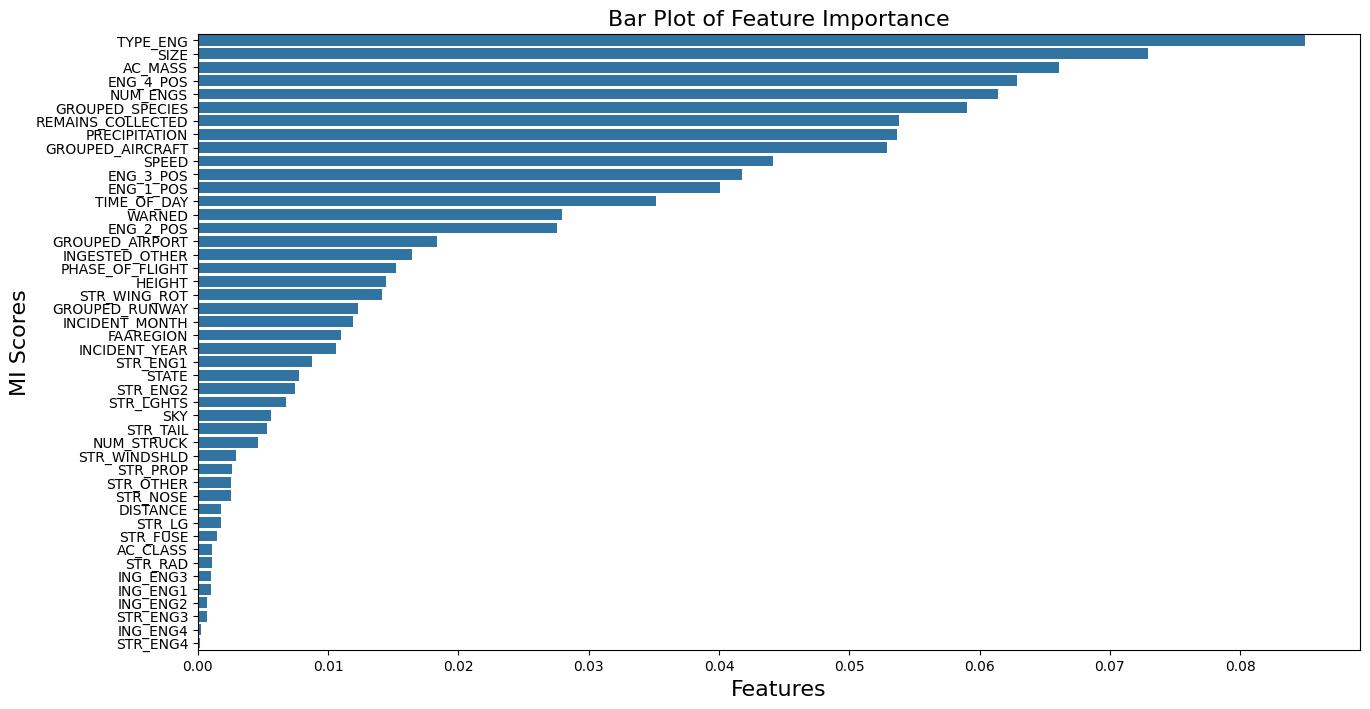

In [118]:
plt.figure(figsize=(15,8))
sns.barplot(y=sorted_features[1], x=sorted_features[0])

plt.title("Bar Plot of Feature Importance", fontsize=16)
plt.xlabel("Features", fontsize=16)
plt.ylabel("MI Scores", fontsize=16)


plt.show()

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
eval_df = pd.DataFrame()
def evaluate_model(encoding_method, imputation_method, model_name, accuracy_score, eval_df):

  # Add new row to the dataframe
  new_row = {'Encoding': encoding_method, 'Imputation': imputation_method, 'Model': model_name, 'Accuracy Score': accuracy_score}
  eval_df = eval_df.append(new_row, ignore_index=True)

  return eval_df

In [121]:
def base_model(encoding, imputation, data, df_num):
    global eval_df

    # Logistic Regression
    # Check normality of numerical data
    for col in df_num.columns:
      jb, p= stats.jarque_bera(df_num[col])
      if p<0.05:
        # Apply Yeo-Johnson transformation
        transformed_data = pd.Series(stats.yeojohnson(df_num[col])[0])
        df_num[col] = transformed_data

    data1 = data.copy()

    for i in df_num.columns:
      data1[i] = df_num[i]

    # Features (X) and Labels (y)
    X = data1.drop('INDICATED_DAMAGE', axis=1)  # Replace 'label_column_name' with your actual label column
    y = data1['INDICATED_DAMAGE']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the model
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    # Display accuracy score, confusion matrix, classification report

    print(f"LR Accuracy(Train): {accuracy_score(y_train, logreg.predict(X_train)):.2f}")
    print("\LR nConfusion Matrix(Train):\n", confusion_matrix(y_train, logreg.predict(X_train)))
    print(f"LR Accuracy(Test): {accuracy_score(y_test, logreg.predict(X_test)):.2f}")
    print("\nLR Confusion Matrix(Test):\n", confusion_matrix(y_test, logreg.predict(X_test)))
    print("LR Classification Report (Train):")
    print(classification_report(y_train, logreg.predict(X_train)))
    print("LR Classification Report (Test):")
    print(classification_report(y_test, logreg.predict(X_test)))

    pvalues = pd.Series(logreg.coef_[0], index=X_train.columns).sort_values(ascending=True)


    # Print the p-values
    print(pvalues)

    eval_df = evaluate_model(encoding , imputation, 'Logistic Regression', accuracy_score(y_test, logreg.predict(X_test)), eval_df)


    # KNN Classifier

    # Scale the data
    scaled_data = StandardScaler().fit_transform(data)

    # Features (X) and Labels (y)
    X = data.drop('INDICATED_DAMAGE', axis=1)  # Replace 'label_column_name' with your actual label column
    y = data['INDICATED_DAMAGE']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the model
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)

    # Display classification report
    print(f"KNN Accuracy(Train): {accuracy_score(y_train, knn.predict(X_train)):.2f}")
    print("\nKNN Confusion Matrix(Train):\n", confusion_matrix(y_train, knn.predict(X_train)))
    print(f"KNN Accuracy(Test): {accuracy_score(y_test, knn.predict(X_test)):.2f}")
    print("\nKNN Confusion Matrix(Test):\n", confusion_matrix(y_test, knn.predict(X_test)))
    print("KNN Classifier Classification Report (Train):")
    print(classification_report(y_train, knn.predict(X_train)))
    print("KNN Classifier Classification Report (Test):")
    print(classification_report(y_test, knn.predict(X_test)))

    eval_df = evaluate_model(encoding , imputation, 'KNN Classifier', accuracy_score(y_test,  knn.predict(X_test)), eval_df)

    # Decision Tree Classifier

    # Features (X) and Labels (y)
    X = data.drop('INDICATED_DAMAGE', axis=1)  # Replace 'label_column_name' with your actual label column
    y = data['INDICATED_DAMAGE']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the model
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)

    # Display classification report and feature importance
    print(f"DT Accuracy(Train): {accuracy_score(y_train, tree.predict(X_train)):.2f}")
    print("\nDT Confusion Matrix(Train):\n", confusion_matrix(y_train, tree.predict(X_train)))
    print(f"DT Accuracy(Test): {accuracy_score(y_test, tree.predict(X_test)):.2f}")
    print("\nDT Confusion Matrix(Test):\n", confusion_matrix(y_test, tree.predict(X_test)))
    print("DT Classification Report:")
    print(classification_report(y_train, tree.predict(X_train)))
    print("DT Classification Report:")
    print(classification_report(y_test, tree.predict(X_test)))
    print("Feature Importance:")
    feature_imp = pd.DataFrame(sorted(zip(tree.feature_importances_, X_train.columns), reverse=True))

    eval_df = evaluate_model(encoding , imputation, 'Decision Tree Classifier', accuracy_score(y_test, tree.predict(X_test)), eval_df)

    plt.figure(figsize=(15,8))
    sns.barplot(y=feature_imp[1], x=feature_imp[0])

    plt.title("Bar Plot of Feature Importance", fontsize=16)
    plt.xlabel("Importance", fontsize=16)
    plt.ylabel("Features", fontsize=16)


    plt.show()

    return eval_df



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR Accuracy(Train): 0.93
\LR nConfusion Matrix(Train):
 [[215032    228]
 [ 15418    370]]
LR Accuracy(Test): 0.93

LR Confusion Matrix(Test):
 [[53742    66]
 [ 3866    88]]
LR Classification Report (Train):
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    215260
           1       0.62      0.02      0.05     15788

    accuracy                           0.93    231048
   macro avg       0.78      0.51      0.51    231048
weighted avg       0.91      0.93      0.90    231048

LR Classification Report (Test):
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     53808
           1       0.57      0.02      0.04      3954

    accuracy                           0.93     57762
   macro avg       0.75      0.51      0.50     57762
weighted avg       0.91      0.93      0.90     57762

SIZE                -0.177048
AC_MASS             -0.154902
TYPE_ENG            -0.113619
REMAINS_COLLEC

<ipython-input-127-1f49ff9b1261>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append(new_row, ignore_index=True)


KNN Accuracy(Train): 0.94

KNN Confusion Matrix(Train):
 [[214224   1036]
 [ 13301   2487]]
KNN Accuracy(Test): 0.93

KNN Confusion Matrix(Test):
 [[53277   531]
 [ 3682   272]]
KNN Classifier Classification Report (Train):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    215260
           1       0.71      0.16      0.26     15788

    accuracy                           0.94    231048
   macro avg       0.82      0.58      0.61    231048
weighted avg       0.93      0.94      0.92    231048

KNN Classifier Classification Report (Test):
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     53808
           1       0.34      0.07      0.11      3954

    accuracy                           0.93     57762
   macro avg       0.64      0.53      0.54     57762
weighted avg       0.89      0.93      0.90     57762



<ipython-input-127-1f49ff9b1261>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append(new_row, ignore_index=True)


DT Accuracy(Train): 1.00

DT Confusion Matrix(Train):
 [[215256      4]
 [   193  15595]]
DT Accuracy(Test): 0.92

DT Confusion Matrix(Test):
 [[51432  2376]
 [ 2075  1879]]
DT Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    215260
           1       1.00      0.99      0.99     15788

    accuracy                           1.00    231048
   macro avg       1.00      0.99      1.00    231048
weighted avg       1.00      1.00      1.00    231048

DT Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     53808
           1       0.44      0.48      0.46      3954

    accuracy                           0.92     57762
   macro avg       0.70      0.72      0.71     57762
weighted avg       0.93      0.92      0.92     57762

Feature Importance:


<ipython-input-127-1f49ff9b1261>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append(new_row, ignore_index=True)


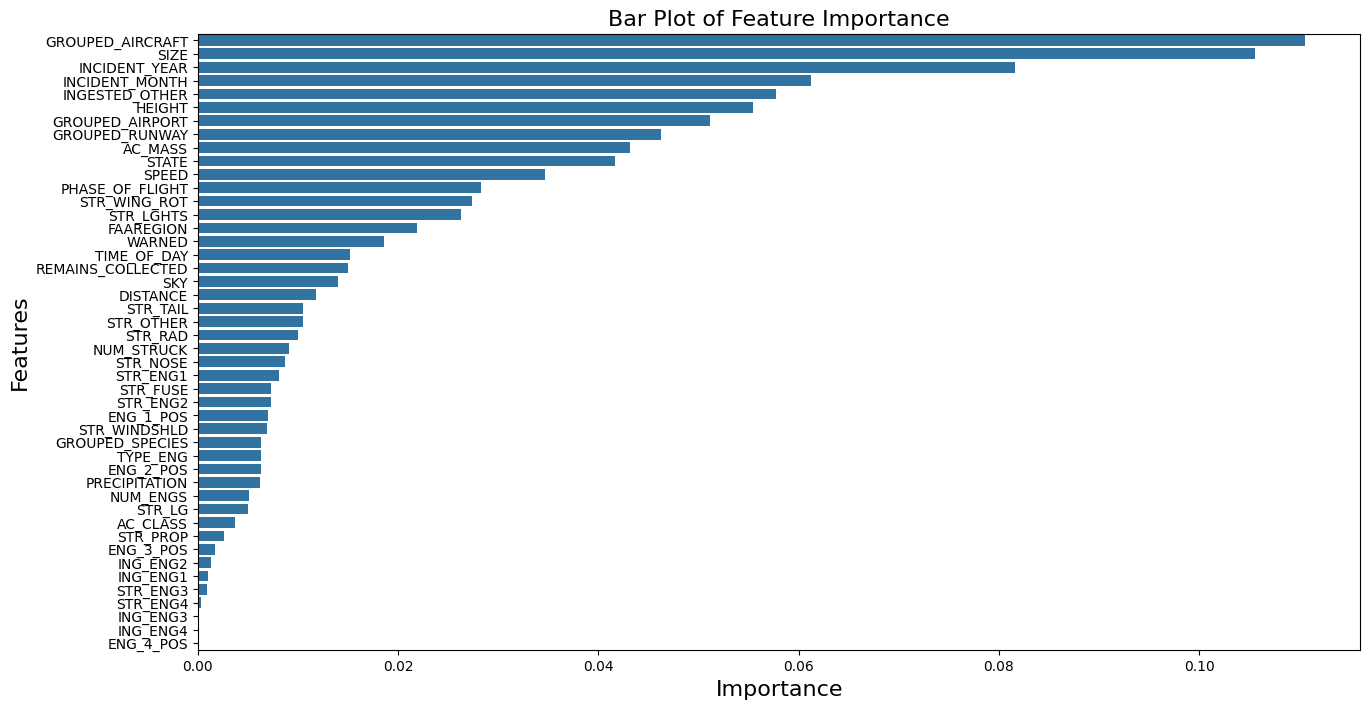

Encoding              Imputation                     Model  \
0  Label Encoding  Median-Mode imputation       Logistic Regression   
1  Label Encoding  Median-Mode imputation            KNN Classifier   
2  Label Encoding  Median-Mode imputation  Decision Tree Classifier   
3  Label Encoding  Median-Mode imputation       Logistic Regression   
4  Label Encoding  Median-Mode imputation            KNN Classifier   
5  Label Encoding  Median-Mode imputation  Decision Tree Classifier   
6  Label Encoding  Median-Mode imputation       Logistic Regression   
7  Label Encoding  Median-Mode imputation            KNN Classifier   
8  Label Encoding  Median-Mode imputation  Decision Tree Classifier   

   Accuracy Score  
0        0.931928  
1        0.927063  
2        0.921834  
3        0.931980  
4        0.927063  
5        0.922181  
6        0.931928  
7        0.927063  
8        0.922942

In [132]:
base_model('Label Encoding','Median-Mode imputation',df1_mm,df1_mm_num)

***Treatment 2: Imputation done using IterativeImputer***

In [122]:
ii = IterativeImputer(estimator=DecisionTreeRegressor(),random_state=10)
df_ii = df1.drop('DAMAGE_LEVEL', axis = 1)
df_ii.head()

INCIDENT_MONTH  INCIDENT_YEAR  AC_MASS  NUM_ENGS  ENG_1_POS  ENG_2_POS  \
0               6           1996      4.0       2.0        1.0        1.0   
1               6           1996      4.0       2.0        1.0        1.0   
2               7           1996      4.0       2.0        1.0        1.0   
3               7           1996      4.0       2.0        1.0        1.0   
4               7           1996      4.0       2.0        1.0        1.0   

   ENG_3_POS  ENG_4_POS  HEIGHT  SPEED  DISTANCE  TIME_OF_DAY  STATE  \
0        NaN        NaN     0.0    NaN       0.0          NaN    7.0   
1        NaN        NaN     0.0    NaN       0.0          NaN    8.0   
2        NaN        NaN     0.0    NaN       0.0          NaN   37.0   
3        NaN        NaN  1000.0    NaN       NaN          NaN   10.0   
4        NaN        NaN  5000.0    NaN       NaN          NaN   44.0   

   FAAREGION  AC_CLASS  TYPE_ENG  PHASE_OF_FLIGHT  SKY  PRECIPITATION  \
0        8.0       0.0       3.0              9.0  NaN            NaN   
1        5.0       0.0       3.0              9.0  NaN            NaN   
2        1.0       0.0       3.0              9.0  NaN            NaN   
3        2.0       0.0       3.0              0.0  NaN            NaN   
4        2.0       0.0       3.0              2.0  NaN            NaN   

   INGESTED_OTHER  INDICATED_DAMAGE  STR_RAD  STR_WINDSHLD  STR_NOSE  \
0               0                 0        0             0         1   
1               0                 0        0             0         0   
2               0                 0        0             0         0   
3               0                 0        0             0         0   
4               1                 1        0             0         0   

   STR_ENG1  ING_ENG1  STR_ENG2  ING_ENG2  STR_ENG3  ING_ENG3  STR_ENG4  \
0         0         0         0         0         0         0         0   
1         1         0         0         0         0         0         0   
2         0         0         1         0         0         0         0   
3         0         0         0         0         0         0         0   
4         1         0         0         0         0         0         0   

   ING_ENG4  STR_PROP  STR_WING_ROT  STR_FUSE  STR_LG  STR_TAIL  STR_LGHTS  \
0         0         0             0         0       0         0          0   
1         0         0             0         0       0         0          0   
2         0         0             0         0       0         0          0   
3         0         0             0         1       0         0          0   
4         0         0             0         1       0         0          0   

   STR_OTHER  REMAINS_COLLECTED  WARNED  NUM_STRUCK  SIZE  GROUPED_AIRPORT  \
0          0                  0       1         0.0   1.0             1190   
1          0                  0       1         0.0   1.0              325   
2          0                  0       1         0.0   1.0              393   
3          0                  0       1         0.0   1.0             1451   
4          0                  0       1         0.0   1.0              716   

   GROUPED_RUNWAY  GROUPED_AIRCRAFT  GROUPED_SPECIES  
0             NaN                39              456  
1             NaN                39              456  
2             NaN                53              456  
3             NaN                 5              456  
4             NaN                 5              456

In [123]:
df_ii = ii.fit_transform(df_ii)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [124]:
df_ii = pd.DataFrame(df_ii, columns = df1.drop('DAMAGE_LEVEL', axis = 1).columns)

In [125]:
df_ii.isnull().sum()

INCIDENT_MONTH       0
INCIDENT_YEAR        0
AC_MASS              0
NUM_ENGS             0
ENG_1_POS            0
ENG_2_POS            0
ENG_3_POS            0
ENG_4_POS            0
HEIGHT               0
SPEED                0
DISTANCE             0
TIME_OF_DAY          0
STATE                0
FAAREGION            0
AC_CLASS             0
TYPE_ENG             0
PHASE_OF_FLIGHT      0
SKY                  0
PRECIPITATION        0
INGESTED_OTHER       0
INDICATED_DAMAGE     0
STR_RAD              0
STR_WINDSHLD         0
STR_NOSE             0
STR_ENG1             0
ING_ENG1             0
STR_ENG2             0
ING_ENG2             0
STR_ENG3             0
ING_ENG3             0
STR_ENG4             0
ING_ENG4             0
STR_PROP             0
STR_WING_ROT         0
STR_FUSE             0
STR_LG               0
STR_TAIL             0
STR_LGHTS            0
STR_OTHER            0
REMAINS_COLLECTED    0
WARNED               0
NUM_STRUCK           0
SIZE                 0
GROUPED_AIR

<ipython-input-207-b4df77a6b0b9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[col] = transformed_data
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR Accuracy(Train): 0.93
\LR nConfusion Matrix(Train):
 [[215254      6]
 [ 15777     11]]
LR Accuracy(Test): 0.93

LR Confusion Matrix(Test):
 [[53807     1]
 [ 3952     2]]
LR Classification Report (Train):
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96    215260
         1.0       0.65      0.00      0.00     15788

    accuracy                           0.93    231048
   macro avg       0.79      0.50      0.48    231048
weighted avg       0.91      0.93      0.90    231048

LR Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     53808
         1.0       0.67      0.00      0.00      3954

    accuracy                           0.93     57762
   macro avg       0.80      0.50      0.48     57762
weighted avg       0.91      0.93      0.90     57762

SIZE                -0.128252
AC_MASS             -0.044789
FAAREGION           -0.025394
REMAINS_COLLEC

<ipython-input-206-1f49ff9b1261>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append(new_row, ignore_index=True)


KNN Accuracy(Train): 0.94

KNN Confusion Matrix(Train):
 [[214304    956]
 [ 13458   2330]]
KNN Accuracy(Test): 0.93

KNN Confusion Matrix(Test):
 [[53265   543]
 [ 3697   257]]
KNN Classifier Classification Report (Train):
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97    215260
         1.0       0.71      0.15      0.24     15788

    accuracy                           0.94    231048
   macro avg       0.82      0.57      0.61    231048
weighted avg       0.93      0.94      0.92    231048

KNN Classifier Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     53808
         1.0       0.32      0.06      0.11      3954

    accuracy                           0.93     57762
   macro avg       0.63      0.53      0.53     57762
weighted avg       0.89      0.93      0.90     57762



<ipython-input-206-1f49ff9b1261>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append(new_row, ignore_index=True)


DT Accuracy(Train): 1.00

DT Confusion Matrix(Train):
 [[215260      0]
 [    13  15775]]
DT Accuracy(Test): 0.92

DT Confusion Matrix(Test):
 [[51392  2416]
 [ 2033  1921]]
DT Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    215260
         1.0       1.00      1.00      1.00     15788

    accuracy                           1.00    231048
   macro avg       1.00      1.00      1.00    231048
weighted avg       1.00      1.00      1.00    231048

DT Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     53808
         1.0       0.44      0.49      0.46      3954

    accuracy                           0.92     57762
   macro avg       0.70      0.72      0.71     57762
weighted avg       0.93      0.92      0.92     57762

Feature Importance:


<ipython-input-206-1f49ff9b1261>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append(new_row, ignore_index=True)


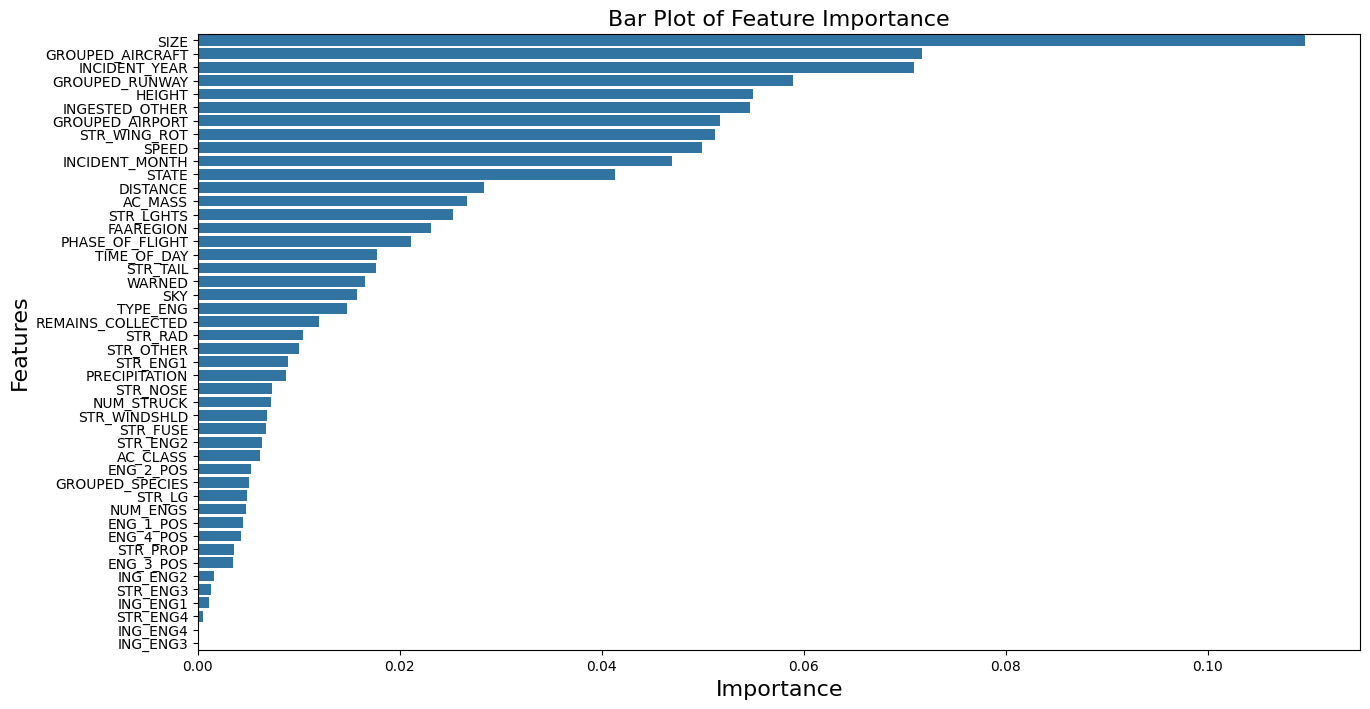

Encoding              Imputation                     Model  \
0  Label Encoding  Median-Mode imputation       Logistic Regression   
1  Label Encoding  Median-Mode imputation            KNN Classifier   
2  Label Encoding  Median-Mode imputation  Decision Tree Classifier   
3  Label Encoding    Iterative imputation       Logistic Regression   
4  Label Encoding    Iterative imputation            KNN Classifier   
5  Label Encoding    Iterative imputation  Decision Tree Classifier   

   Accuracy Score  
0        0.931980  
1        0.927063  
2        0.922233  
3        0.931564  
4        0.926595  
5        0.922977

In [209]:
base_model('Label Encoding','Iterative imputation',df_ii,df_ii[['HEIGHT', 'SPEED', 'DISTANCE']])

***Treatment 3: Imputation done using KNNImputer***

In [180]:
df_knn = df1.drop('DAMAGE_LEVEL', axis = 1)
df_knn.head()

INCIDENT_MONTH  INCIDENT_YEAR  AC_MASS  NUM_ENGS  ENG_1_POS  ENG_2_POS  \
0               6           1996      4.0       2.0        1.0        1.0   
1               6           1996      4.0       2.0        1.0        1.0   
2               7           1996      4.0       2.0        1.0        1.0   
3               7           1996      4.0       2.0        1.0        1.0   
4               7           1996      4.0       2.0        1.0        1.0   

   ENG_3_POS  ENG_4_POS  HEIGHT  SPEED  DISTANCE  TIME_OF_DAY  STATE  \
0        NaN        NaN     0.0    NaN       0.0          NaN    7.0   
1        NaN        NaN     0.0    NaN       0.0          NaN    8.0   
2        NaN        NaN     0.0    NaN       0.0          NaN   37.0   
3        NaN        NaN  1000.0    NaN       NaN          NaN   10.0   
4        NaN        NaN  5000.0    NaN       NaN          NaN   44.0   

   FAAREGION  AC_CLASS  TYPE_ENG  PHASE_OF_FLIGHT  SKY  PRECIPITATION  \
0        8.0       0.0       3.0              9.0  NaN            NaN   
1        5.0       0.0       3.0              9.0  NaN            NaN   
2        1.0       0.0       3.0              9.0  NaN            NaN   
3        2.0       0.0       3.0              0.0  NaN            NaN   
4        2.0       0.0       3.0              2.0  NaN            NaN   

   INGESTED_OTHER  INDICATED_DAMAGE  STR_RAD  STR_WINDSHLD  STR_NOSE  \
0               0                 0        0             0         1   
1               0                 0        0             0         0   
2               0                 0        0             0         0   
3               0                 0        0             0         0   
4               1                 1        0             0         0   

   STR_ENG1  ING_ENG1  STR_ENG2  ING_ENG2  STR_ENG3  ING_ENG3  STR_ENG4  \
0         0         0         0         0         0         0         0   
1         1         0         0         0         0         0         0   
2         0         0         1         0         0         0         0   
3         0         0         0         0         0         0         0   
4         1         0         0         0         0         0         0   

   ING_ENG4  STR_PROP  STR_WING_ROT  STR_FUSE  STR_LG  STR_TAIL  STR_LGHTS  \
0         0         0             0         0       0         0          0   
1         0         0             0         0       0         0          0   
2         0         0             0         0       0         0          0   
3         0         0             0         1       0         0          0   
4         0         0             0         1       0         0          0   

   STR_OTHER  REMAINS_COLLECTED  WARNED  NUM_STRUCK  SIZE  GROUPED_AIRPORT  \
0          0                  0       1         0.0   1.0             1190   
1          0                  0       1         0.0   1.0              325   
2          0                  0       1         0.0   1.0              393   
3          0                  0       1         0.0   1.0             1451   
4          0                  0       1         0.0   1.0              716   

   GROUPED_RUNWAY  GROUPED_AIRCRAFT  GROUPED_SPECIES  
0             NaN                39              456  
1             NaN                39              456  
2             NaN                53              456  
3             NaN                 5              456  
4             NaN                 5              456

In [ ]:
knn = KNNImputer(weights='distance')
df_knn= knn.fit_transform(df_knn)

In [191]:
df_knn = pd.DataFrame(df_knn, columns = df1.drop('DAMAGE_LEVEL', axis = 1).columns)
df_knn.isnull().sum()

INCIDENT_MONTH       0
INCIDENT_YEAR        0
AC_MASS              0
NUM_ENGS             0
ENG_1_POS            0
ENG_2_POS            0
ENG_3_POS            0
ENG_4_POS            0
HEIGHT               0
SPEED                0
DISTANCE             0
TIME_OF_DAY          0
STATE                0
FAAREGION            0
AC_CLASS             0
TYPE_ENG             0
PHASE_OF_FLIGHT      0
SKY                  0
PRECIPITATION        0
INGESTED_OTHER       0
INDICATED_DAMAGE     0
STR_RAD              0
STR_WINDSHLD         0
STR_NOSE             0
STR_ENG1             0
ING_ENG1             0
STR_ENG2             0
ING_ENG2             0
STR_ENG3             0
ING_ENG3             0
STR_ENG4             0
ING_ENG4             0
STR_PROP             0
STR_WING_ROT         0
STR_FUSE             0
STR_LG               0
STR_TAIL             0
STR_LGHTS            0
STR_OTHER            0
REMAINS_COLLECTED    0
WARNED               0
NUM_STRUCK           0
SIZE                 0
GROUPED_AIR

<ipython-input-207-b4df77a6b0b9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[col] = transformed_data
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR Accuracy(Train): 0.93
\LR nConfusion Matrix(Train):
 [[215107    153]
 [ 15561    227]]
LR Accuracy(Test): 0.93

LR Confusion Matrix(Test):
 [[53765    43]
 [ 3885    69]]
LR Classification Report (Train):
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96    215260
         1.0       0.60      0.01      0.03     15788

    accuracy                           0.93    231048
   macro avg       0.76      0.51      0.50    231048
weighted avg       0.91      0.93      0.90    231048

LR Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     53808
         1.0       0.62      0.02      0.03      3954

    accuracy                           0.93     57762
   macro avg       0.77      0.51      0.50     57762
weighted avg       0.91      0.93      0.90     57762

SIZE                -0.187276
AC_MASS             -0.113489
TYPE_ENG            -0.093480
SPEED         

<ipython-input-206-1f49ff9b1261>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append(new_row, ignore_index=True)


KNN Accuracy(Train): 0.94

KNN Confusion Matrix(Train):
 [[214265    995]
 [ 13636   2152]]
KNN Accuracy(Test): 0.93

KNN Confusion Matrix(Test):
 [[53327   481]
 [ 3733   221]]
KNN Classifier Classification Report (Train):
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97    215260
         1.0       0.68      0.14      0.23     15788

    accuracy                           0.94    231048
   macro avg       0.81      0.57      0.60    231048
weighted avg       0.92      0.94      0.92    231048

KNN Classifier Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     53808
         1.0       0.31      0.06      0.09      3954

    accuracy                           0.93     57762
   macro avg       0.62      0.52      0.53     57762
weighted avg       0.89      0.93      0.90     57762



<ipython-input-206-1f49ff9b1261>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append(new_row, ignore_index=True)


DT Accuracy(Train): 1.00

DT Confusion Matrix(Train):
 [[215260      0]
 [     0  15788]]
DT Accuracy(Test): 0.92

DT Confusion Matrix(Test):
 [[51359  2449]
 [ 2081  1873]]
DT Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    215260
         1.0       1.00      1.00      1.00     15788

    accuracy                           1.00    231048
   macro avg       1.00      1.00      1.00    231048
weighted avg       1.00      1.00      1.00    231048

DT Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96     53808
         1.0       0.43      0.47      0.45      3954

    accuracy                           0.92     57762
   macro avg       0.70      0.71      0.71     57762
weighted avg       0.92      0.92      0.92     57762

Feature Importance:


<ipython-input-206-1f49ff9b1261>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append(new_row, ignore_index=True)


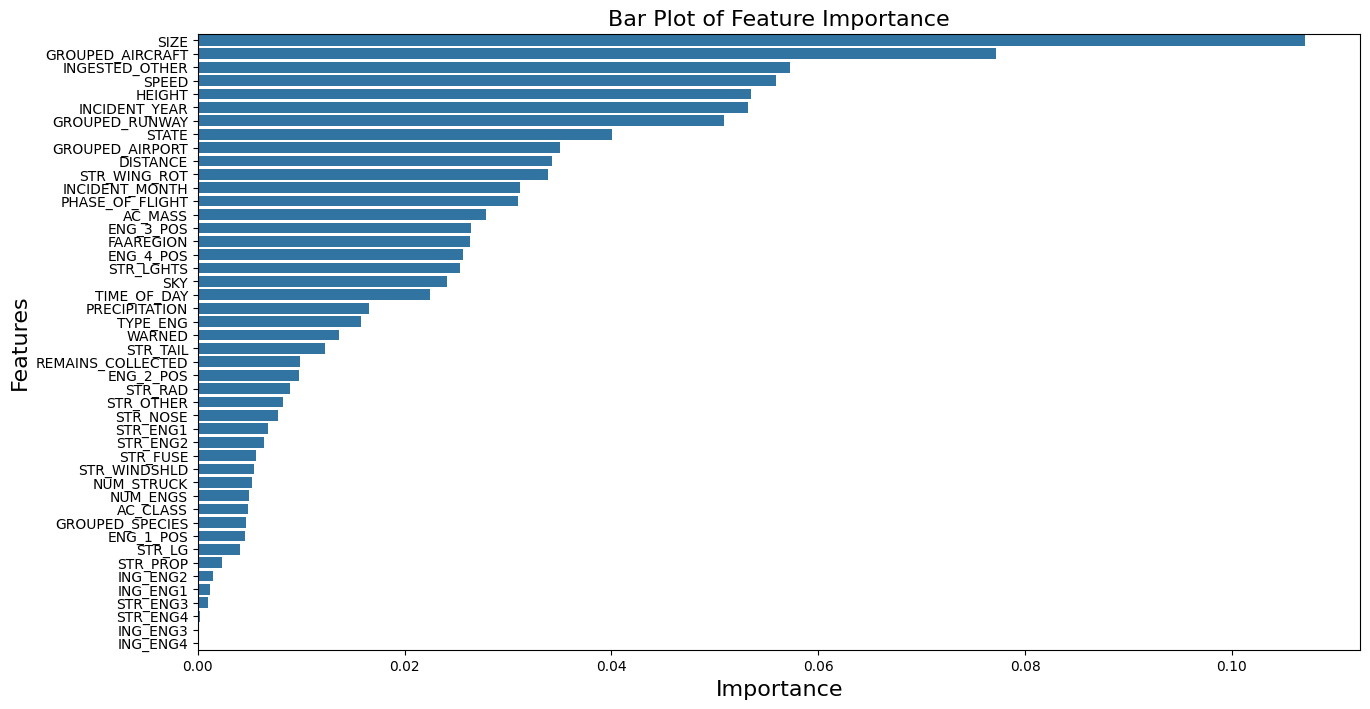

Encoding              Imputation                     Model  \
0  Label Encoding  Median-Mode imputation       Logistic Regression   
1  Label Encoding  Median-Mode imputation            KNN Classifier   
2  Label Encoding  Median-Mode imputation  Decision Tree Classifier   
3  Label Encoding    Iterative imputation       Logistic Regression   
4  Label Encoding    Iterative imputation            KNN Classifier   
5  Label Encoding    Iterative imputation  Decision Tree Classifier   
6  Label Encoding          KNN imputation       Logistic Regression   
7  Label Encoding          KNN imputation            KNN Classifier   
8  Label Encoding          KNN imputation  Decision Tree Classifier   

   Accuracy Score  
0        0.931980  
1        0.927063  
2        0.922233  
3        0.931564  
4        0.926595  
5        0.922977  
6        0.931997  
7        0.927045  
8        0.921575

In [210]:
base_model('Label Encoding','KNN imputation',df_knn,df_knn[['HEIGHT', 'SPEED', 'DISTANCE']])

In [212]:
def weighted_model(encoding, imputation, data, df_num):
    global eval_df

    # Logistic Regression
    # Check normality of numerical data
    for col in df_num.columns:
      jb, p= stats.jarque_bera(df_num[col])
      if p<0.05:
        # Apply Yeo-Johnson transformation
        transformed_data = pd.Series(stats.yeojohnson(df_num[col])[0])
        df_num[col] = transformed_data

    data1 = data.copy()

    for i in df_num.columns:
      data1[i] = df_num[i]

    # Features (X) and Labels (y)
    X = data1.drop('INDICATED_DAMAGE', axis=1)  # Replace 'label_column_name' with your actual label column
    y = data1['INDICATED_DAMAGE']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the model
    logreg = LogisticRegression(class_weight='balanced')
    logreg.fit(X_train, y_train)

    # Display accuracy score, confusion matrix, classification report

    print(f"LR Accuracy(Train): {accuracy_score(y_train, logreg.predict(X_train)):.2f}")
    print("\LR nConfusion Matrix(Train):\n", confusion_matrix(y_train, logreg.predict(X_train)))
    print(f"LR Accuracy(Test): {accuracy_score(y_test, logreg.predict(X_test)):.2f}")
    print("\nLR Confusion Matrix(Test):\n", confusion_matrix(y_test, logreg.predict(X_test)))
    print("LR Classification Report (Train):")
    print(classification_report(y_train, logreg.predict(X_train)))
    print("LR Classification Report (Test):")
    print(classification_report(y_test, logreg.predict(X_test)))

    pvalues = pd.Series(logreg.coef_[0], index=X_train.columns).sort_values(ascending=True)


    # Print the p-values
    print(pvalues)

    eval_df = evaluate_model(encoding , imputation, 'Weighted Logistic Regression', accuracy_score(y_test, logreg.predict(X_test)), eval_df)


    # KNN Classifier

    # Scale the data
    scaled_data = StandardScaler().fit_transform(data)

    # Features (X) and Labels (y)
    X = data.drop('INDICATED_DAMAGE', axis=1)  # Replace 'label_column_name' with your actual label column
    y = data['INDICATED_DAMAGE']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the model
    knn = KNeighborsClassifier(weights = 'distance')
    knn.fit(X_train, y_train)

    # Display classification report
    print(f"KNN Accuracy(Train): {accuracy_score(y_train, knn.predict(X_train)):.2f}")
    print("\nKNN Confusion Matrix(Train):\n", confusion_matrix(y_train, knn.predict(X_train)))
    print(f"KNN Accuracy(Test): {accuracy_score(y_test, knn.predict(X_test)):.2f}")
    print("\nKNN Confusion Matrix(Test):\n", confusion_matrix(y_test, knn.predict(X_test)))
    print("KNN Classifier Classification Report (Train):")
    print(classification_report(y_train, knn.predict(X_train)))
    print("KNN Classifier Classification Report (Test):")
    print(classification_report(y_test, knn.predict(X_test)))

    eval_df = evaluate_model(encoding , imputation, 'Weighted KNN Classifier', accuracy_score(y_test,  knn.predict(X_test)), eval_df)

    # Decision Tree Classifier

    # Features (X) and Labels (y)
    X = data.drop('INDICATED_DAMAGE', axis=1)  # Replace 'label_column_name' with your actual label column
    y = data['INDICATED_DAMAGE']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the model
    tree = DecisionTreeClassifier(class_weight='balanced')
    tree.fit(X_train, y_train)

    # Display classification report and feature importance
    print(f"DT Accuracy(Train): {accuracy_score(y_train, tree.predict(X_train)):.2f}")
    print("\nDT Confusion Matrix(Train):\n", confusion_matrix(y_train, tree.predict(X_train)))
    print(f"DT Accuracy(Test): {accuracy_score(y_test, tree.predict(X_test)):.2f}")
    print("\nDT Confusion Matrix(Test):\n", confusion_matrix(y_test, tree.predict(X_test)))
    print("DT Classification Report:")
    print(classification_report(y_train, tree.predict(X_train)))
    print("DT Classification Report:")
    print(classification_report(y_test, tree.predict(X_test)))
    print("Feature Importance:")
    feature_imp = pd.DataFrame(sorted(zip(tree.feature_importances_, X_train.columns), reverse=True))

    eval_df = evaluate_model(encoding , imputation, 'Weighted Decision Tree Classifier', accuracy_score(y_test, tree.predict(X_test)), eval_df)

    plt.figure(figsize=(15,8))
    sns.barplot(y=feature_imp[1], x=feature_imp[0])

    plt.title("Bar Plot of Feature Importance", fontsize=16)
    plt.xlabel("Importance", fontsize=16)
    plt.ylabel("Features", fontsize=16)


    plt.show()

    return eval_df



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR Accuracy(Train): 0.68
\LR nConfusion Matrix(Train):
 [[147281  67979]
 [  4897  10891]]
LR Accuracy(Test): 0.68

LR Confusion Matrix(Test):
 [[36837 16971]
 [ 1238  2716]]
LR Classification Report (Train):
              precision    recall  f1-score   support

           0       0.97      0.68      0.80    215260
           1       0.14      0.69      0.23     15788

    accuracy                           0.68    231048
   macro avg       0.55      0.69      0.52    231048
weighted avg       0.91      0.68      0.76    231048

LR Classification Report (Test):
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     53808
           1       0.14      0.69      0.23      3954

    accuracy                           0.68     57762
   macro avg       0.55      0.69      0.52     57762
weighted avg       0.91      0.68      0.76     57762

SIZE                -1.690894e-01
AC_MASS             -1.553147e-01
TYPE_ENG            -1.152750e-01
RE

<ipython-input-206-1f49ff9b1261>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append(new_row, ignore_index=True)


KNN Accuracy(Train): 1.00

KNN Confusion Matrix(Train):
 [[215256      4]
 [   193  15595]]
KNN Accuracy(Test): 0.93

KNN Confusion Matrix(Test):
 [[53116   692]
 [ 3625   329]]
KNN Classifier Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    215260
           1       1.00      0.99      0.99     15788

    accuracy                           1.00    231048
   macro avg       1.00      0.99      1.00    231048
weighted avg       1.00      1.00      1.00    231048

KNN Classifier Classification Report (Test):
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     53808
           1       0.32      0.08      0.13      3954

    accuracy                           0.93     57762
   macro avg       0.63      0.54      0.55     57762
weighted avg       0.89      0.93      0.90     57762



<ipython-input-206-1f49ff9b1261>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append(new_row, ignore_index=True)


DT Accuracy(Train): 1.00

DT Confusion Matrix(Train):
 [[214905    355]
 [     0  15788]]
DT Accuracy(Test): 0.92

DT Confusion Matrix(Test):
 [[51566  2242]
 [ 2266  1688]]
DT Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    215260
           1       0.98      1.00      0.99     15788

    accuracy                           1.00    231048
   macro avg       0.99      1.00      0.99    231048
weighted avg       1.00      1.00      1.00    231048

DT Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     53808
           1       0.43      0.43      0.43      3954

    accuracy                           0.92     57762
   macro avg       0.69      0.69      0.69     57762
weighted avg       0.92      0.92      0.92     57762

Feature Importance:


<ipython-input-206-1f49ff9b1261>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append(new_row, ignore_index=True)


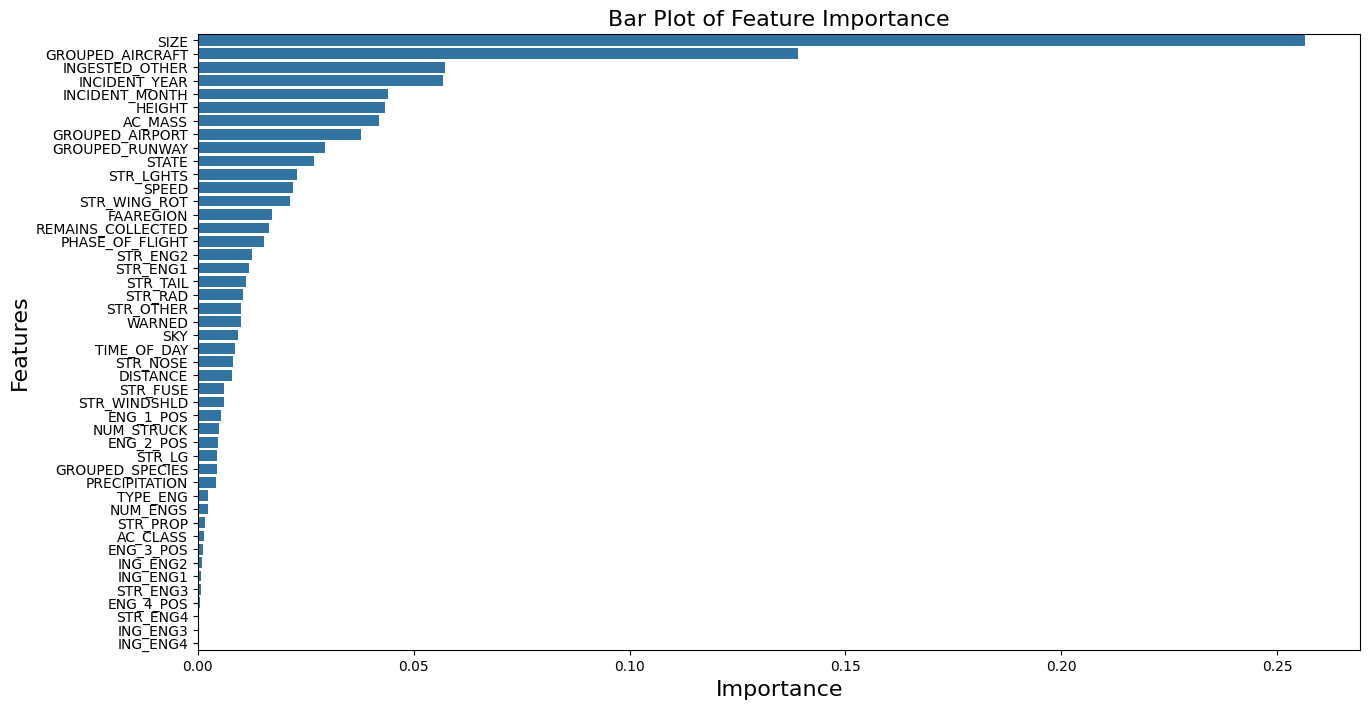

Encoding              Imputation                              Model  \
0   Label Encoding  Median-Mode imputation                Logistic Regression   
1   Label Encoding  Median-Mode imputation                     KNN Classifier   
2   Label Encoding  Median-Mode imputation           Decision Tree Classifier   
3   Label Encoding    Iterative imputation                Logistic Regression   
4   Label Encoding    Iterative imputation                     KNN Classifier   
5   Label Encoding    Iterative imputation           Decision Tree Classifier   
6   Label Encoding          KNN imputation                Logistic Regression   
7   Label Encoding          KNN imputation                     KNN Classifier   
8   Label Encoding          KNN imputation           Decision Tree Classifier   
9   Label Encoding  Median-Mode imputation       Weighted Logistic Regression   
10  Label Encoding  Median-Mode imputation            Weighted KNN Classifier   
11  Label Encoding  Median-Mode imputation  Weighted Decision Tree Classifier   

    Accuracy Score  
0         0.931980  
1         0.927063  
2         0.922233  
3         0.931564  
4         0.926595  
5         0.922977  
6         0.931997  
7         0.927045  
8         0.921575  
9         0.684758  
10        0.925262  
11        0.921956

In [213]:
weighted_model('Label Encoding','Median-Mode imputation',df1_mm,df1_mm_num)

<ipython-input-212-f5db4aa4965a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[col] = transformed_data
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR Accuracy(Train): 0.65
\LR nConfusion Matrix(Train):
 [[139211  76049]
 [  4904  10884]]
LR Accuracy(Test): 0.65

LR Confusion Matrix(Test):
 [[34646 19162]
 [ 1159  2795]]
LR Classification Report (Train):
              precision    recall  f1-score   support

         0.0       0.97      0.65      0.77    215260
         1.0       0.13      0.69      0.21     15788

    accuracy                           0.65    231048
   macro avg       0.55      0.67      0.49    231048
weighted avg       0.91      0.65      0.74    231048

LR Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.97      0.64      0.77     53808
         1.0       0.13      0.71      0.22      3954

    accuracy                           0.65     57762
   macro avg       0.55      0.68      0.49     57762
weighted avg       0.91      0.65      0.74     57762

SIZE                -0.135362
AC_MASS             -0.037972
REMAINS_COLLECTED   -0.031396
FAAREGION     

<ipython-input-206-1f49ff9b1261>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append(new_row, ignore_index=True)


KNN Accuracy(Train): 1.00

KNN Confusion Matrix(Train):
 [[215260      0]
 [    13  15775]]
KNN Accuracy(Test): 0.93

KNN Confusion Matrix(Test):
 [[53103   705]
 [ 3612   342]]
KNN Classifier Classification Report (Train):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    215260
         1.0       1.00      1.00      1.00     15788

    accuracy                           1.00    231048
   macro avg       1.00      1.00      1.00    231048
weighted avg       1.00      1.00      1.00    231048

KNN Classifier Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     53808
         1.0       0.33      0.09      0.14      3954

    accuracy                           0.93     57762
   macro avg       0.63      0.54      0.55     57762
weighted avg       0.89      0.93      0.90     57762



<ipython-input-206-1f49ff9b1261>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append(new_row, ignore_index=True)


DT Accuracy(Train): 1.00

DT Confusion Matrix(Train):
 [[215242     18]
 [     0  15788]]
DT Accuracy(Test): 0.92

DT Confusion Matrix(Test):
 [[51679  2129]
 [ 2247  1707]]
DT Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    215260
         1.0       1.00      1.00      1.00     15788

    accuracy                           1.00    231048
   macro avg       1.00      1.00      1.00    231048
weighted avg       1.00      1.00      1.00    231048

DT Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     53808
         1.0       0.44      0.43      0.44      3954

    accuracy                           0.92     57762
   macro avg       0.70      0.70      0.70     57762
weighted avg       0.92      0.92      0.92     57762

Feature Importance:


<ipython-input-206-1f49ff9b1261>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append(new_row, ignore_index=True)


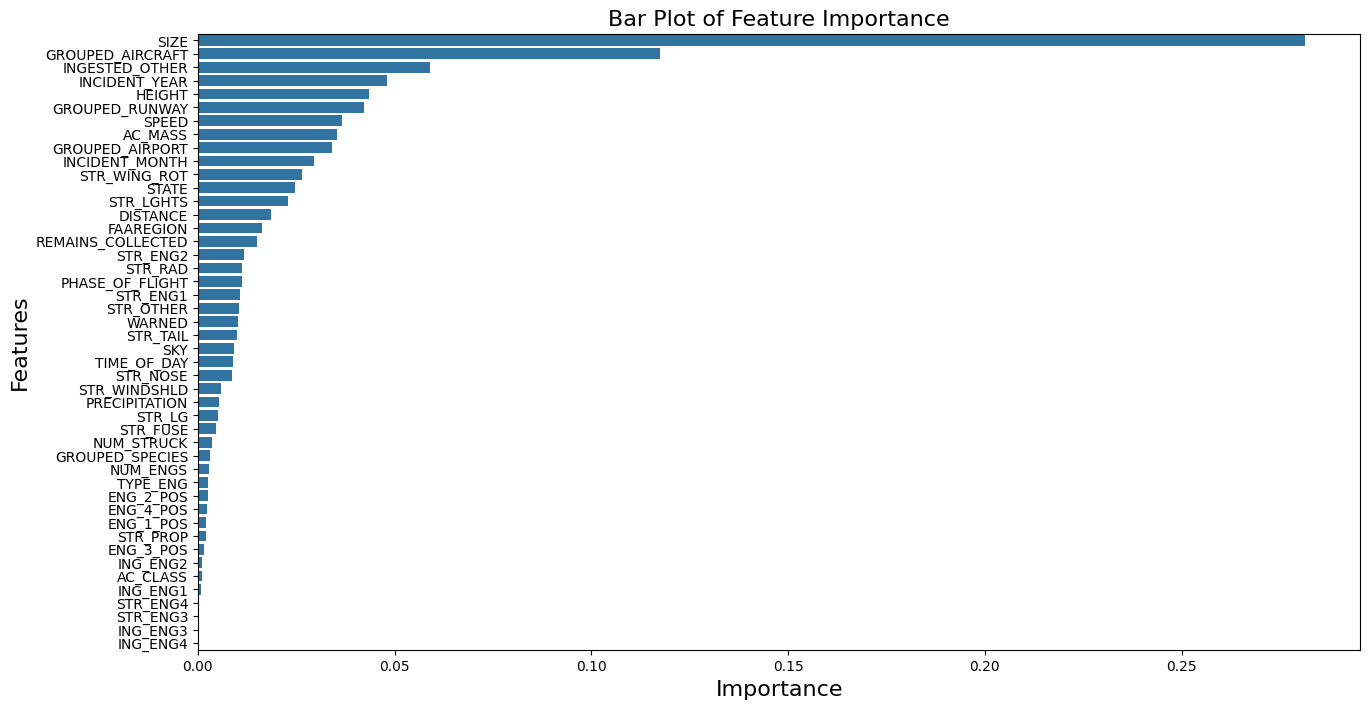

Encoding              Imputation                              Model  \
0   Label Encoding  Median-Mode imputation                Logistic Regression   
1   Label Encoding  Median-Mode imputation                     KNN Classifier   
2   Label Encoding  Median-Mode imputation           Decision Tree Classifier   
3   Label Encoding    Iterative imputation                Logistic Regression   
4   Label Encoding    Iterative imputation                     KNN Classifier   
5   Label Encoding    Iterative imputation           Decision Tree Classifier   
6   Label Encoding          KNN imputation                Logistic Regression   
7   Label Encoding          KNN imputation                     KNN Classifier   
8   Label Encoding          KNN imputation           Decision Tree Classifier   
9   Label Encoding  Median-Mode imputation       Weighted Logistic Regression   
10  Label Encoding  Median-Mode imputation            Weighted KNN Classifier   
11  Label Encoding  Median-Mode imputation  Weighted Decision Tree Classifier   
12  Label Encoding    Iterative imputation       Weighted Logistic Regression   
13  Label Encoding    Iterative imputation            Weighted KNN Classifier   
14  Label Encoding    Iterative imputation  Weighted Decision Tree Classifier   

    Accuracy Score  
0         0.931980  
1         0.927063  
2         0.922233  
3         0.931564  
4         0.926595  
5         0.922977  
6         0.931997  
7         0.927045  
8         0.921575  
9         0.684758  
10        0.925262  
11        0.921956  
12        0.648194  
13        0.925262  
14        0.924241

In [214]:
weighted_model('Label Encoding','Iterative imputation',df_ii,df_ii[['HEIGHT', 'SPEED', 'DISTANCE']])

<ipython-input-212-f5db4aa4965a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[col] = transformed_data
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR Accuracy(Train): 0.66
\LR nConfusion Matrix(Train):
 [[140779  74481]
 [  4946  10842]]
LR Accuracy(Test): 0.66

LR Confusion Matrix(Test):
 [[35105 18703]
 [ 1215  2739]]
LR Classification Report (Train):
              precision    recall  f1-score   support

         0.0       0.97      0.65      0.78    215260
         1.0       0.13      0.69      0.21     15788

    accuracy                           0.66    231048
   macro avg       0.55      0.67      0.50    231048
weighted avg       0.91      0.66      0.74    231048

LR Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.97      0.65      0.78     53808
         1.0       0.13      0.69      0.22      3954

    accuracy                           0.66     57762
   macro avg       0.55      0.67      0.50     57762
weighted avg       0.91      0.66      0.74     57762

SIZE                -0.185330
AC_MASS             -0.109335
TYPE_ENG            -0.094391
SPEED         

<ipython-input-206-1f49ff9b1261>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append(new_row, ignore_index=True)


KNN Accuracy(Train): 1.00

KNN Confusion Matrix(Train):
 [[215260      0]
 [     0  15788]]
KNN Accuracy(Test): 0.93

KNN Confusion Matrix(Test):
 [[53162   646]
 [ 3654   300]]
KNN Classifier Classification Report (Train):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    215260
         1.0       1.00      1.00      1.00     15788

    accuracy                           1.00    231048
   macro avg       1.00      1.00      1.00    231048
weighted avg       1.00      1.00      1.00    231048

KNN Classifier Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     53808
         1.0       0.32      0.08      0.12      3954

    accuracy                           0.93     57762
   macro avg       0.63      0.53      0.54     57762
weighted avg       0.89      0.93      0.90     57762



<ipython-input-206-1f49ff9b1261>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append(new_row, ignore_index=True)


DT Accuracy(Train): 1.00

DT Confusion Matrix(Train):
 [[215260      0]
 [     0  15788]]
DT Accuracy(Test): 0.92

DT Confusion Matrix(Test):
 [[51594  2214]
 [ 2282  1672]]
DT Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    215260
         1.0       1.00      1.00      1.00     15788

    accuracy                           1.00    231048
   macro avg       1.00      1.00      1.00    231048
weighted avg       1.00      1.00      1.00    231048

DT Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     53808
         1.0       0.43      0.42      0.43      3954

    accuracy                           0.92     57762
   macro avg       0.69      0.69      0.69     57762
weighted avg       0.92      0.92      0.92     57762

Feature Importance:


<ipython-input-206-1f49ff9b1261>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append(new_row, ignore_index=True)


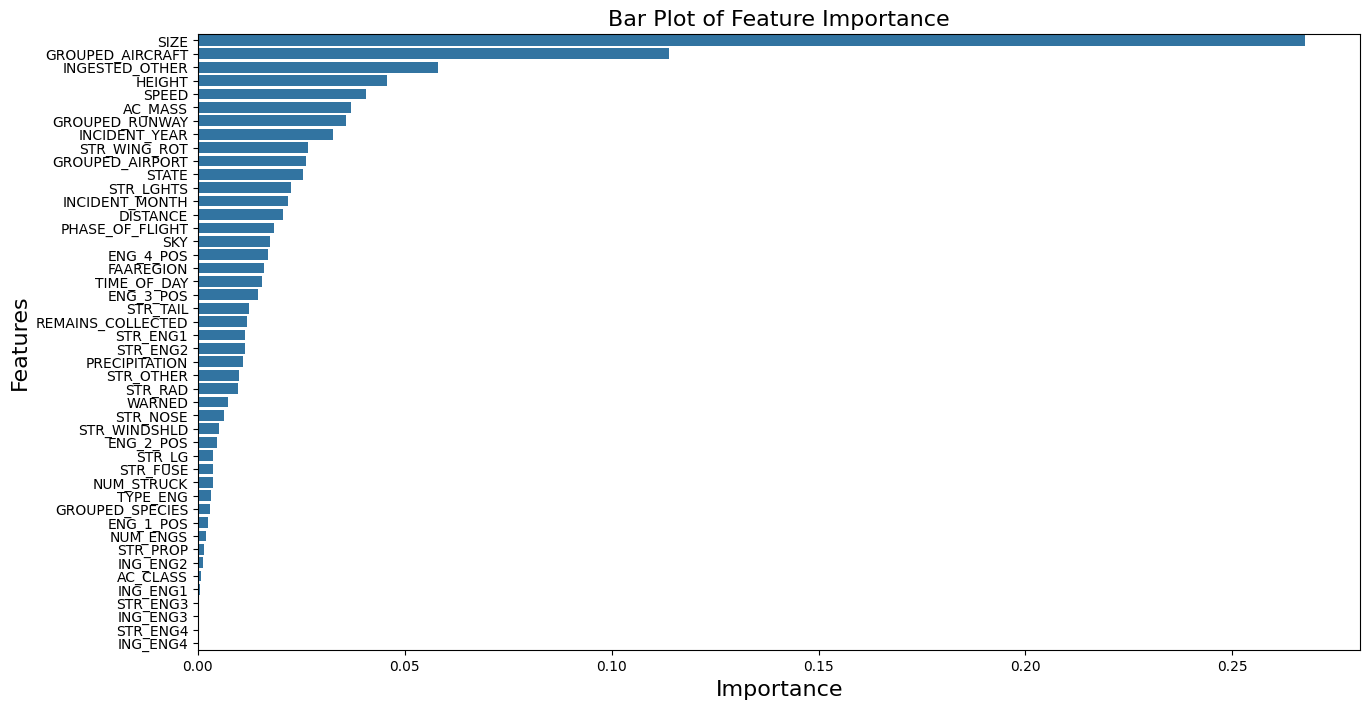

Encoding              Imputation                              Model  \
0   Label Encoding  Median-Mode imputation                Logistic Regression   
1   Label Encoding  Median-Mode imputation                     KNN Classifier   
2   Label Encoding  Median-Mode imputation           Decision Tree Classifier   
3   Label Encoding    Iterative imputation                Logistic Regression   
4   Label Encoding    Iterative imputation                     KNN Classifier   
5   Label Encoding    Iterative imputation           Decision Tree Classifier   
6   Label Encoding          KNN imputation                Logistic Regression   
7   Label Encoding          KNN imputation                     KNN Classifier   
8   Label Encoding          KNN imputation           Decision Tree Classifier   
9   Label Encoding  Median-Mode imputation       Weighted Logistic Regression   
10  Label Encoding  Median-Mode imputation            Weighted KNN Classifier   
11  Label Encoding  Median-Mode imputation  Weighted Decision Tree Classifier   
12  Label Encoding    Iterative imputation       Weighted Logistic Regression   
13  Label Encoding    Iterative imputation            Weighted KNN Classifier   
14  Label Encoding    Iterative imputation  Weighted Decision Tree Classifier   
15  Label Encoding          KNN imputation       Weighted Logistic Regression   
16  Label Encoding          KNN imputation            Weighted KNN Classifier   
17  Label Encoding          KNN imputation  Weighted Decision Tree Classifier   

    Accuracy Score  
0         0.931980  
1         0.927063  
2         0.922233  
3         0.931564  
4         0.926595  
5         0.922977  
6         0.931997  
7         0.927045  
8         0.921575  
9         0.684758  
10        0.925262  
11        0.921956  
12        0.648194  
13        0.925262  
14        0.924241  
15        0.655171  
16        0.925557  
17        0.922163

In [215]:
weighted_model('Label Encoding','KNN imputation',df_knn,df_knn[['HEIGHT', 'SPEED', 'DISTANCE']])

In [216]:
def stratified_weighted_model(encoding, imputation, data, df_num):
    global eval_df

    # Logistic Regression
    # Check normality of numerical data
    for col in df_num.columns:
      jb, p= stats.jarque_bera(df_num[col])
      if p<0.05:
        # Apply Yeo-Johnson transformation
        transformed_data = pd.Series(stats.yeojohnson(df_num[col])[0])
        df_num[col] = transformed_data

    data1 = data.copy()

    for i in df_num.columns:
      data1[i] = df_num[i]

    # Features (X) and Labels (y)
    X = data1.drop('INDICATED_DAMAGE', axis=1)  # Replace 'label_column_name' with your actual label column
    y = data1['INDICATED_DAMAGE']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

    # Create and train the model
    logreg = LogisticRegression(class_weight='balanced')
    logreg.fit(X_train, y_train)

    # Display accuracy score, confusion matrix, classification report

    print(f"LR Accuracy(Train): {accuracy_score(y_train, logreg.predict(X_train)):.2f}")
    print("\LR nConfusion Matrix(Train):\n", confusion_matrix(y_train, logreg.predict(X_train)))
    print(f"LR Accuracy(Test): {accuracy_score(y_test, logreg.predict(X_test)):.2f}")
    print("\nLR Confusion Matrix(Test):\n", confusion_matrix(y_test, logreg.predict(X_test)))
    print("LR Classification Report (Train):")
    print(classification_report(y_train, logreg.predict(X_train)))
    print("LR Classification Report (Test):")
    print(classification_report(y_test, logreg.predict(X_test)))

    pvalues = pd.Series(logreg.coef_[0], index=X_train.columns).sort_values(ascending=True)


    # Print the p-values
    print(pvalues)

    eval_df = evaluate_model(encoding , imputation, 'Stratified Weighted Logistic Regression', accuracy_score(y_test, logreg.predict(X_test)), eval_df)


    # KNN Classifier

    # Scale the data
    scaled_data = StandardScaler().fit_transform(data)

    # Features (X) and Labels (y)
    X = data.drop('INDICATED_DAMAGE', axis=1)  # Replace 'label_column_name' with your actual label column
    y = data['INDICATED_DAMAGE']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

    # Create and train the model
    knn = KNeighborsClassifier(weights = 'distance')
    knn.fit(X_train, y_train)

    # Display classification report
    print(f"KNN Accuracy(Train): {accuracy_score(y_train, knn.predict(X_train)):.2f}")
    print("\nKNN Confusion Matrix(Train):\n", confusion_matrix(y_train, knn.predict(X_train)))
    print(f"KNN Accuracy(Test): {accuracy_score(y_test, knn.predict(X_test)):.2f}")
    print("\nKNN Confusion Matrix(Test):\n", confusion_matrix(y_test, knn.predict(X_test)))
    print("KNN Classifier Classification Report (Train):")
    print(classification_report(y_train, knn.predict(X_train)))
    print("KNN Classifier Classification Report (Test):")
    print(classification_report(y_test, knn.predict(X_test)))

    eval_df = evaluate_model(encoding , imputation, 'Stratified Weighted KNN Classifier', accuracy_score(y_test,  knn.predict(X_test)), eval_df)

    # Decision Tree Classifier

    # Features (X) and Labels (y)
    X = data.drop('INDICATED_DAMAGE', axis=1)  # Replace 'label_column_name' with your actual label column
    y = data['INDICATED_DAMAGE']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

    # Create and train the model
    tree = DecisionTreeClassifier(class_weight='balanced')
    tree.fit(X_train, y_train)

    # Display classification report and feature importance
    print(f"DT Accuracy(Train): {accuracy_score(y_train, tree.predict(X_train)):.2f}")
    print("\nDT Confusion Matrix(Train):\n", confusion_matrix(y_train, tree.predict(X_train)))
    print(f"DT Accuracy(Test): {accuracy_score(y_test, tree.predict(X_test)):.2f}")
    print("\nDT Confusion Matrix(Test):\n", confusion_matrix(y_test, tree.predict(X_test)))
    print("DT Classification Report:")
    print(classification_report(y_train, tree.predict(X_train)))
    print("DT Classification Report:")
    print(classification_report(y_test, tree.predict(X_test)))
    print("Feature Importance:")
    feature_imp = pd.DataFrame(sorted(zip(tree.feature_importances_, X_train.columns), reverse=True))

    eval_df = evaluate_model(encoding , imputation, 'Stratified Weighted Decision Tree Classifier', accuracy_score(y_test, tree.predict(X_test)), eval_df)

    plt.figure(figsize=(15,8))
    sns.barplot(y=feature_imp[1], x=feature_imp[0])

    plt.title("Bar Plot of Feature Importance", fontsize=16)
    plt.xlabel("Importance", fontsize=16)
    plt.ylabel("Features", fontsize=16)


    plt.show()

    return eval_df



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR Accuracy(Train): 0.68
\LR nConfusion Matrix(Train):
 [[147127  68127]
 [  4839  10955]]
LR Accuracy(Test): 0.68

LR Confusion Matrix(Test):
 [[36730 17084]
 [ 1225  2723]]
LR Classification Report (Train):
              precision    recall  f1-score   support

           0       0.97      0.68      0.80    215254
           1       0.14      0.69      0.23     15794

    accuracy                           0.68    231048
   macro avg       0.55      0.69      0.52    231048
weighted avg       0.91      0.68      0.76    231048

LR Classification Report (Test):
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     53814
           1       0.14      0.69      0.23      3948

    accuracy                           0.68     57762
   macro avg       0.55      0.69      0.51     57762
weighted avg       0.91      0.68      0.76     57762

SIZE                -1.690617e-01
AC_MASS             -1.548866e-01
TYPE_ENG            -1.133372e-01
RE

<ipython-input-206-1f49ff9b1261>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append(new_row, ignore_index=True)


KNN Accuracy(Train): 1.00

KNN Confusion Matrix(Train):
 [[215251      3]
 [   206  15588]]
KNN Accuracy(Test): 0.92

KNN Confusion Matrix(Test):
 [[53107   707]
 [ 3636   312]]
KNN Classifier Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    215254
           1       1.00      0.99      0.99     15794

    accuracy                           1.00    231048
   macro avg       1.00      0.99      1.00    231048
weighted avg       1.00      1.00      1.00    231048

KNN Classifier Classification Report (Test):
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     53814
           1       0.31      0.08      0.13      3948

    accuracy                           0.92     57762
   macro avg       0.62      0.53      0.54     57762
weighted avg       0.89      0.92      0.90     57762



<ipython-input-206-1f49ff9b1261>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append(new_row, ignore_index=True)


DT Accuracy(Train): 1.00

DT Confusion Matrix(Train):
 [[214872    382]
 [     0  15794]]
DT Accuracy(Test): 0.92

DT Confusion Matrix(Test):
 [[51532  2282]
 [ 2294  1654]]
DT Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    215254
           1       0.98      1.00      0.99     15794

    accuracy                           1.00    231048
   macro avg       0.99      1.00      0.99    231048
weighted avg       1.00      1.00      1.00    231048

DT Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     53814
           1       0.42      0.42      0.42      3948

    accuracy                           0.92     57762
   macro avg       0.69      0.69      0.69     57762
weighted avg       0.92      0.92      0.92     57762

Feature Importance:


<ipython-input-206-1f49ff9b1261>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append(new_row, ignore_index=True)


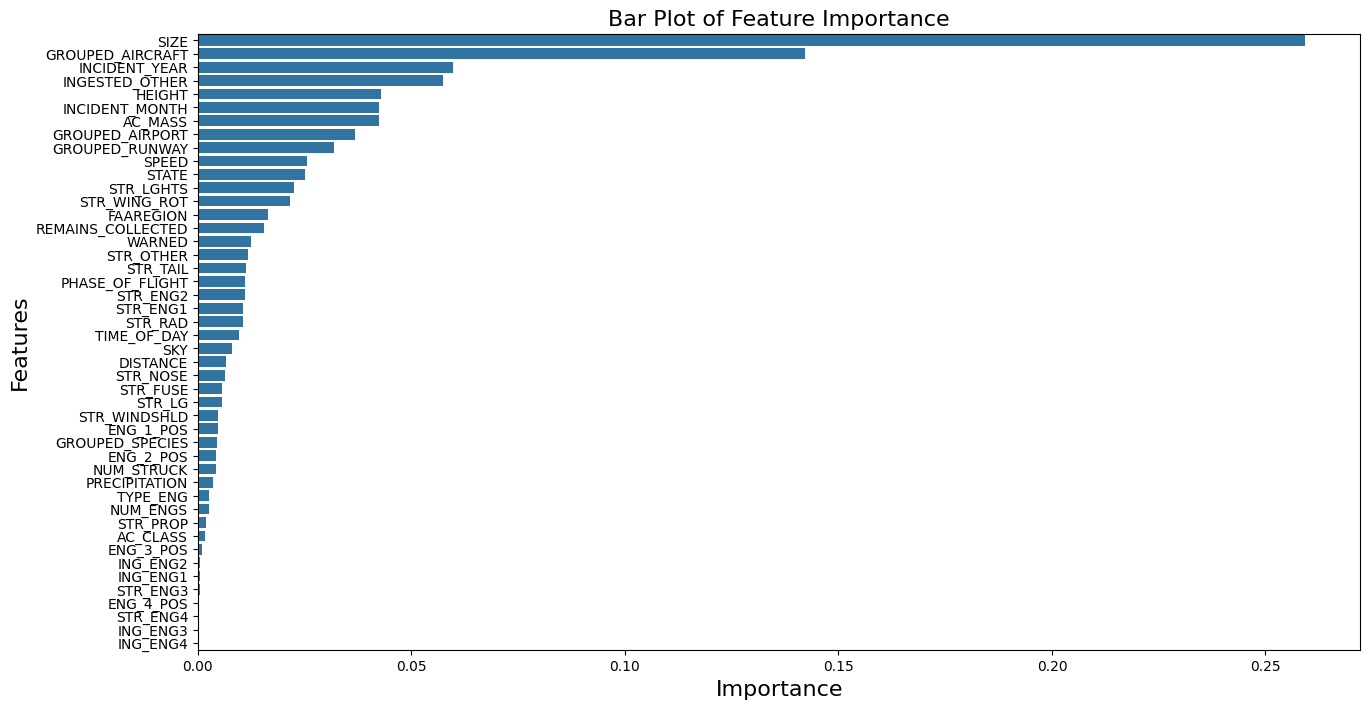

Encoding              Imputation  \
0   Label Encoding  Median-Mode imputation   
1   Label Encoding  Median-Mode imputation   
2   Label Encoding  Median-Mode imputation   
3   Label Encoding    Iterative imputation   
4   Label Encoding    Iterative imputation   
5   Label Encoding    Iterative imputation   
6   Label Encoding          KNN imputation   
7   Label Encoding          KNN imputation   
8   Label Encoding          KNN imputation   
9   Label Encoding  Median-Mode imputation   
10  Label Encoding  Median-Mode imputation   
11  Label Encoding  Median-Mode imputation   
12  Label Encoding    Iterative imputation   
13  Label Encoding    Iterative imputation   
14  Label Encoding    Iterative imputation   
15  Label Encoding          KNN imputation   
16  Label Encoding          KNN imputation   
17  Label Encoding          KNN imputation   
18  Label Encoding  Median-Mode imputation   
19  Label Encoding  Median-Mode imputation   
20  Label Encoding  Median-Mode imputation   

                                           Model  Accuracy Score  
0                            Logistic Regression        0.931980  
1                                 KNN Classifier        0.927063  
2                       Decision Tree Classifier        0.922233  
3                            Logistic Regression        0.931564  
4                                 KNN Classifier        0.926595  
5                       Decision Tree Classifier        0.922977  
6                            Logistic Regression        0.931997  
7                                 KNN Classifier        0.927045  
8                       Decision Tree Classifier        0.921575  
9                   Weighted Logistic Regression        0.684758  
10                       Weighted KNN Classifier        0.925262  
11             Weighted Decision Tree Classifier        0.921956  
12                  Weighted Logistic Regression        0.648194  
13                       Weighted KNN Classifier        0.925262  
14             Weighted Decision Tree Classifier        0.924241  
15                  Weighted Logistic Regression        0.655171  
16                       Weighted KNN Classifier        0.925557  
17             Weighted Decision Tree Classifier        0.922163  
18       Stratified Weighted Logistic Regression        0.683027  
19            Stratified Weighted KNN Classifier        0.924812  
20  Stratified Weighted Decision Tree Classifier        0.920778

In [217]:
stratified_weighted_model('Label Encoding','Median-Mode imputation',df1_mm,df1_mm_num)

<ipython-input-216-d3389fb59b2c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[col] = transformed_data
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR Accuracy(Train): 0.65
\LR nConfusion Matrix(Train):
 [[139374  75880]
 [  4897  10897]]
LR Accuracy(Test): 0.65

LR Confusion Matrix(Test):
 [[34852 18962]
 [ 1261  2687]]
LR Classification Report (Train):
              precision    recall  f1-score   support

         0.0       0.97      0.65      0.78    215254
         1.0       0.13      0.69      0.21     15794

    accuracy                           0.65    231048
   macro avg       0.55      0.67      0.49    231048
weighted avg       0.91      0.65      0.74    231048

LR Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.97      0.65      0.78     53814
         1.0       0.12      0.68      0.21      3948

    accuracy                           0.65     57762
   macro avg       0.54      0.66      0.49     57762
weighted avg       0.91      0.65      0.74     57762

SIZE                -0.138262
AC_MASS             -0.039134
REMAINS_COLLECTED   -0.031924
FAAREGION     

<ipython-input-206-1f49ff9b1261>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append(new_row, ignore_index=True)


KNN Accuracy(Train): 1.00

KNN Confusion Matrix(Train):
 [[215254      0]
 [    13  15781]]
KNN Accuracy(Test): 0.93

KNN Confusion Matrix(Test):
 [[53169   645]
 [ 3600   348]]
KNN Classifier Classification Report (Train):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    215254
         1.0       1.00      1.00      1.00     15794

    accuracy                           1.00    231048
   macro avg       1.00      1.00      1.00    231048
weighted avg       1.00      1.00      1.00    231048

KNN Classifier Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     53814
         1.0       0.35      0.09      0.14      3948

    accuracy                           0.93     57762
   macro avg       0.64      0.54      0.55     57762
weighted avg       0.90      0.93      0.91     57762



<ipython-input-206-1f49ff9b1261>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append(new_row, ignore_index=True)


DT Accuracy(Train): 1.00

DT Confusion Matrix(Train):
 [[215234     20]
 [     0  15794]]
DT Accuracy(Test): 0.92

DT Confusion Matrix(Test):
 [[51680  2134]
 [ 2321  1627]]
DT Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    215254
         1.0       1.00      1.00      1.00     15794

    accuracy                           1.00    231048
   macro avg       1.00      1.00      1.00    231048
weighted avg       1.00      1.00      1.00    231048

DT Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     53814
         1.0       0.43      0.41      0.42      3948

    accuracy                           0.92     57762
   macro avg       0.69      0.69      0.69     57762
weighted avg       0.92      0.92      0.92     57762

Feature Importance:


<ipython-input-206-1f49ff9b1261>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append(new_row, ignore_index=True)


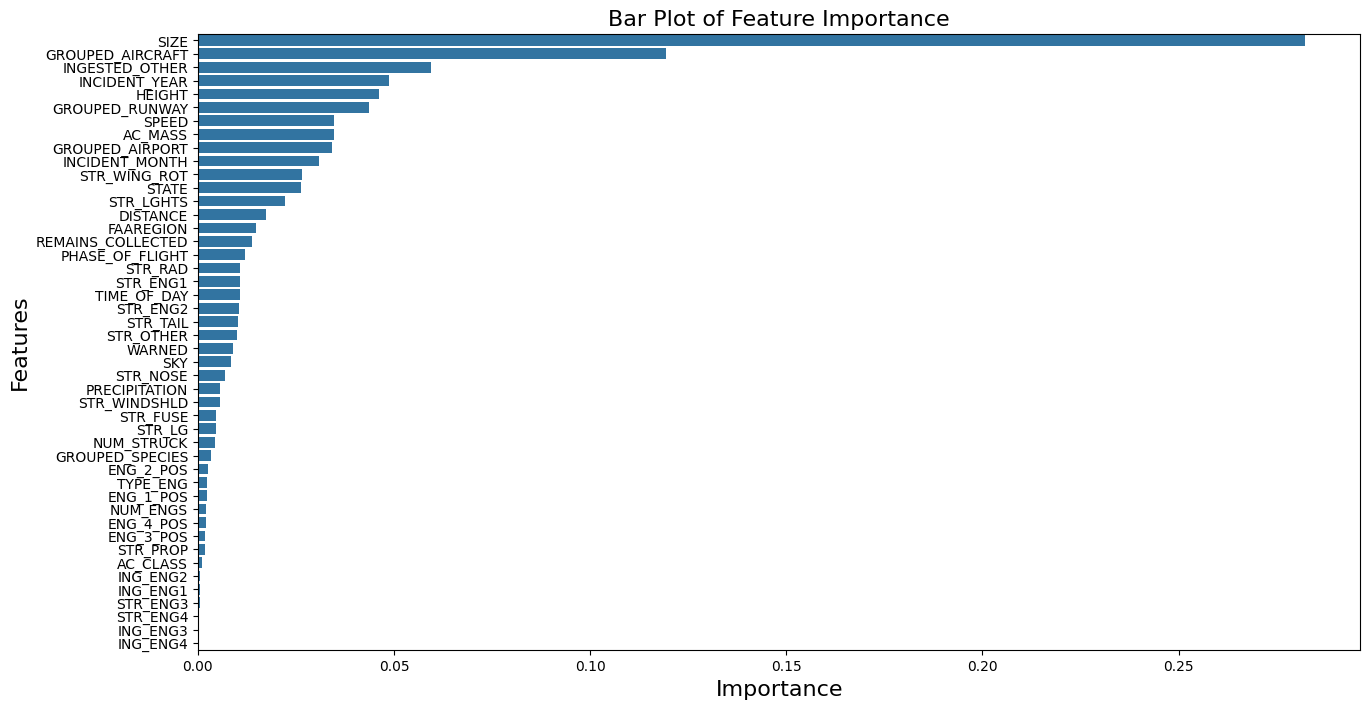

Encoding              Imputation  \
0   Label Encoding  Median-Mode imputation   
1   Label Encoding  Median-Mode imputation   
2   Label Encoding  Median-Mode imputation   
3   Label Encoding    Iterative imputation   
4   Label Encoding    Iterative imputation   
5   Label Encoding    Iterative imputation   
6   Label Encoding          KNN imputation   
7   Label Encoding          KNN imputation   
8   Label Encoding          KNN imputation   
9   Label Encoding  Median-Mode imputation   
10  Label Encoding  Median-Mode imputation   
11  Label Encoding  Median-Mode imputation   
12  Label Encoding    Iterative imputation   
13  Label Encoding    Iterative imputation   
14  Label Encoding    Iterative imputation   
15  Label Encoding          KNN imputation   
16  Label Encoding          KNN imputation   
17  Label Encoding          KNN imputation   
18  Label Encoding  Median-Mode imputation   
19  Label Encoding  Median-Mode imputation   
20  Label Encoding  Median-Mode imputation   
21  Label Encoding    Iterative imputation   
22  Label Encoding    Iterative imputation   
23  Label Encoding    Iterative imputation   

                                           Model  Accuracy Score  
0                            Logistic Regression        0.931980  
1                                 KNN Classifier        0.927063  
2                       Decision Tree Classifier        0.922233  
3                            Logistic Regression        0.931564  
4                                 KNN Classifier        0.926595  
5                       Decision Tree Classifier        0.922977  
6                            Logistic Regression        0.931997  
7                                 KNN Classifier        0.927045  
8                       Decision Tree Classifier        0.921575  
9                   Weighted Logistic Regression        0.684758  
10                       Weighted KNN Classifier        0.925262  
11             Weighted Decision Tree Classifier        0.921956  
12                  Weighted Logistic Regression        0.648194  
13                       Weighted KNN Classifier        0.925262  
14             Weighted Decision Tree Classifier        0.924241  
15                  Weighted Logistic Regression        0.655171  
16                       Weighted KNN Classifier        0.925557  
17             Weighted Decision Tree Classifier        0.922163  
18       Stratified Weighted Logistic Regression        0.683027  
19            Stratified Weighted KNN Classifier        0.924812  
20  Stratified Weighted Decision Tree Classifier        0.920778  
21       Stratified Weighted Logistic Regression        0.649891  
22            Stratified Weighted KNN Classifier        0.926509  
23  Stratified Weighted Decision Tree Classifier        0.922873

In [218]:
stratified_weighted_model('Label Encoding','Iterative imputation',df_ii,df_ii[['HEIGHT', 'SPEED', 'DISTANCE']])

<ipython-input-216-d3389fb59b2c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[col] = transformed_data
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR Accuracy(Train): 0.66
\LR nConfusion Matrix(Train):
 [[141934  73320]
 [  4865  10929]]
LR Accuracy(Test): 0.66

LR Confusion Matrix(Test):
 [[35440 18374]
 [ 1270  2678]]
LR Classification Report (Train):
              precision    recall  f1-score   support

         0.0       0.97      0.66      0.78    215254
         1.0       0.13      0.69      0.22     15794

    accuracy                           0.66    231048
   macro avg       0.55      0.68      0.50    231048
weighted avg       0.91      0.66      0.75    231048

LR Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.97      0.66      0.78     53814
         1.0       0.13      0.68      0.21      3948

    accuracy                           0.66     57762
   macro avg       0.55      0.67      0.50     57762
weighted avg       0.91      0.66      0.74     57762

SIZE                -0.203861
AC_MASS             -0.118639
TYPE_ENG            -0.100417
SPEED         

<ipython-input-206-1f49ff9b1261>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append(new_row, ignore_index=True)


KNN Accuracy(Train): 1.00

KNN Confusion Matrix(Train):
 [[215254      0]
 [     0  15794]]
KNN Accuracy(Test): 0.93

KNN Confusion Matrix(Test):
 [[53162   652]
 [ 3669   279]]
KNN Classifier Classification Report (Train):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    215254
         1.0       1.00      1.00      1.00     15794

    accuracy                           1.00    231048
   macro avg       1.00      1.00      1.00    231048
weighted avg       1.00      1.00      1.00    231048

KNN Classifier Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     53814
         1.0       0.30      0.07      0.11      3948

    accuracy                           0.93     57762
   macro avg       0.62      0.53      0.54     57762
weighted avg       0.89      0.93      0.90     57762



<ipython-input-206-1f49ff9b1261>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append(new_row, ignore_index=True)


DT Accuracy(Train): 1.00

DT Confusion Matrix(Train):
 [[215254      0]
 [     0  15794]]
DT Accuracy(Test): 0.92

DT Confusion Matrix(Test):
 [[51645  2169]
 [ 2370  1578]]
DT Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    215254
         1.0       1.00      1.00      1.00     15794

    accuracy                           1.00    231048
   macro avg       1.00      1.00      1.00    231048
weighted avg       1.00      1.00      1.00    231048

DT Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     53814
         1.0       0.42      0.40      0.41      3948

    accuracy                           0.92     57762
   macro avg       0.69      0.68      0.68     57762
weighted avg       0.92      0.92      0.92     57762

Feature Importance:


<ipython-input-206-1f49ff9b1261>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append(new_row, ignore_index=True)


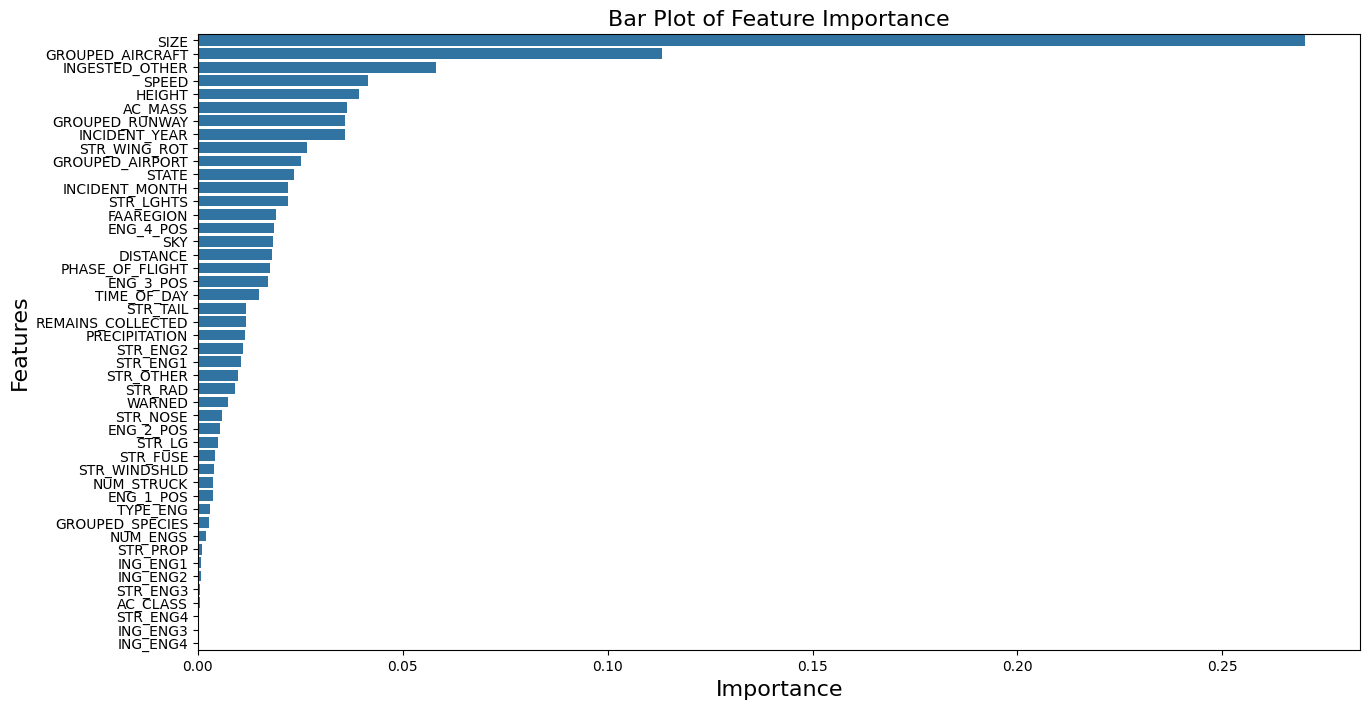

Encoding              Imputation  \
0   Label Encoding  Median-Mode imputation   
1   Label Encoding  Median-Mode imputation   
2   Label Encoding  Median-Mode imputation   
3   Label Encoding    Iterative imputation   
4   Label Encoding    Iterative imputation   
5   Label Encoding    Iterative imputation   
6   Label Encoding          KNN imputation   
7   Label Encoding          KNN imputation   
8   Label Encoding          KNN imputation   
9   Label Encoding  Median-Mode imputation   
10  Label Encoding  Median-Mode imputation   
11  Label Encoding  Median-Mode imputation   
12  Label Encoding    Iterative imputation   
13  Label Encoding    Iterative imputation   
14  Label Encoding    Iterative imputation   
15  Label Encoding          KNN imputation   
16  Label Encoding          KNN imputation   
17  Label Encoding          KNN imputation   
18  Label Encoding  Median-Mode imputation   
19  Label Encoding  Median-Mode imputation   
20  Label Encoding  Median-Mode imputation   
21  Label Encoding    Iterative imputation   
22  Label Encoding    Iterative imputation   
23  Label Encoding    Iterative imputation   
24  Label Encoding          KNN imputation   
25  Label Encoding          KNN imputation   
26  Label Encoding          KNN imputation   

                                           Model  Accuracy Score  
0                            Logistic Regression        0.931980  
1                                 KNN Classifier        0.927063  
2                       Decision Tree Classifier        0.922233  
3                            Logistic Regression        0.931564  
4                                 KNN Classifier        0.926595  
5                       Decision Tree Classifier        0.922977  
6                            Logistic Regression        0.931997  
7                                 KNN Classifier        0.927045  
8                       Decision Tree Classifier        0.921575  
9                   Weighted Logistic Regression        0.684758  
10                       Weighted KNN Classifier        0.925262  
11             Weighted Decision Tree Classifier        0.921956  
12                  Weighted Logistic Regression        0.648194  
13                       Weighted KNN Classifier        0.925262  
14             Weighted Decision Tree Classifier        0.924241  
15                  Weighted Logistic Regression        0.655171  
16                       Weighted KNN Classifier        0.925557  
17             Weighted Decision Tree Classifier        0.922163  
18       Stratified Weighted Logistic Regression        0.683027  
19            Stratified Weighted KNN Classifier        0.924812  
20  Stratified Weighted Decision Tree Classifier        0.920778  
21       Stratified Weighted Logistic Regression        0.649891  
22            Stratified Weighted KNN Classifier        0.926509  
23  Stratified Weighted Decision Tree Classifier        0.922873  
24       Stratified Weighted Logistic Regression        0.659915  
25            Stratified Weighted KNN Classifier        0.925193  
26  Stratified Weighted Decision Tree Classifier        0.921419

In [219]:
stratified_weighted_model('Label Encoding','KNN imputation',df_knn,df_knn[['HEIGHT', 'SPEED', 'DISTANCE']])

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [143]:
def tuned_model(encoding, imputation, data):
    #global eval_df
    # Features (X) and Labels (y)
    X = data.drop('INDICATED_DAMAGE', axis=1)  # Replace 'label_column_name' with your actual label column
    y = data['INDICATED_DAMAGE']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,shuffle=True, random_state=10,stratify=y)

    # Create and train the model
    tree = DecisionTreeClassifier(max_depth=60,class_weight='balanced')
    tree.fit(X_train, y_train)

    # Display classification report and feature importance
    print(f"DT Accuracy(Train): {accuracy_score(y_train, tree.predict(X_train)):.2f}")
    print("\nDT Confusion Matrix(Train):\n", confusion_matrix(y_train, tree.predict(X_train)))
    print(f"DT Accuracy(Test): {accuracy_score(y_test, tree.predict(X_test)):.2f}")
    print("\nDT Confusion Matrix(Test):\n", confusion_matrix(y_test, tree.predict(X_test)))
    print("DT Classification Report(Train):")
    print(classification_report(y_train, tree.predict(X_train)))
    print("DT Classification Report(Test):")
    print(classification_report(y_test, tree.predict(X_test)))
    print("Feature Importance:")
    feature_imp = pd.DataFrame(sorted(zip(tree.feature_importances_, X_train.columns), reverse=True))

    #eval_df = evaluate_model(encoding , imputation, 'Tuned Decision Tree Classifier', accuracy_score(y_test, tree.predict(X_test)), eval_df)

    plt.figure(figsize=(15,8))
    sns.barplot(y=feature_imp[1], x=feature_imp[0])

    plt.title("Bar Plot of Feature Importance", fontsize=16)
    plt.xlabel("Importance", fontsize=16)
    plt.ylabel("Features", fontsize=16)

    #RandomForestClassifier

    rf = RandomForestClassifier(class_weight='balanced')
    rf.fit(X_train, y_train)

    # Display classification report and feature importance
    print(f"RF Accuracy(Train): {accuracy_score(y_train, rf.predict(X_train)):.2f}")
    print("\nRF Confusion Matrix(Train):\n", confusion_matrix(y_train, rf.predict(X_train)))
    print(f"RF Accuracy(Test): {accuracy_score(y_test, rf.predict(X_test)):.2f}")
    print("\nRF Confusion Matrix(Test):\n", confusion_matrix(y_test, rf.predict(X_test)))
    print("RF Classification Report(Train):")
    print(classification_report(y_train, rf.predict(X_train)))
    print("RF Classification Report(Test):")
    print(classification_report(y_test, rf.predict(X_test)))
    print("Feature Importance:")
    feature_imp_rf = pd.DataFrame(sorted(zip(rf.feature_importances_, X_train.columns), reverse=True))

    #eval_df = evaluate_model(encoding , imputation, 'Tuned Decision Tree Classifier', accuracy_score(y_test, tree.predict(X_test)), eval_df)

    plt.figure(figsize=(15,8))
    sns.barplot(y=feature_imp_rf[1], x=feature_imp_rf[0])

    plt.title("Bar Plot of Feature Importance", fontsize=16)
    plt.xlabel("Importance", fontsize=16)
    plt.ylabel("Features", fontsize=16)


    plt.show()

    #return eval_df



In [144]:
tuned_model('Frequency Encoding','Median-Mode imputation',df1_mm)

NameError: name 'df1_mm' is not defined

DT Accuracy(Train): 1.00

DT Confusion Matrix(Train):
 [[201778     23]
 [     0  14806]]
DT Accuracy(Test): 0.92

DT Confusion Matrix(Test):
 [[64523  2744]
 [ 2841  2095]]
DT Classification Report(Train):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    201801
         1.0       1.00      1.00      1.00     14806

    accuracy                           1.00    216607
   macro avg       1.00      1.00      1.00    216607
weighted avg       1.00      1.00      1.00    216607

DT Classification Report(Test):
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     67267
         1.0       0.43      0.42      0.43      4936

    accuracy                           0.92     72203
   macro avg       0.70      0.69      0.69     72203
weighted avg       0.92      0.92      0.92     72203

Feature Importance:


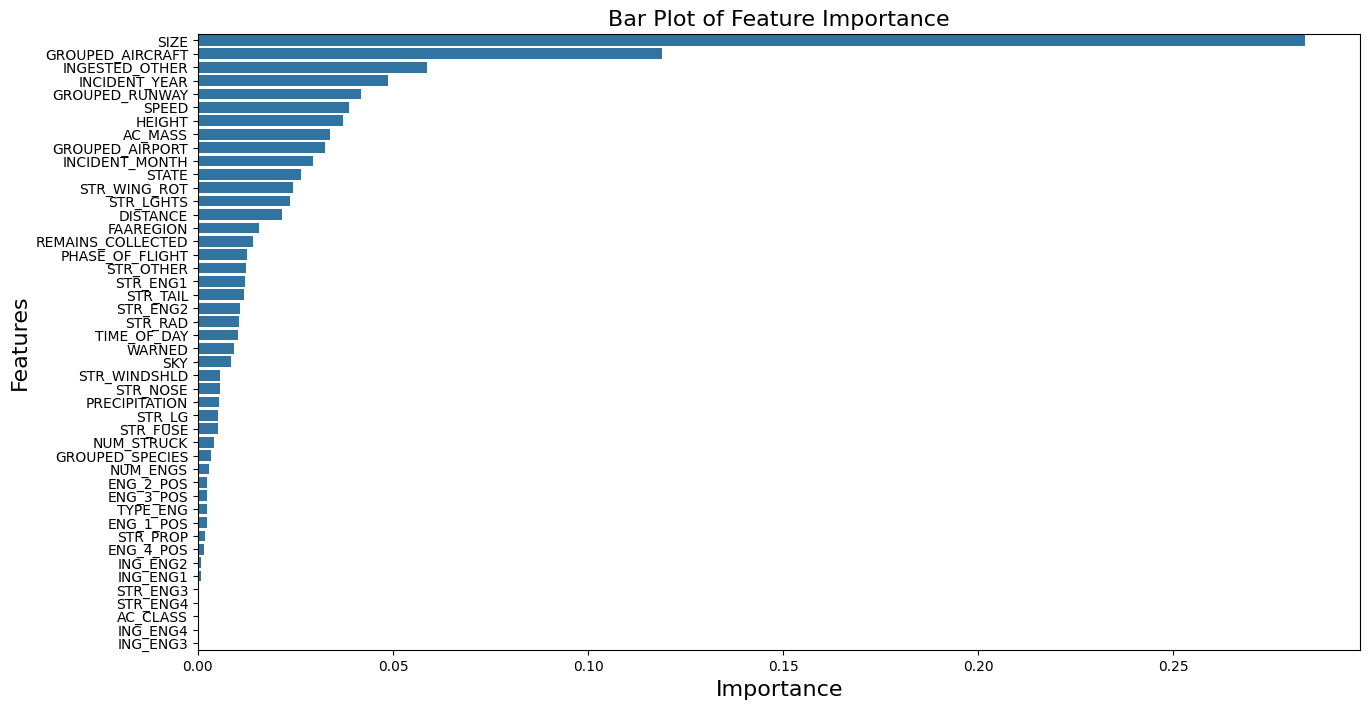

Empty DataFrame
Columns: []
Index: []

In [159]:
tuned_model('Label Encoding','Iterative imputation',df_ii)

### Feature engineering (comibining variables)

In [97]:
# Combine sky and precipitation columns into a single weather condition column
df2 = df.copy()
df2['WEATHER_CONDITION'] = df2['SKY'] + ' - ' + df2['PRECIPITATION']



In [98]:
df2['WEATHER_CONDITION'].unique()

array([nan, 'No Cloud - None', 'Overcast - None', 'Some Cloud - None',
       'No Cloud - Fog', 'Overcast - Fog', 'Overcast - Rain',
       'Some Cloud - Fog', 'Overcast - Snow', 'Some Cloud - Rain',
       'No Cloud - Snow', 'Some Cloud - Snow', 'No Cloud - Rain',
       'Overcast - Fog, Rain', 'Some Cloud - Fog, Rain',
       'Overcast - Rain, Snow', 'Overcast - Fog, Snow',
       'Overcast - Fog, Rain, Snow', 'No Cloud - Fog, Snow',
       'No Cloud - None, Snow', 'Some Cloud - Fog, None',
       'Overcast - Fog, None', 'Overcast - None, Rain',
       'Some Cloud - None, Snow', 'No Cloud - Fog, None',
       'Overcast - None, Snow', 'No Cloud - None, Rain, Snow',
       'Some Cloud - None, Rain', 'Some Cloud - Rain, Snow'], dtype=object)

In [99]:
df2['WEATHER_CONDITION'].nunique()

28

In [100]:
# Convert INCIDENT_MONTH and INCIDENT_YEAR to strings and concatenate them
df2['INCIDENT_DATE'] = df2['INCIDENT_MONTH'].astype(str) + '-' + df2['INCIDENT_YEAR'].astype(str)





In [101]:
df2['INCIDENT_DATE'].unique()

array(['6-1996', '7-1996', '5-1991', '11-1993', '7-1995', '9-1990',
       '5-1992', '8-1990', '4-1995', '12-1993', '9-1994', '7-1990',
       '3-1991', '5-1990', '2-1991', '11-1991', '10-1990', '10-1991',
       '5-1996', '2-1990', '8-1993', '8-1996', '9-1993', '8-1991',
       '4-1991', '6-1992', '6-1994', '9-1991', '11-1992', '7-1991',
       '1-1991', '7-1993', '8-1992', '12-1991', '9-1992', '5-1995',
       '3-1990', '10-1996', '1-1993', '1-1992', '4-1992', '2-1992',
       '5-1994', '12-1994', '10-1993', '1-1995', '11-1990', '12-1990',
       '6-1990', '6-1995', '4-1994', '10-1992', '2-1994', '7-1992',
       '10-1994', '6-1991', '7-1994', '3-1995', '3-1992', '11-1996',
       '8-1994', '8-1995', '1-1994', '4-1990', '4-1993', '11-1994',
       '2-1995', '12-1996', '9-1996', '12-1992', '3-1994', '9-1995',
       '1-1990', '3-1993', '5-1993', '6-1993', '10-1995', '2-1993',
       '4-1996', '12-1995', '11-1995', '2-1996', '3-1997', '1-1997',
       '11-1997', '3-1996', '5-1997', '1-

In [102]:
df2['INCIDENT_DATE'].nunique()

407

In [103]:
# Combine FAAREGION and STATE columns into a single REGION_STATE column
df2['REGION_STATE'] = df2['FAAREGION'] + '_' + df2['STATE']

In [104]:
df2['REGION_STATE'].unique()

array(['AWP_CA', 'ANM_CO', 'ACE_NE', 'AEA_DC', 'AEA_NY', 'ASW_TX',
       'ACE_MO', 'ASO_GA', 'ASW_LA', 'AGL_MI', 'AGL_IL', 'AGL_IN',
       'AGL_OH', 'ANE_NH', 'ANM_OR', nan, 'AEA_PA', 'ASO_FL', 'AEA_MD',
       'ANE_CT', 'ANE_RI', 'ANM_ID', 'AEA_NJ', 'AGL_MN', 'ANM_WA',
       'AWP_HI', 'ASO_KY', 'ASW_OK', 'ACE_IA', 'ASO_NC', 'AEA_VA',
       'ANE_MA', 'ANM_UT', 'ASO_MS', 'ASO_TN', 'AEA_WV', 'ASO_AL',
       'ANE_ME', 'AWP_AZ', 'ASW_AR', 'FGN_AB', 'AGL_WI', 'ASO_PR',
       'AAL_AK', 'ASW_NM', 'AGL_ND', 'AWP_NV', 'FGN_FN', 'FGN_ON',
       'ANM_WY', 'AGL_SD', 'ASO_SC', 'ANM_MT', 'AEA_DE', 'ACE_KS',
       'ASO_VI', 'FGN_QC', 'ANE_VT', 'AWP_UM', 'FGN_BC', 'AWP_GU',
       'AWP_AS', 'AWP_MH', 'FGN_MB', 'FGN_SK', 'AWP_MP', 'FGN_NL',
       'FGN_NS'], dtype=object)

In [105]:
df2['REGION_STATE'].nunique()

67

In [106]:
# Combine FAAREGION and STATE columns into a single REGION_STATE column
df2['SPECIES_COLLECTED'] = df2['SPECIES'] + '_' + df2['REMAINS_COLLECTED'].astype(str)

In [107]:
df2['SPECIES_COLLECTED'].unique()

array(['Unknown bird - medium_False', 'Unknown bird - small_False',
       'American robin_False', ..., 'Parakeets_True', nan, 'Ravens_True'],
      dtype=object)

In [108]:
df2['SPECIES_COLLECTED'].nunique()

1329

In [109]:
df2.drop(['INCIDENT_MONTH', 'INCIDENT_YEAR', 'FAAREGION', 'STATE', 'SKY', 'PRECIPITATION','SPECIES','REMAINS_COLLECTED'], axis=1, inplace=True)

In [110]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288810 entries, 0 to 288809
Data columns (total 95 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   INDEX_NR               288810 non-null  int64  
 1   INCIDENT_DATE          288810 non-null  object 
 2   TIME                   163633 non-null  object 
 3   TIME_OF_DAY            166394 non-null  object 
 4   AIRPORT_ID             288804 non-null  object 
 5   AIRPORT                288810 non-null  object 
 6   LATITUDE               253309 non-null  float64
 7   LONGITUDE              253308 non-null  float64
 8   RUNWAY                 218852 non-null  object 
 9   LOCATION               33939 non-null   object 
 10  ENROUTE_STATE          5037 non-null    object 
 11  OPID                   288784 non-null  object 
 12  OPERATOR               288810 non-null  object 
 13  REG                    172543 non-null  object 
 14  FLT                    129249 non-nu

In [111]:
df2.drop(['AIRPORT_ID','INDEX_NR','OPID','REG','FLT','AMA','AMO','EMA','EMO','DAM_RAD','DAM_WINDSHLD','DAM_NOSE','TIME',\
    'DAM_ENG1','DAM_ENG2','DAM_ENG3','DAM_ENG4','DAM_PROP','DAM_WING_ROT','DAM_FUSE','DAM_LG','DAM_TAIL',\
    'DAM_LGHTS','DAM_OTHER','OTHER_SPECIFY','EFFECT','SPECIES_ID','REMARKS','REMAINS_SENT','NUM_SEEN','COMMENTS',\
    'REPORTED_NAME','REPORTED_TITLE','SOURCE','PERSON','LUPDATE','TRANSFER','ENROUTE_STATE','AOS','COST_REPAIRS','COST_OTHER',\
              'COST_REPAIRS_INFL_ADJ','COST_OTHER_INFL_ADJ','OTHER_SPECIFY','EFFECT_OTHER','BIRD_BAND_NUMBER',\
             'NR_INJURIES','NR_FATALITIES','LATITUDE','LONGITUDE','LOCATION','ENROUTE_STATE','AOS','COST_REPAIRS','COST_OTHER',\
              'COST_REPAIRS_INFL_ADJ','COST_OTHER_INFL_ADJ','OTHER_SPECIFY','EFFECT_OTHER','BIRD_BAND_NUMBER',\
             'NR_INJURIES','NR_FATALITIES'], axis = 1, inplace = True)

In [112]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288810 entries, 0 to 288809
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   INCIDENT_DATE      288810 non-null  object 
 1   TIME_OF_DAY        166394 non-null  object 
 2   AIRPORT            288810 non-null  object 
 3   RUNWAY             218852 non-null  object 
 4   OPERATOR           288810 non-null  object 
 5   AIRCRAFT           288810 non-null  object 
 6   AC_CLASS           206893 non-null  object 
 7   AC_MASS            206490 non-null  float64
 8   TYPE_ENG           206044 non-null  object 
 9   NUM_ENGS           206259 non-null  float64
 10  ENG_1_POS          205481 non-null  float64
 11  ENG_2_POS          191612 non-null  float64
 12  ENG_3_POS          13080 non-null   float64
 13  ENG_4_POS          3290 non-null    float64
 14  PHASE_OF_FLIGHT    177843 non-null  object 
 15  HEIGHT             148807 non-null  float64
 16  SP

### Converting boolean to integer

In [113]:
for i in df2.select_dtypes(include='bool').columns:
    df2[i] = df2[i].astype(int)

In [114]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288810 entries, 0 to 288809
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   INCIDENT_DATE      288810 non-null  object 
 1   TIME_OF_DAY        166394 non-null  object 
 2   AIRPORT            288810 non-null  object 
 3   RUNWAY             218852 non-null  object 
 4   OPERATOR           288810 non-null  object 
 5   AIRCRAFT           288810 non-null  object 
 6   AC_CLASS           206893 non-null  object 
 7   AC_MASS            206490 non-null  float64
 8   TYPE_ENG           206044 non-null  object 
 9   NUM_ENGS           206259 non-null  float64
 10  ENG_1_POS          205481 non-null  float64
 11  ENG_2_POS          191612 non-null  float64
 12  ENG_3_POS          13080 non-null   float64
 13  ENG_4_POS          3290 non-null    float64
 14  PHASE_OF_FLIGHT    177843 non-null  object 
 15  HEIGHT             148807 non-null  float64
 16  SP

### Frequency encoding categroical variables

In [115]:
for i in df2.select_dtypes(include='object').columns:
    freq_map = df2[i].value_counts().to_dict()

    df2[i] = df2[i].map(freq_map)


In [116]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288810 entries, 0 to 288809
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   INCIDENT_DATE      288810 non-null  int64  
 1   TIME_OF_DAY        166394 non-null  float64
 2   AIRPORT            288810 non-null  int64  
 3   RUNWAY             218852 non-null  float64
 4   OPERATOR           288810 non-null  int64  
 5   AIRCRAFT           288810 non-null  int64  
 6   AC_CLASS           206893 non-null  float64
 7   AC_MASS            206490 non-null  float64
 8   TYPE_ENG           206044 non-null  float64
 9   NUM_ENGS           206259 non-null  float64
 10  ENG_1_POS          205481 non-null  float64
 11  ENG_2_POS          191612 non-null  float64
 12  ENG_3_POS          13080 non-null   float64
 13  ENG_4_POS          3290 non-null    float64
 14  PHASE_OF_FLIGHT    177843 non-null  float64
 15  HEIGHT             148807 non-null  float64
 16  SP

In [117]:
df2.drop(['ENG_3_POS','ENG_4_POS'], axis = 1, inplace = True)

In [118]:
df2.drop('DAMAGE_LEVEL', axis = 1, inplace=True)

### Median-Mode Imputation

In [119]:
df2.isnull().sum()

INCIDENT_DATE             0
TIME_OF_DAY          122416
AIRPORT                   0
RUNWAY                69958
OPERATOR                  0
AIRCRAFT                  0
AC_CLASS              81917
AC_MASS               82320
TYPE_ENG              82766
NUM_ENGS              82551
ENG_1_POS             83329
ENG_2_POS             97198
PHASE_OF_FLIGHT      110967
HEIGHT               140003
SPEED                194573
DISTANCE             100576
INGESTED_OTHER            0
INDICATED_DAMAGE          0
STR_RAD                   0
STR_WINDSHLD              0
STR_NOSE                  0
STR_ENG1                  0
ING_ENG1                  0
STR_ENG2                  0
ING_ENG2                  0
STR_ENG3                  0
ING_ENG3                  0
STR_ENG4                  0
ING_ENG4                  0
STR_PROP                  0
STR_WING_ROT              0
STR_FUSE                  0
STR_LG                    0
STR_TAIL                  0
STR_LGHTS                 0
STR_OTHER           

In [120]:
# Imputing mode for categorical varibles
df2_mm_cat = pd.DataFrame()


In [121]:
df2_mm_cat[['RUNWAY','AC_CLASS','TYPE_ENG','PHASE_OF_FLIGHT','NUM_STRUCK'\
,'SIZE','TIME_OF_DAY','AC_MASS','NUM_ENGS','ENG_1_POS','ENG_2_POS','WEATHER_CONDITION'\
,'REGION_STATE','SPECIES_COLLECTED']] = df2[['RUNWAY','AC_CLASS','TYPE_ENG','PHASE_OF_FLIGHT',\
                          'NUM_STRUCK','SIZE','TIME_OF_DAY',\
                          'AC_MASS','NUM_ENGS','ENG_1_POS','ENG_2_POS',\
                          'WEATHER_CONDITION','REGION_STATE','SPECIES_COLLECTED'
                          ]]


In [122]:
df2_mm_cat.head()

RUNWAY  AC_CLASS  TYPE_ENG  PHASE_OF_FLIGHT  NUM_STRUCK     SIZE  \
0     NaN  202514.0  173315.0          30248.0    255434.0  66543.0   
1     NaN  202514.0  173315.0          30248.0    255434.0  66543.0   
2     NaN  202514.0  173315.0          30248.0    255434.0  66543.0   
3     NaN  202514.0  173315.0          75224.0    255434.0  66543.0   
4     NaN  202514.0  173315.0          26957.0    255434.0  66543.0   

   TIME_OF_DAY  AC_MASS  NUM_ENGS  ENG_1_POS  ENG_2_POS  WEATHER_CONDITION  \
0          NaN      4.0       2.0        1.0        1.0                NaN   
1          NaN      4.0       2.0        1.0        1.0                NaN   
2          NaN      4.0       2.0        1.0        1.0                NaN   
3          NaN      4.0       2.0        1.0        1.0                NaN   
4          NaN      4.0       2.0        1.0        1.0                NaN   

   REGION_STATE  SPECIES_COLLECTED  
0       20431.0            36983.0  
1       12420.0            36983.0  
2        2550.0            36983.0  
3        4307.0            36983.0  
4       14371.0            36983.0

In [123]:
df2_mm_num = pd.DataFrame()
df2_mm_num[['HEIGHT','SPEED','DISTANCE']] = df2[['HEIGHT','SPEED','DISTANCE']]
df2_mm_num.head()

HEIGHT  SPEED  DISTANCE
0     0.0    NaN       0.0
1     0.0    NaN       0.0
2     0.0    NaN       0.0
3  1000.0    NaN       NaN
4  5000.0    NaN       NaN

In [124]:
# Imputing mode of values according to each class from target variable

for i in df2_mm_cat.columns:
    mode = df2_mm_cat[i].mode()[0]
    df2_mm_cat[i].fillna(value= mode, inplace = True)
df2_mm_cat.isnull().sum()

RUNWAY               0
AC_CLASS             0
TYPE_ENG             0
PHASE_OF_FLIGHT      0
NUM_STRUCK           0
SIZE                 0
TIME_OF_DAY          0
AC_MASS              0
NUM_ENGS             0
ENG_1_POS            0
ENG_2_POS            0
WEATHER_CONDITION    0
REGION_STATE         0
SPECIES_COLLECTED    0
dtype: int64

In [125]:
# Creating a copy of all the categorical varibles
df2_m_cat = df2.drop(['HEIGHT','SPEED', 'DISTANCE'], axis = 1)

In [126]:
df2_m_cat[['RUNWAY','AC_CLASS','TYPE_ENG','PHASE_OF_FLIGHT','NUM_STRUCK'\
,'SIZE','TIME_OF_DAY','AC_MASS','NUM_ENGS','ENG_1_POS','ENG_2_POS','WEATHER_CONDITION'\
,'REGION_STATE','SPECIES_COLLECTED']] = df2_mm_cat.copy()
df2_m_cat.head()

INCIDENT_DATE  TIME_OF_DAY  AIRPORT  RUNWAY  OPERATOR  AIRCRAFT  AC_CLASS  \
0            237     102548.0     3608  4046.0     17603      9337  202514.0   
1            237     102548.0     9620  4046.0     17603      9337  202514.0   
2            305     102548.0     1864  4046.0     17603      8219  202514.0   
3            305     102548.0     2449  4046.0     17603     13993  202514.0   
4            305     102548.0     3319  4046.0     17603     13993  202514.0   

   AC_MASS  TYPE_ENG  NUM_ENGS  ...  STR_LG  STR_TAIL  STR_LGHTS  STR_OTHER  \
0      4.0  173315.0       2.0  ...       0         0          0          0   
1      4.0  173315.0       2.0  ...       0         0          0          0   
2      4.0  173315.0       2.0  ...       0         0          0          0   
3      4.0  173315.0       2.0  ...       0         0          0          0   
4      4.0  173315.0       2.0  ...       0         0          0          0   

   WARNED  NUM_STRUCK     SIZE  WEATHER_CONDITION  REGION_STATE  \
0  176227    255434.0  66543.0            63797.0       20431.0   
1  176227    255434.0  66543.0            63797.0       12420.0   
2  176227    255434.0  66543.0            63797.0        2550.0   
3  176227    255434.0  66543.0            63797.0        4307.0   
4  176227    255434.0  66543.0            63797.0       14371.0   

   SPECIES_COLLECTED  
0            36983.0  
1            36983.0  
2            36983.0  
3            36983.0  
4            36983.0  

[5 rows x 39 columns]

In [127]:
df2_m_cat.isnull().sum()

INCIDENT_DATE        0
TIME_OF_DAY          0
AIRPORT              0
RUNWAY               0
OPERATOR             0
AIRCRAFT             0
AC_CLASS             0
AC_MASS              0
TYPE_ENG             0
NUM_ENGS             0
ENG_1_POS            0
ENG_2_POS            0
PHASE_OF_FLIGHT      0
INGESTED_OTHER       0
INDICATED_DAMAGE     0
STR_RAD              0
STR_WINDSHLD         0
STR_NOSE             0
STR_ENG1             0
ING_ENG1             0
STR_ENG2             0
ING_ENG2             0
STR_ENG3             0
ING_ENG3             0
STR_ENG4             0
ING_ENG4             0
STR_PROP             0
STR_WING_ROT         0
STR_FUSE             0
STR_LG               0
STR_TAIL             0
STR_LGHTS            0
STR_OTHER            0
WARNED               0
NUM_STRUCK           0
SIZE                 0
WEATHER_CONDITION    0
REGION_STATE         0
SPECIES_COLLECTED    0
dtype: int64

In [128]:
# Numerical column imputation
for i in df2_mm_num.columns:
    median = df2_mm_num[i].median()
    df2_mm_num[i].fillna(value = median,inplace = True)

In [129]:
df2_mm_num.isnull().sum()

HEIGHT      0
SPEED       0
DISTANCE    0
dtype: int64

In [130]:
df2_mm = pd.concat([df2_m_cat,df2_mm_num], axis = 1)
df2_mm.head()

INCIDENT_DATE  TIME_OF_DAY  AIRPORT  RUNWAY  OPERATOR  AIRCRAFT  AC_CLASS  \
0            237     102548.0     3608  4046.0     17603      9337  202514.0   
1            237     102548.0     9620  4046.0     17603      9337  202514.0   
2            305     102548.0     1864  4046.0     17603      8219  202514.0   
3            305     102548.0     2449  4046.0     17603     13993  202514.0   
4            305     102548.0     3319  4046.0     17603     13993  202514.0   

   AC_MASS  TYPE_ENG  NUM_ENGS  ...  STR_OTHER  WARNED  NUM_STRUCK     SIZE  \
0      4.0  173315.0       2.0  ...          0  176227    255434.0  66543.0   
1      4.0  173315.0       2.0  ...          0  176227    255434.0  66543.0   
2      4.0  173315.0       2.0  ...          0  176227    255434.0  66543.0   
3      4.0  173315.0       2.0  ...          0  176227    255434.0  66543.0   
4      4.0  173315.0       2.0  ...          0  176227    255434.0  66543.0   

   WEATHER_CONDITION  REGION_STATE  SPECIES_COLLECTED  HEIGHT  SPEED  DISTANCE  
0            63797.0       20431.0            36983.0     0.0  140.0       0.0  
1            63797.0       12420.0            36983.0     0.0  140.0       0.0  
2            63797.0        2550.0            36983.0     0.0  140.0       0.0  
3            63797.0        4307.0            36983.0  1000.0  140.0       0.0  
4            63797.0       14371.0            36983.0  5000.0  140.0       0.0  

[5 rows x 42 columns]

In [131]:
df2_mm_num.head()

HEIGHT  SPEED  DISTANCE
0     0.0  140.0       0.0
1     0.0  140.0       0.0
2     0.0  140.0       0.0
3  1000.0  140.0       0.0
4  5000.0  140.0       0.0

In [132]:
df2_mm_num.columns

Index(['HEIGHT', 'SPEED', 'DISTANCE'], dtype='object')

In [133]:
df2_m_cat.columns

Index(['INCIDENT_DATE', 'TIME_OF_DAY', 'AIRPORT', 'RUNWAY', 'OPERATOR',
       'AIRCRAFT', 'AC_CLASS', 'AC_MASS', 'TYPE_ENG', 'NUM_ENGS', 'ENG_1_POS',
       'ENG_2_POS', 'PHASE_OF_FLIGHT', 'INGESTED_OTHER', 'INDICATED_DAMAGE',
       'STR_RAD', 'STR_WINDSHLD', 'STR_NOSE', 'STR_ENG1', 'ING_ENG1',
       'STR_ENG2', 'ING_ENG2', 'STR_ENG3', 'ING_ENG3', 'STR_ENG4', 'ING_ENG4',
       'STR_PROP', 'STR_WING_ROT', 'STR_FUSE', 'STR_LG', 'STR_TAIL',
       'STR_LGHTS', 'STR_OTHER', 'WARNED', 'NUM_STRUCK', 'SIZE',
       'WEATHER_CONDITION', 'REGION_STATE', 'SPECIES_COLLECTED'],
      dtype='object')

In [134]:
df2_mm.head()

INCIDENT_DATE  TIME_OF_DAY  AIRPORT  RUNWAY  OPERATOR  AIRCRAFT  AC_CLASS  \
0            237     102548.0     3608  4046.0     17603      9337  202514.0   
1            237     102548.0     9620  4046.0     17603      9337  202514.0   
2            305     102548.0     1864  4046.0     17603      8219  202514.0   
3            305     102548.0     2449  4046.0     17603     13993  202514.0   
4            305     102548.0     3319  4046.0     17603     13993  202514.0   

   AC_MASS  TYPE_ENG  NUM_ENGS  ...  STR_OTHER  WARNED  NUM_STRUCK     SIZE  \
0      4.0  173315.0       2.0  ...          0  176227    255434.0  66543.0   
1      4.0  173315.0       2.0  ...          0  176227    255434.0  66543.0   
2      4.0  173315.0       2.0  ...          0  176227    255434.0  66543.0   
3      4.0  173315.0       2.0  ...          0  176227    255434.0  66543.0   
4      4.0  173315.0       2.0  ...          0  176227    255434.0  66543.0   

   WEATHER_CONDITION  REGION_STATE  SPECIES_COLLECTED  HEIGHT  SPEED  DISTANCE  
0            63797.0       20431.0            36983.0     0.0  140.0       0.0  
1            63797.0       12420.0            36983.0     0.0  140.0       0.0  
2            63797.0        2550.0            36983.0     0.0  140.0       0.0  
3            63797.0        4307.0            36983.0  1000.0  140.0       0.0  
4            63797.0       14371.0            36983.0  5000.0  140.0       0.0  

[5 rows x 42 columns]

DT Accuracy(Train): 1.00

DT Confusion Matrix(Train):
 [[201651    150]
 [     0  14806]]
DT Accuracy(Test): 0.92

DT Confusion Matrix(Test):
 [[64621  2646]
 [ 2863  2073]]
DT Classification Report(Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    201801
           1       0.99      1.00      0.99     14806

    accuracy                           1.00    216607
   macro avg       0.99      1.00      1.00    216607
weighted avg       1.00      1.00      1.00    216607

DT Classification Report(Test):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     67267
           1       0.44      0.42      0.43      4936

    accuracy                           0.92     72203
   macro avg       0.70      0.69      0.69     72203
weighted avg       0.92      0.92      0.92     72203

Feature Importance:
DT Accuracy(Train): 1.00

DT Confusion Matrix(Train):
 [[201680    121]
 [    12  14794

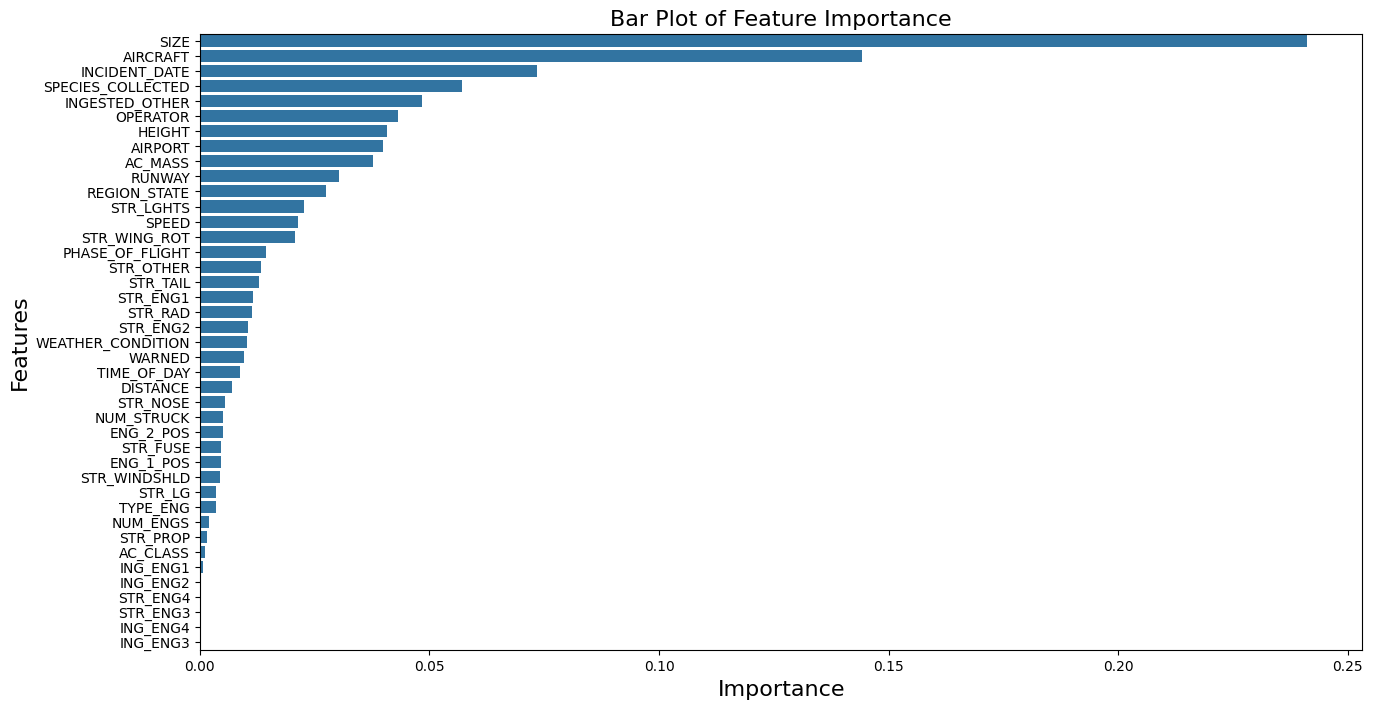

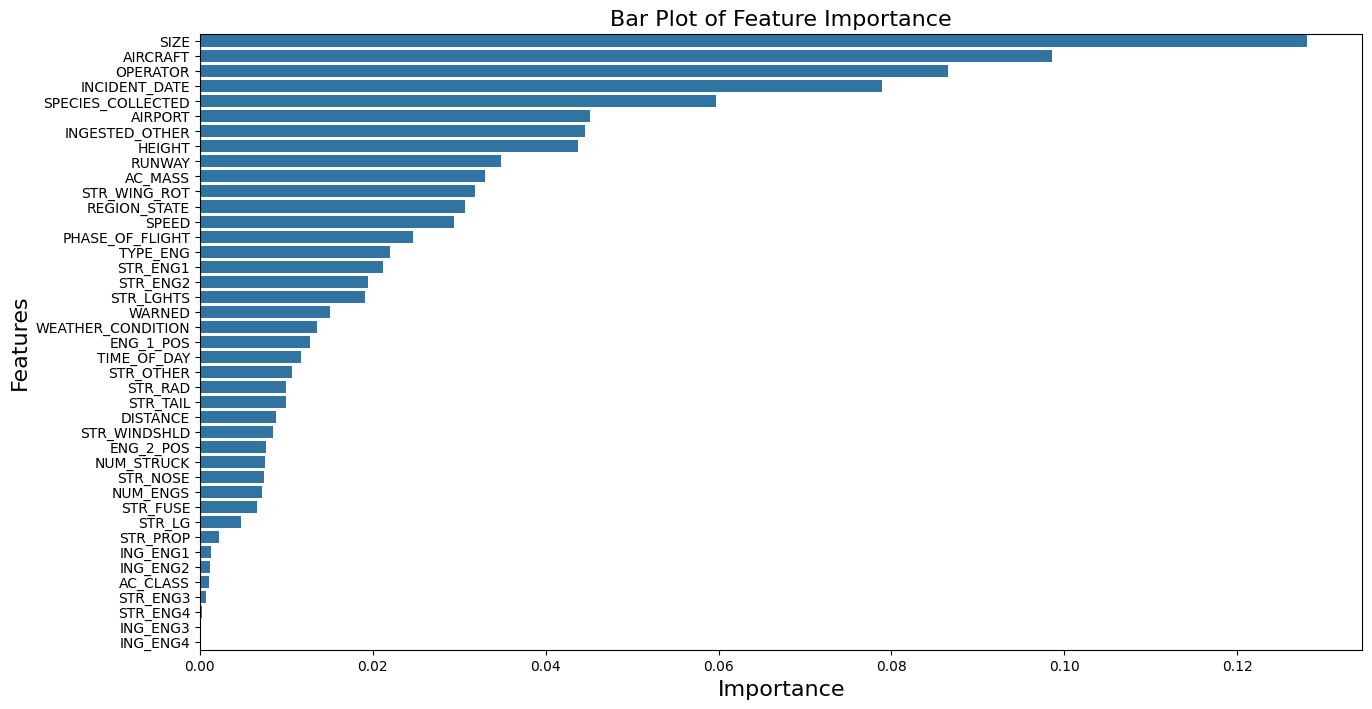

In [145]:
tuned_model('Frequency Encoding','Median-Mode imputation',df2_mm)

In [137]:
ii = IterativeImputer(estimator=DecisionTreeRegressor(),random_state=10)
df2_ii = df2.copy()
df2_ii.head()

INCIDENT_DATE  TIME_OF_DAY  AIRPORT  RUNWAY  OPERATOR  AIRCRAFT  AC_CLASS  \
0            237          NaN     3608     NaN     17603      9337  202514.0   
1            237          NaN     9620     NaN     17603      9337  202514.0   
2            305          NaN     1864     NaN     17603      8219  202514.0   
3            305          NaN     2449     NaN     17603     13993  202514.0   
4            305          NaN     3319     NaN     17603     13993  202514.0   

   AC_MASS  TYPE_ENG  NUM_ENGS  ...  STR_LG  STR_TAIL  STR_LGHTS  STR_OTHER  \
0      4.0  173315.0       2.0  ...       0         0          0          0   
1      4.0  173315.0       2.0  ...       0         0          0          0   
2      4.0  173315.0       2.0  ...       0         0          0          0   
3      4.0  173315.0       2.0  ...       0         0          0          0   
4      4.0  173315.0       2.0  ...       0         0          0          0   

   WARNED  NUM_STRUCK     SIZE  WEATHER_CONDITION  REGION_STATE  \
0  176227    255434.0  66543.0                NaN       20431.0   
1  176227    255434.0  66543.0                NaN       12420.0   
2  176227    255434.0  66543.0                NaN        2550.0   
3  176227    255434.0  66543.0                NaN        4307.0   
4  176227    255434.0  66543.0                NaN       14371.0   

   SPECIES_COLLECTED  
0            36983.0  
1            36983.0  
2            36983.0  
3            36983.0  
4            36983.0  

[5 rows x 42 columns]

In [138]:
df2_ii = ii.fit_transform(df2_ii)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [139]:
df2_ii = pd.DataFrame(df2_ii, columns = df2.columns)

In [140]:
df2_ii.isnull().sum()

INCIDENT_DATE        0
TIME_OF_DAY          0
AIRPORT              0
RUNWAY               0
OPERATOR             0
AIRCRAFT             0
AC_CLASS             0
AC_MASS              0
TYPE_ENG             0
NUM_ENGS             0
ENG_1_POS            0
ENG_2_POS            0
PHASE_OF_FLIGHT      0
HEIGHT               0
SPEED                0
DISTANCE             0
INGESTED_OTHER       0
INDICATED_DAMAGE     0
STR_RAD              0
STR_WINDSHLD         0
STR_NOSE             0
STR_ENG1             0
ING_ENG1             0
STR_ENG2             0
ING_ENG2             0
STR_ENG3             0
ING_ENG3             0
STR_ENG4             0
ING_ENG4             0
STR_PROP             0
STR_WING_ROT         0
STR_FUSE             0
STR_LG               0
STR_TAIL             0
STR_LGHTS            0
STR_OTHER            0
WARNED               0
NUM_STRUCK           0
SIZE                 0
WEATHER_CONDITION    0
REGION_STATE         0
SPECIES_COLLECTED    0
dtype: int64

DT Accuracy(Train): 1.00

DT Confusion Matrix(Train):
 [[201760     41]
 [     0  14806]]
DT Accuracy(Test): 0.92

DT Confusion Matrix(Test):
 [[64576  2691]
 [ 2840  2096]]
DT Classification Report(Train):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    201801
         1.0       1.00      1.00      1.00     14806

    accuracy                           1.00    216607
   macro avg       1.00      1.00      1.00    216607
weighted avg       1.00      1.00      1.00    216607

DT Classification Report(Test):
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     67267
         1.0       0.44      0.42      0.43      4936

    accuracy                           0.92     72203
   macro avg       0.70      0.69      0.70     72203
weighted avg       0.92      0.92      0.92     72203

Feature Importance:
DT Accuracy(Train): 1.00

DT Confusion Matrix(Train):
 [[201764     37]
 [     3  14803

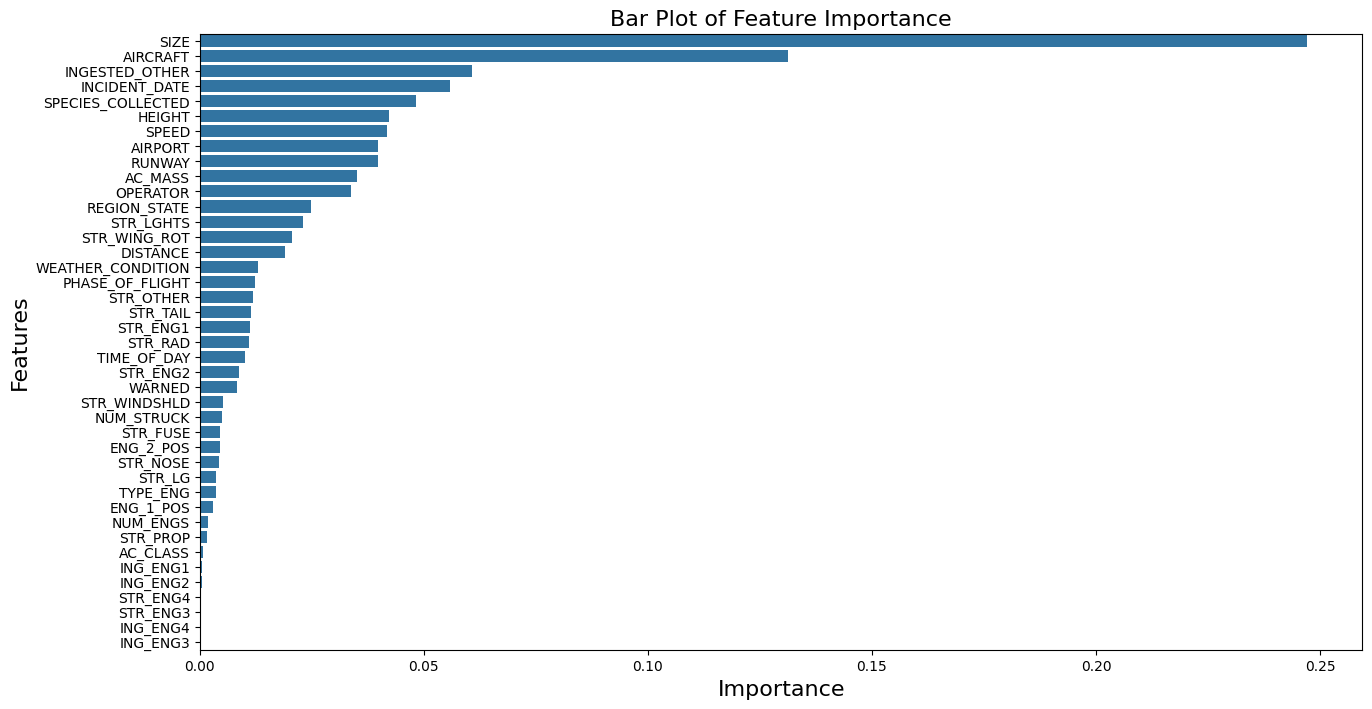

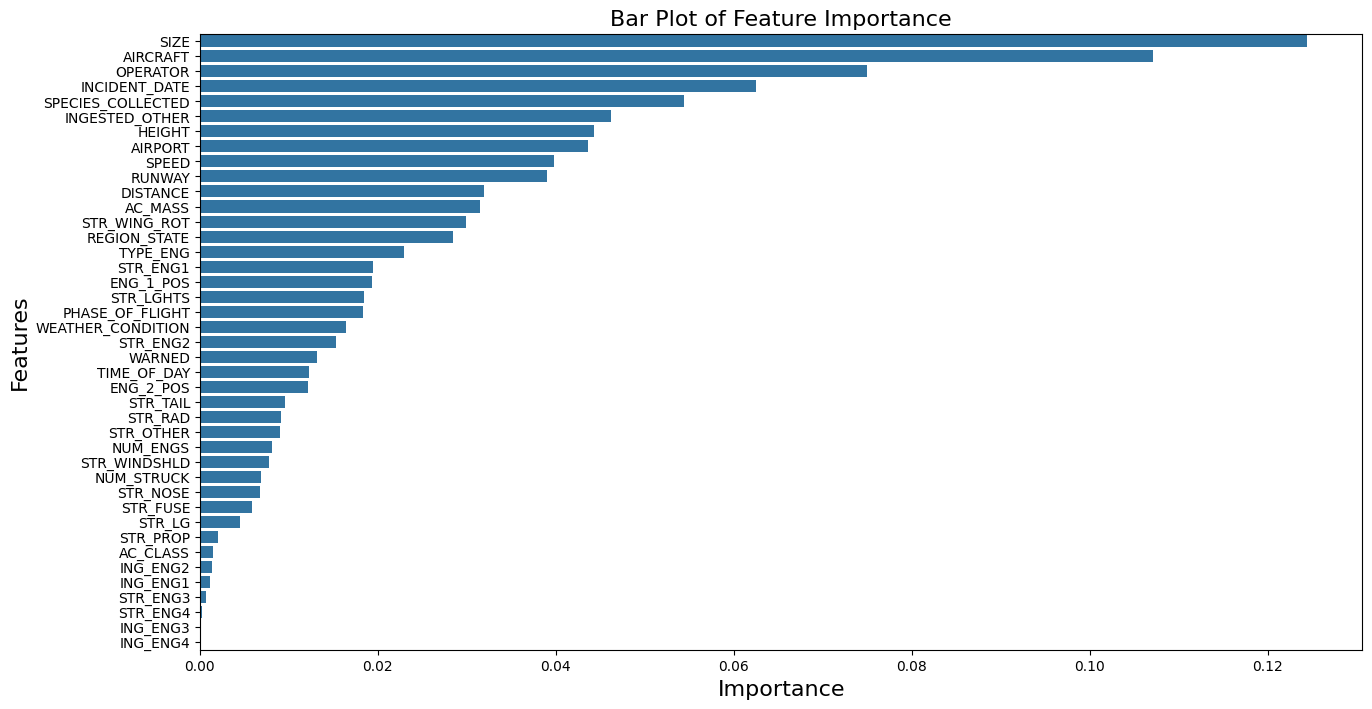

In [147]:
tuned_model('Frequency Encoding','Iterative imputation',df2_ii)